# Import packages

First thing first: import my packages. I always import pandas, numpy, and matplotlib.pyplot at the beginning of every notebook I write, because I know I will need to use them very soon.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Other packages will be added later as I go with the analysis. For example, I need tensorflow for modeling, I will import tensorflow in a separated code cell right before the step of building the model. Then I might go back and move the importing cells up here and reorganize them after I am done with everything.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from scipy import stats

# Import data

Second thing second: import my data. I usually upload the file directly if it is small enough. Otherwise, I will upload it on to a cloud drive then add a connection. This file is small, so I upload it directly, hence the one-line code for importing data. Connecting to a drive will need longer code for sure (and probably some authentication steps and troubleshooting).

In [ ]:
df = pd.read_csv('salaries.csv')

# Explore the basics

In [ ]:
df.head()

work_year experience_level employment_type             job_title  \
0       2024               MI              FT  Admin & Data Analyst   
1       2024               MI              FT  Admin & Data Analyst   
2       2022               SE              FT  Admin & Data Analyst   
3       2023               EN              FT  Admin & Data Analyst   
4       2022               SE              FT          AI Architect   

  job_title_recode  salary salary_currency  salary_in_usd employee_residence  \
0          Analyst   95000             USD          95000                 US   
1          Analyst   38000             EUR          42222                 ES   
2          Analyst   60000             USD          60000                 IN   
3          Analyst   50000             USD          50000                 DE   
4        Architect  180000             USD         180000                 HR   

   remote_ratio company_location company_size  
0             0               US            M  
1           100               ES            L  
2           100               IN            M  
3             0               DE            M  
4           100               US            M

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   job_title_recode    16534 non-null  object
 5   salary              16534 non-null  int64 
 6   salary_currency     16534 non-null  object
 7   salary_in_usd       16534 non-null  int64 
 8   employee_residence  16534 non-null  object
 9   remote_ratio        16534 non-null  int64 
 10  company_location    16534 non-null  object
 11  company_size        16534 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.5+ MB


## The target variable: Salary in USD

In [ ]:
df.salary_in_usd.describe()

count     16534.000000
mean     149686.777973
std       68505.293156
min       15000.000000
25%      101125.000000
50%      141300.000000
75%      185900.000000
max      800000.000000
Name: salary_in_usd, dtype: float64

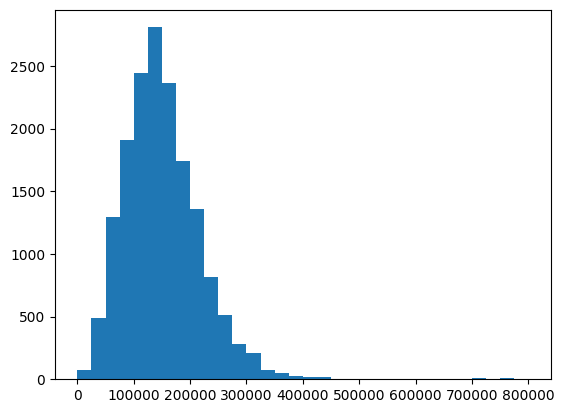

In [ ]:
bins = np.arange(0, 825000, 25000)
df.salary_in_usd.hist(bins=bins)
plt.grid(False)
plt.show()

## Work year

In [ ]:
df.work_year.unique()

array([2024, 2022, 2023, 2021, 2020])

In [ ]:
df.work_year.value_counts()

work_year
2023    8519
2024    6067
2022    1655
2021     218
2020      75
Name: count, dtype: int64

In [ ]:
df.work_year.value_counts()/16534*100

work_year
2023    51.524132
2024    36.694085
2022    10.009677
2021     1.318495
2020     0.453611
Name: count, dtype: float64

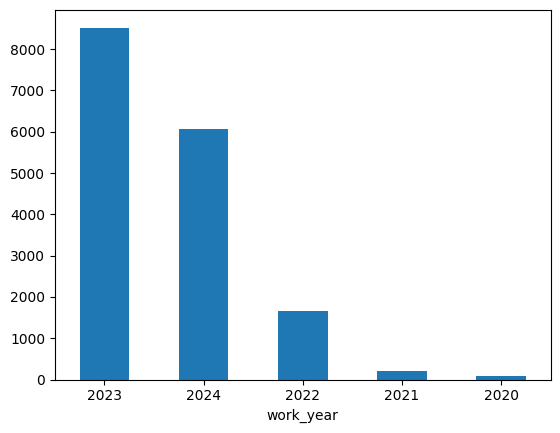

In [ ]:
df.work_year.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

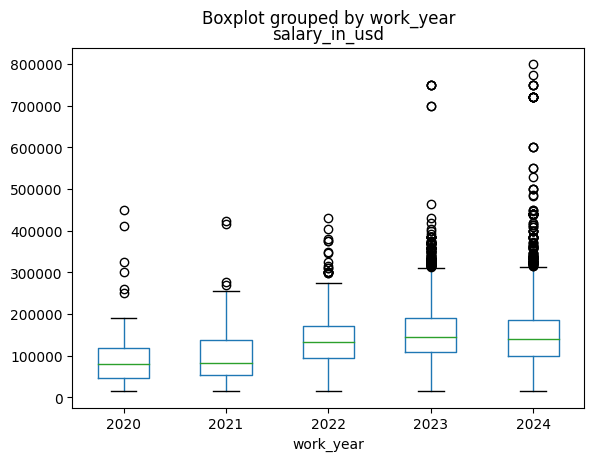

In [ ]:
df.boxplot(by='work_year', column =['salary_in_usd'], grid = False)
plt.show()

## Experience level

In [ ]:
df.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [ ]:
df.experience_level.value_counts()

experience_level
SE    10670
MI     4038
EN     1325
EX      501
Name: count, dtype: int64

In [ ]:
df.experience_level.value_counts()/16534*100

experience_level
SE    64.533688
MI    24.422402
EN     8.013790
EX     3.030120
Name: count, dtype: float64

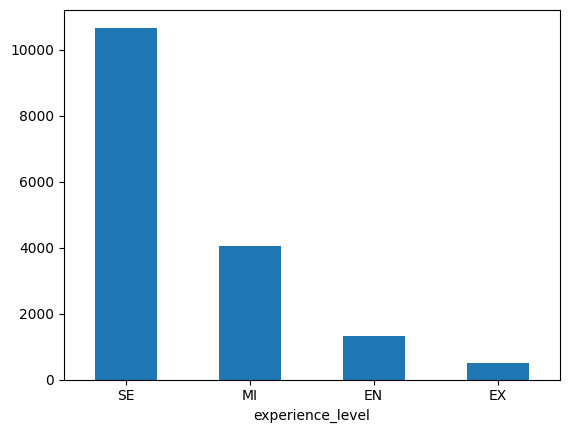

In [ ]:
df.experience_level.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

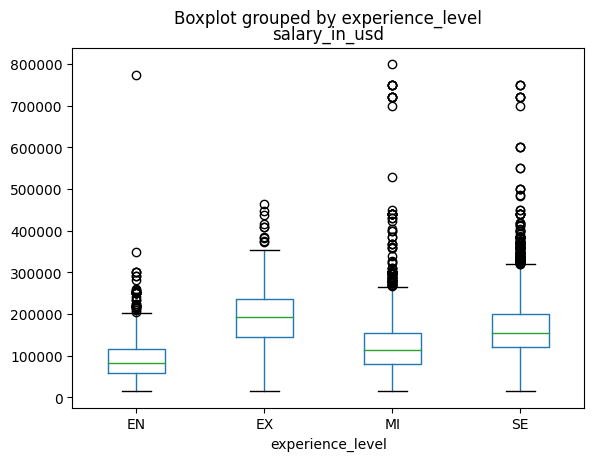

In [ ]:
df.boxplot(by='experience_level', column =['salary_in_usd'], grid = False)
plt.show()

## Employment type

In [ ]:
df.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [ ]:
df.employment_type.value_counts()

employment_type
FT    16454
PT       38
CT       28
FL       14
Name: count, dtype: int64

In [ ]:
df.employment_type.value_counts()/16534*100

employment_type
FT    99.516149
PT     0.229829
CT     0.169348
FL     0.084674
Name: count, dtype: float64

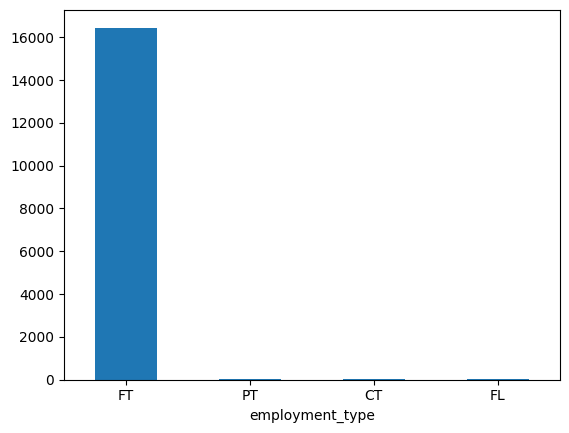

In [ ]:
df.employment_type.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

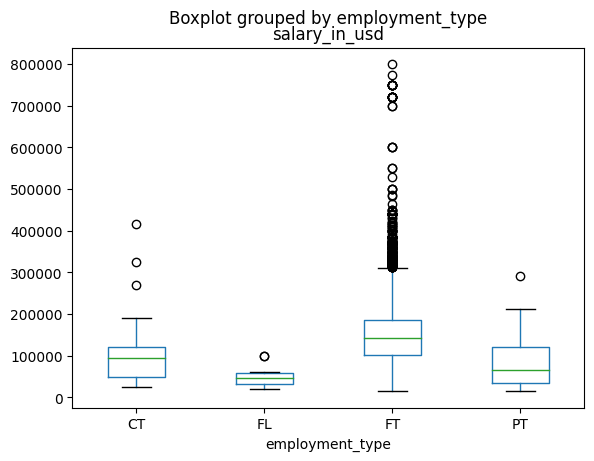

In [ ]:
df.boxplot(by='employment_type', column =['salary_in_usd'], grid = False)
plt.show()

## Job Title

In [ ]:
df.job_title.unique()

array(['Admin & Data Analyst', 'AI Architect', 'AI Developer',
       'AI Engineer', 'AI Product Manager', 'AI Programmer',
       'AI Research Engineer', 'AI Research Scientist', 'AI Scientist',
       'AI Software Engineer', 'Analytics Engineer',
       'Analytics Engineering Manager', 'Applied Data Scientist',
       'Applied Machine Learning Engineer',
       'Applied Machine Learning Scientist', 'Applied Research Scientist',
       'Applied Scientist', 'Autonomous Vehicle Technician',
       'AWS Data Architect', 'Azure Data Engineer', 'Bear Robotics',
       'BI Analyst', 'BI Data Analyst', 'BI Data Engineer',
       'BI Developer', 'Big Data Architect', 'Big Data Developer',
       'Big Data Engineer', 'Business Data Analyst',
       'Business Intelligence', 'Business Intelligence Analyst',
       'Business Intelligence Data Analyst',
       'Business Intelligence Developer',
       'Business Intelligence Engineer', 'Business Intelligence Lead',
       'Business Intelligence Man

In [ ]:
df.job_title.unique().size

155

In [ ]:
job_title = pd.DataFrame(df.job_title.value_counts().copy())

In [ ]:
top_job_title = job_title.head(20)

In [ ]:
top_job_title

count
job_title                            
Data Engineer                    3464
Data Scientist                   3314
Data Analyst                     2440
Machine Learning Engineer        1705
Research Scientist                531
Data Architect                    435
Applied Scientist                 435
Analytics Engineer                431
Research Engineer                 306
Data Science                      271
Business Intelligence Engineer    248
Data Manager                      212
ML Engineer                       200
Business Intelligence Analyst     191
Machine Learning Scientist        138
Research Analyst                  123
Data Science Manager              122
AI Engineer                       120
Business Intelligence              98
BI Developer                       90

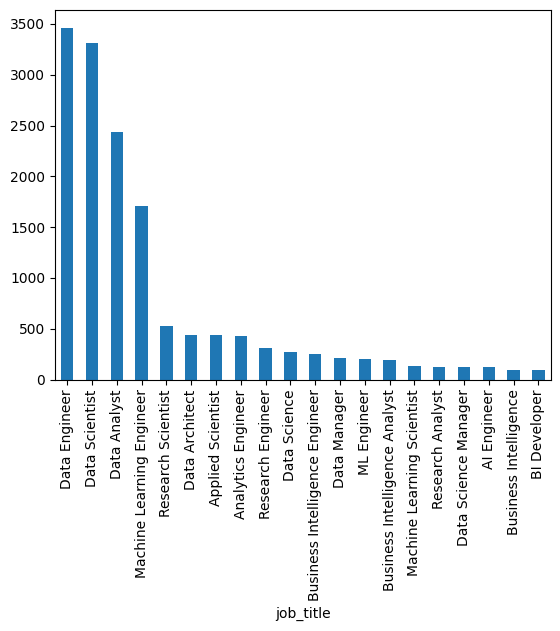

In [ ]:
top_job_title.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Recode and re-explore Job title

In [ ]:
df.job_title_recode.unique()

array(['Analyst', 'Architect', 'Developer', 'Engineer', 'Product Manager',
       'Scientist', 'Manager', 'Technician', 'Specialist', 'Biologist',
       'Associate', 'Consultant', 'Modeler', 'Practitioner', 'Researcher',
       'Professional'], dtype=object)

In [ ]:
df.job_title_recode.unique().size

16

In [ ]:
df.job_title_recode.value_counts()

job_title_recode
Engineer           6835
Scientist          4797
Analyst            3059
Manager             684
Architect           469
Developer           247
Specialist          186
Consultant           93
Modeler              58
Product Manager      47
Researcher           22
Practitioner         16
Professional          8
Associate             7
Biologist             4
Technician            2
Name: count, dtype: int64

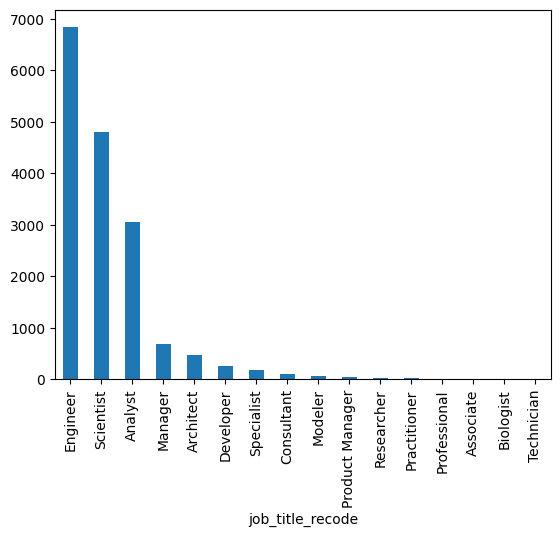

In [ ]:
df.job_title_recode.value_counts().plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

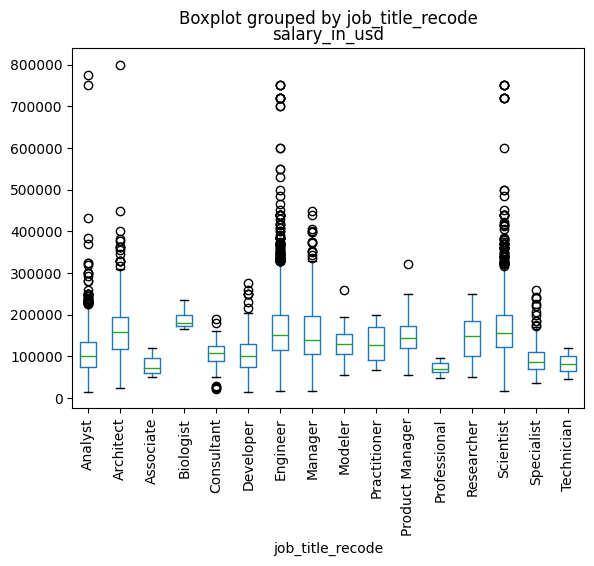

In [ ]:
df.boxplot(by='job_title_recode', column =['salary_in_usd'], grid = False)
plt.xticks(rotation=90)
plt.show()

## Salary currency

In [ ]:
df.salary_currency.unique()

array(['USD', 'EUR', 'SGD', 'ILS', 'GBP', 'INR', 'CAD', 'AUD', 'DKK',
       'BRL', 'TRY', 'HUF', 'PHP', 'PLN', 'NZD', 'CHF', 'MXN', 'JPY',
       'THB', 'NOK', 'HKD', 'CLP', 'ZAR'], dtype=object)

In [ ]:
df.salary_currency.unique().size

23

In [ ]:
df.salary_currency.value_counts()

salary_currency
USD    15294
GBP      616
EUR      449
CAD       56
INR       55
AUD       12
CHF        8
PLN        7
SGD        6
BRL        5
JPY        4
DKK        4
HUF        3
TRY        3
ILS        2
THB        2
NOK        2
PHP        1
NZD        1
MXN        1
HKD        1
CLP        1
ZAR        1
Name: count, dtype: int64

In [ ]:
df.salary_currency.value_counts()/16534*100

salary_currency
USD    92.500302
GBP     3.725656
EUR     2.715616
CAD     0.338696
INR     0.332648
AUD     0.072578
CHF     0.048385
PLN     0.042337
SGD     0.036289
BRL     0.030241
JPY     0.024193
DKK     0.024193
HUF     0.018144
TRY     0.018144
ILS     0.012096
THB     0.012096
NOK     0.012096
PHP     0.006048
NZD     0.006048
MXN     0.006048
HKD     0.006048
CLP     0.006048
ZAR     0.006048
Name: count, dtype: float64

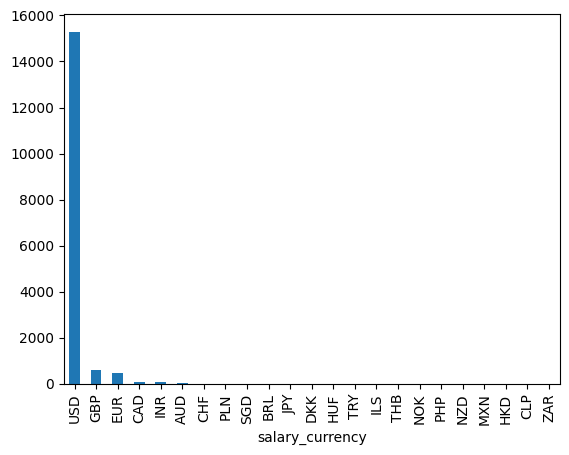

In [ ]:
df.salary_currency.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Employee residence

In [ ]:
df.employee_residence.unique()

array(['US', 'ES', 'IN', 'DE', 'HR', 'CA', 'BE', 'FR', 'UA', 'IT', 'FI',
       'SE', 'BA', 'IL', 'GB', 'AE', 'OM', 'CZ', 'PT', 'RO', 'QA', 'KR',
       'PK', 'TN', 'SA', 'TR', 'AU', 'GH', 'CO', 'DK', 'EG', 'LT', 'HU',
       'NL', 'NG', 'BR', 'AR', 'KE', 'AT', 'BO', 'VN', 'PL', 'AS', 'MU',
       'PH', 'MX', 'MD', 'AM', 'LU', 'ZA', 'LV', 'SG', 'RU', 'GE', 'GR',
       'IE', 'SI', 'EE', 'CF', 'UZ', 'KW', 'CN', 'CR', 'ID', 'BG', 'NZ',
       'MT', 'CH', 'PE', 'PR', 'JP', 'HK', 'LB', 'TH', 'AD', 'EC', 'NO',
       'CY', 'DO', 'DZ', 'RS', 'CL', 'MY', 'IQ', 'UG', 'IR', 'HN', 'JE'],
      dtype=object)

In [ ]:
df.employee_residence.unique().size

88

In [ ]:
employee_residence = pd.DataFrame(df.employee_residence.value_counts().copy())

In [ ]:
top_employee_residence = employee_residence.head(20)

In [ ]:
top_employee_residence

count
employee_residence       
US                  14467
GB                    686
CA                    453
ES                    137
DE                     98
IN                     78
FR                     69
AU                     54
NL                     32
PT                     30
BR                     24
IT                     21
LT                     20
ZA                     19
GR                     17
CO                     16
LV                     16
PL                     15
EG                     14
MX                     14

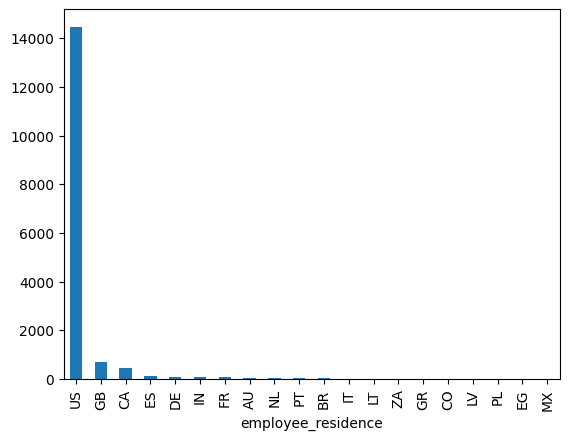

In [ ]:
top_employee_residence.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Remote ratio

In [ ]:
df.remote_ratio.unique()

array([  0, 100,  50])

In [ ]:
df.remote_ratio.value_counts()

remote_ratio
0      11118
100     5167
50       249
Name: count, dtype: int64

In [ ]:
df.remote_ratio.value_counts()/16534*100

remote_ratio
0      67.243256
100    31.250756
50      1.505988
Name: count, dtype: float64

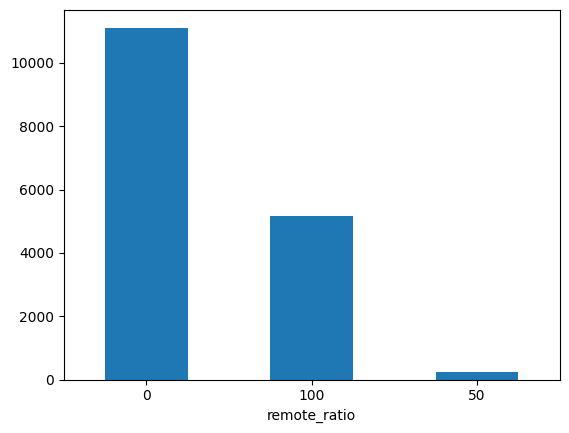

In [ ]:
df.remote_ratio.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

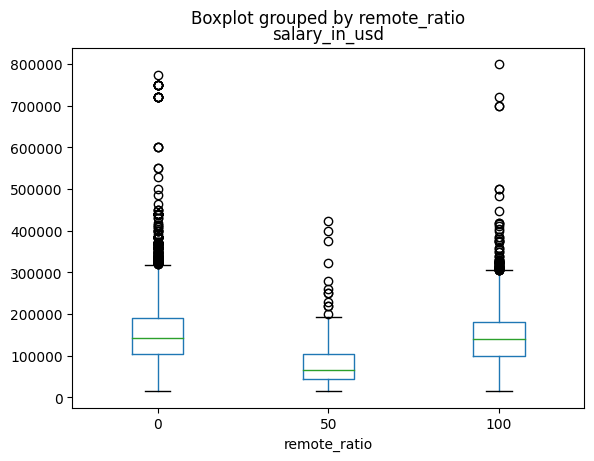

In [ ]:
df.boxplot(by='remote_ratio', column =['salary_in_usd'], grid = False)
plt.show()

## Company location

In [ ]:
df.company_location.unique()

array(['US', 'ES', 'IN', 'DE', 'CA', 'FR', 'UA', 'IT', 'FI', 'SE', 'BA',
       'IL', 'GB', 'AE', 'OM', 'PT', 'RO', 'QA', 'KR', 'AU', 'HU', 'CH',
       'SA', 'TR', 'GH', 'CO', 'DK', 'AS', 'EG', 'LT', 'NL', 'NG', 'BR',
       'KE', 'PK', 'AT', 'CZ', 'PL', 'BS', 'MU', 'PH', 'JP', 'MX', 'MD',
       'GI', 'RU', 'LU', 'ZA', 'LV', 'SG', 'IE', 'SI', 'EE', 'CF', 'HR',
       'AR', 'ID', 'GR', 'NZ', 'MT', 'PR', 'LB', 'TH', 'AD', 'EC', 'NO',
       'HK', 'BE', 'MY', 'DZ', 'CL', 'IQ', 'VN', 'AM', 'IR', 'HN', 'CN'],
      dtype=object)

In [ ]:
df.company_location.unique().size

77

In [ ]:
company_location = pd.DataFrame(df.company_location.value_counts().copy())

In [ ]:
top_company_location = company_location.head(20)

In [ ]:
top_company_location

count
company_location       
US                14518
GB                  694
CA                  455
ES                  133
DE                  105
FR                   65
IN                   63
AU                   57
NL                   32
PT                   28
BR                   22
LT                   20
ZA                   19
LV                   16
CO                   16
MX                   15
PL                   14
IT                   14
GR                   14
EG                   13

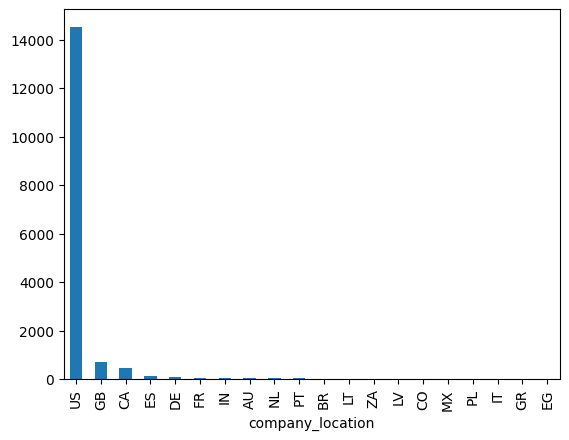

In [ ]:
top_company_location.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Company size

In [ ]:
df.company_size.unique()

array(['M', 'L', 'S'], dtype=object)

In [ ]:
df.company_size.value_counts()

company_size
M    15306
L     1040
S      188
Name: count, dtype: int64

In [ ]:
df.company_size.value_counts()/16534*100

company_size
M    92.572880
L     6.290069
S     1.137051
Name: count, dtype: float64

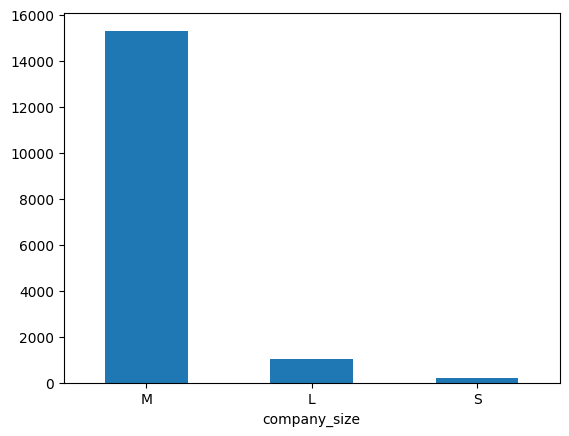

In [ ]:
df.company_size.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

# Explore the Outliers

In [ ]:
median = df.salary_in_usd.median()

In [ ]:
median

141300.0

In [ ]:
mad = stats.median_abs_deviation(df.salary_in_usd)

In [ ]:
mad

41300.0

In [ ]:
z_alpha = 3

##High outliers

In [ ]:
higher = median + z_alpha*mad

In [ ]:
higher

265200.0

In [ ]:
high_outlier = df[df.salary_in_usd > higher].copy()

In [ ]:
high_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 818 entries, 5 to 16520
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           818 non-null    int64 
 1   experience_level    818 non-null    object
 2   employment_type     818 non-null    object
 3   job_title           818 non-null    object
 4   job_title_recode    818 non-null    object
 5   salary              818 non-null    int64 
 6   salary_currency     818 non-null    object
 7   salary_in_usd       818 non-null    int64 
 8   employee_residence  818 non-null    object
 9   remote_ratio        818 non-null    int64 
 10  company_location    818 non-null    object
 11  company_size        818 non-null    object
dtypes: int64(4), object(8)
memory usage: 83.1+ KB


### Salary in USD

In [ ]:
high_outlier.salary_in_usd.describe()

count       818.000000
mean     323492.580685
std       82104.646650
min      265400.000000
25%      280025.000000
50%      300000.000000
75%      330000.000000
max      800000.000000
Name: salary_in_usd, dtype: float64

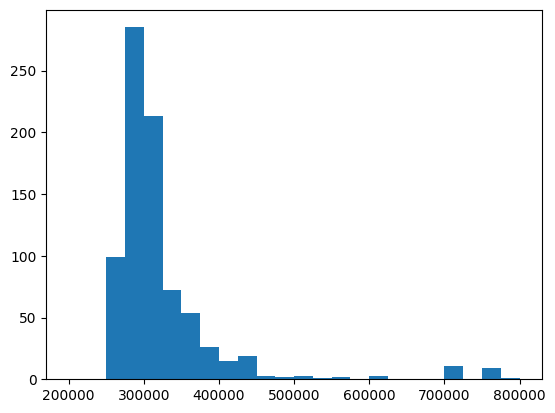

In [ ]:
bins = np.arange(200000, 825000, 25000)
high_outlier.salary_in_usd.hist(bins=bins)
plt.grid(False)
plt.show()

In [ ]:
df[df.salary_in_usd > 450000].copy()

work_year experience_level employment_type                   job_title  \
9           2024               MI              FT                AI Architect   
225         2024               SE              FT          Analytics Engineer   
229         2024               SE              FT          Analytics Engineer   
309         2024               MI              FT          Analytics Engineer   
323         2024               SE              FT          Analytics Engineer   
339         2024               SE              FT          Analytics Engineer   
387         2023               SE              FT          Analytics Engineer   
403         2023               MI              FT          Analytics Engineer   
2555        2024               EN              FT                Data Analyst   
2755        2024               SE              FT                Data Analyst   
6283        2023               EX              FT               Data Engineer   
6365        2023               MI              FT               Data Engineer   
9996        2024               SE              FT              Data Scientist   
10387       2024               SE              FT              Data Scientist   
10995       2023               SE              FT              Data Scientist   
13491       2024               SE              FT   Machine Learning Engineer   
13493       2024               SE              FT   Machine Learning Engineer   
13957       2023               MI              FT   Machine Learning Engineer   
15117       2024               MI              FT  Machine Learning Scientist   
15139       2024               MI              FT  Machine Learning Scientist   
15149       2024               MI              FT  Machine Learning Scientist   
15153       2023               MI              FT  Machine Learning Scientist   
15306       2024               MI              FT                 ML Engineer   
15530       2024               SE              FT             Prompt Engineer   
15681       2024               SE              FT           Research Engineer   
15733       2024               SE              FT           Research Engineer   
15794       2024               MI              FT           Research Engineer   
15796       2024               MI              FT           Research Engineer   
16065       2024               SE              FT          Research Scientist   
16067       2024               SE              FT          Research Scientist   
16113       2024               SE              FT          Research Scientist   
16117       2024               SE              FT          Research Scientist   
16183       2024               MI              FT          Research Scientist   

      job_title_recode  salary salary_currency  salary_in_usd  \
9            Architect  800000             USD         800000   
225           Engineer  720000             USD         720000   
229           Engineer  500000             USD         500000   
309           Engineer  720000             USD         720000   
323           Engineer  720000             USD         720000   
339           Engineer  750000             USD         750000   
387           Engineer  700000             USD         700000   
403           Engineer  700000             USD         700000   
2555           Analyst  774000             USD         774000   
2755           Analyst  750000             USD         750000   
6283          Engineer  465000             USD         465000   
6365          Engineer  750000             USD         750000   
9996         Scientist  720000             USD         720000   
10387        Scientist  720000             USD         720000   
10995        Scientist  750000             USD         750000   
13491         Engineer  550000             USD         550000   
13493         Engineer  550000             USD         550000   
13957         Engineer  750000             USD         750000   
15117        Scie

In [ ]:
count = 2057

### Work year

In [ ]:
high_outlier.work_year.unique()

array([2024, 2023, 2022, 2021, 2020])

In [ ]:
high_outlier.work_year.value_counts()

work_year
2023    458
2024    329
2022     23
2021      4
2020      4
Name: count, dtype: int64

In [ ]:
high_outlier.work_year.value_counts()/count*100

work_year
2023    22.265435
2024    15.994166
2022     1.118133
2021     0.194458
2020     0.194458
Name: count, dtype: float64

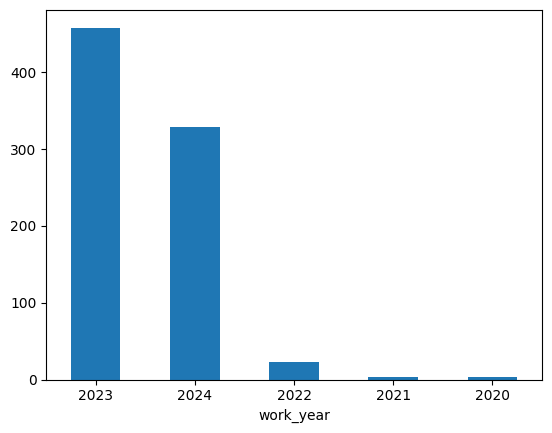

In [ ]:
high_outlier.work_year.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

### Experience level

In [ ]:
high_outlier.experience_level.unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [ ]:
high_outlier.experience_level.value_counts()

experience_level
SE    653
MI     88
EX     69
EN      8
Name: count, dtype: int64

In [ ]:
high_outlier.experience_level.value_counts()/count*100

experience_level
SE    31.745260
MI     4.278075
EX     3.354400
EN     0.388916
Name: count, dtype: float64

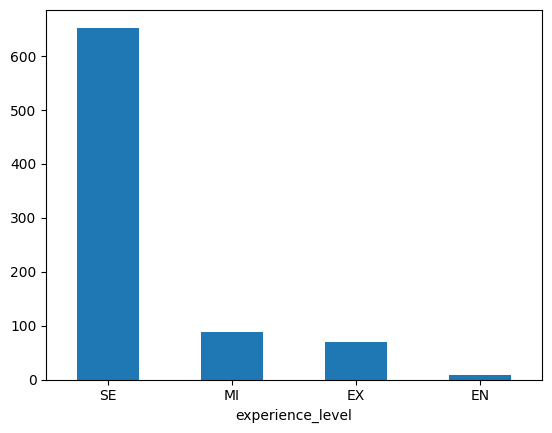

In [ ]:
high_outlier.experience_level.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

### Employment type

In [ ]:
high_outlier.employment_type.unique()

array(['FT', 'PT', 'CT'], dtype=object)

In [ ]:
high_outlier.employment_type.value_counts()

employment_type
FT    814
CT      3
PT      1
Name: count, dtype: int64

In [ ]:
high_outlier.employment_type.value_counts()/count*100

employment_type
FT    39.572193
CT     0.145843
PT     0.048614
Name: count, dtype: float64

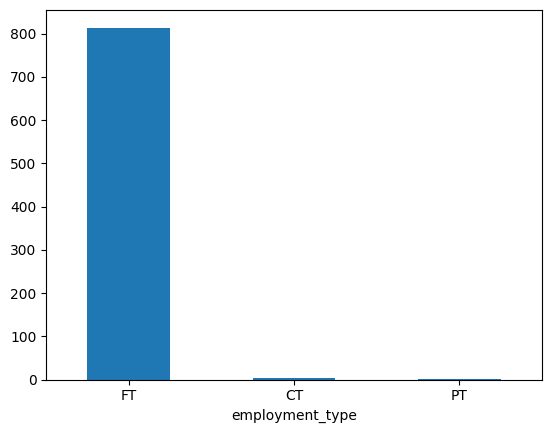

In [ ]:
high_outlier.employment_type.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

### Job Title

In [ ]:
high_outlier.job_title.unique()

array(['AI Architect', 'AI Developer', 'AI Engineer', 'AI Scientist',
       'Analytics Engineer', 'Analytics Engineering Manager',
       'Applied Data Scientist', 'Applied Machine Learning Scientist',
       'Applied Scientist', 'Business Intelligence',
       'Computer Vision Engineer', 'Data Analyst', 'Data Analytics Lead',
       'Data Architect', 'Data Engineer', 'Data Infrastructure Engineer',
       'Data Lead', 'Data Operations Engineer', 'Data Product Owner',
       'Data Science', 'Data Science Engineer', 'Data Science Lead',
       'Data Science Manager', 'Data Science Tech Lead', 'Data Scientist',
       'Deep Learning Engineer', 'Director of Data Science',
       'Finance Data Analyst', 'Head of Data', 'Head of Data Science',
       'Head of Machine Learning', 'Lead Data Engineer',
       'Machine Learning Engineer',
       'Machine Learning Infrastructure Engineer',
       'Machine Learning Scientist', 'Machine Learning Software Engineer',
       'Managing Director Data 

In [ ]:
high_outlier.job_title.unique().size

46

In [ ]:
job_title = pd.DataFrame(high_outlier.job_title.value_counts().copy())

In [ ]:
top_job_title = job_title.head(20)

In [ ]:
top_job_title

count
job_title                        
Machine Learning Engineer     197
Data Scientist                138
Data Engineer                 101
Research Scientist             75
Research Engineer              53
ML Engineer                    33
Data Science                   30
Data Architect                 24
Data Science Manager           20
Analytics Engineer             20
Applied Scientist              16
Head of Data                   14
Machine Learning Scientist     12
AI Architect                   11
AI Engineer                    10
Data Analyst                    9
Director of Data Science        5
Deep Learning Engineer          5
Head of Machine Learning        4
Data Analytics Lead             4

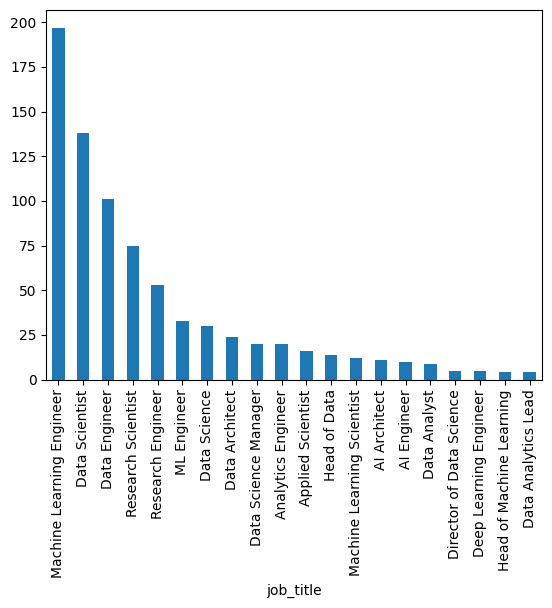

In [ ]:
top_job_title.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Recoded Job title

In [ ]:
high_outlier.job_title_recode.unique()

array(['Architect', 'Developer', 'Engineer', 'Scientist', 'Manager',
       'Analyst', 'Product Manager'], dtype=object)

In [ ]:
high_outlier.job_title_recode.value_counts()

job_title_recode
Engineer           437
Scientist          275
Manager             55
Architect           35
Analyst             14
Developer            1
Product Manager      1
Name: count, dtype: int64

In [ ]:
high_outlier.job_title_recode.value_counts()/count*100

job_title_recode
Engineer           21.244531
Scientist          13.368984
Manager             2.673797
Architect           1.701507
Analyst             0.680603
Developer           0.048614
Product Manager     0.048614
Name: count, dtype: float64

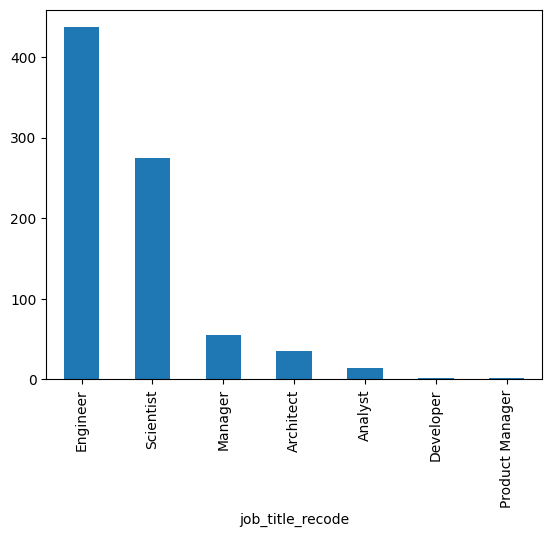

In [ ]:
high_outlier.job_title_recode.value_counts().plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Salary currency

In [ ]:
high_outlier.salary_currency.unique()

array(['USD', 'GBP', 'ILS', 'CHF', 'CAD', 'EUR'], dtype=object)

In [ ]:
high_outlier.salary_currency.value_counts()

salary_currency
USD    808
GBP      6
ILS      1
CHF      1
CAD      1
EUR      1
Name: count, dtype: int64

In [ ]:
high_outlier.salary_currency.value_counts()/count*100

salary_currency
USD    39.280506
GBP     0.291687
ILS     0.048614
CHF     0.048614
CAD     0.048614
EUR     0.048614
Name: count, dtype: float64

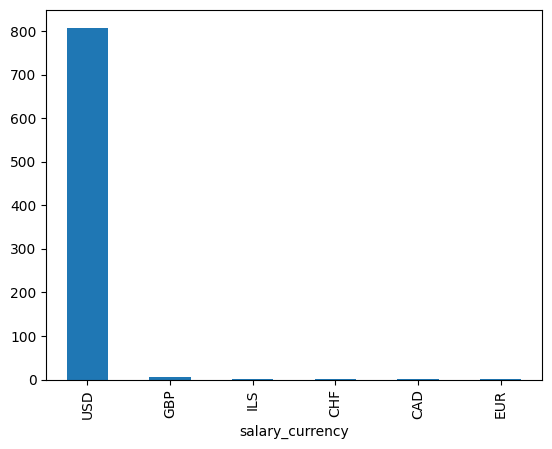

In [ ]:
high_outlier.salary_currency.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Employee residence

In [ ]:
high_outlier.employee_residence.unique()

array(['US', 'CA', 'GB', 'QA', 'IL', 'MX', 'AU', 'CH', 'FR', 'DE'],
      dtype=object)

In [ ]:
high_outlier.employee_residence.value_counts()

employee_residence
US    773
CA     22
GB     11
AU      4
DE      3
QA      1
IL      1
MX      1
CH      1
FR      1
Name: count, dtype: int64

In [ ]:
high_outlier.employee_residence.value_counts()/count*100

employee_residence
US    37.578999
CA     1.069519
GB     0.534759
AU     0.194458
DE     0.145843
QA     0.048614
IL     0.048614
MX     0.048614
CH     0.048614
FR     0.048614
Name: count, dtype: float64

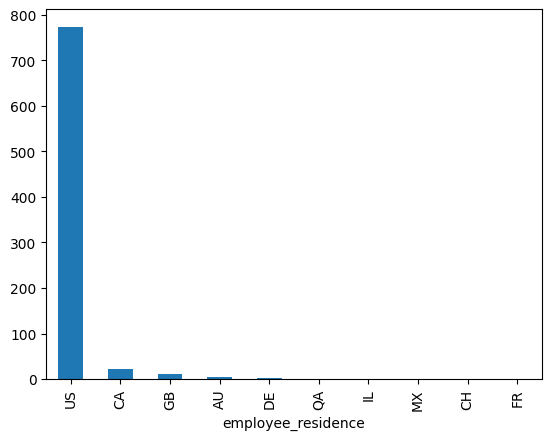

In [ ]:
high_outlier.employee_residence.value_counts().plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Remote ratio

In [ ]:
high_outlier.remote_ratio.unique()

array([  0, 100,  50])

In [ ]:
high_outlier.remote_ratio.value_counts()

remote_ratio
0      631
100    182
50       5
Name: count, dtype: int64

In [ ]:
high_outlier.remote_ratio.value_counts()/count*100

remote_ratio
0      30.675741
100     8.847837
50      0.243072
Name: count, dtype: float64

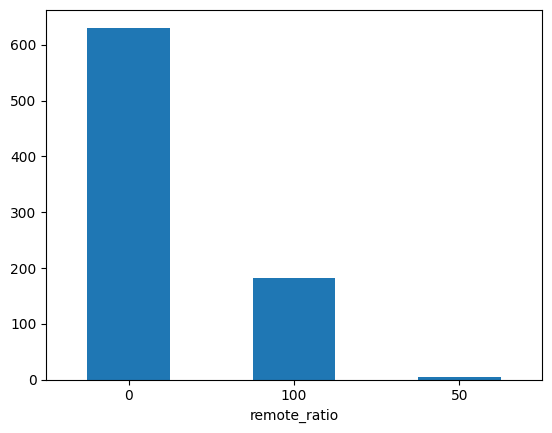

In [ ]:
high_outlier.remote_ratio.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

### Company location

In [ ]:
high_outlier.company_location.unique()

array(['US', 'CA', 'GB', 'QA', 'IL', 'MX', 'AU', 'CH', 'DE'], dtype=object)

In [ ]:
high_outlier.company_location.value_counts()

company_location
US    774
CA     22
GB     11
AU      4
DE      3
QA      1
IL      1
MX      1
CH      1
Name: count, dtype: int64

In [ ]:
high_outlier.company_location.value_counts()/count*100

company_location
US    37.627613
CA     1.069519
GB     0.534759
AU     0.194458
DE     0.145843
QA     0.048614
IL     0.048614
MX     0.048614
CH     0.048614
Name: count, dtype: float64

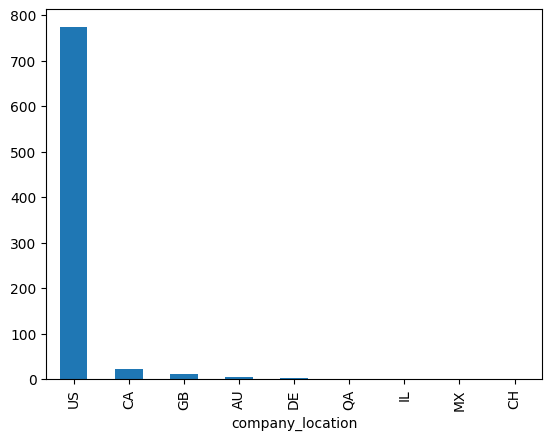

In [ ]:
high_outlier.company_location.value_counts().plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Company size

In [ ]:
high_outlier.company_size.unique()

array(['M', 'L', 'S'], dtype=object)

In [ ]:
high_outlier.company_size.value_counts()

company_size
M    784
L     32
S      2
Name: count, dtype: int64

In [ ]:
high_outlier.company_size.value_counts()/count*100

company_size
M    38.113758
L     1.555664
S     0.097229
Name: count, dtype: float64

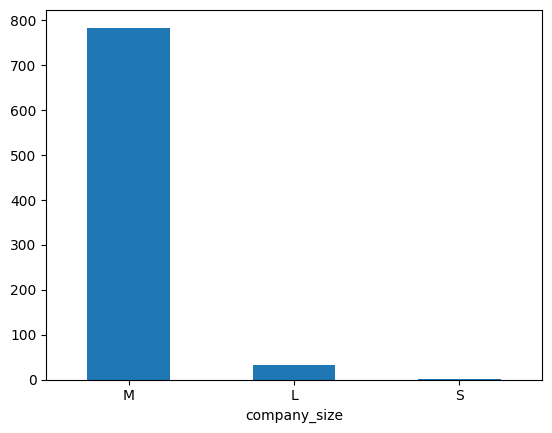

In [ ]:
high_outlier.company_size.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

##Low outliers

In [ ]:
lower = median - z_alpha*mad

In [ ]:
lower

17400.0

In [ ]:
low_outlier = df[df.salary_in_usd < lower].copy()

In [ ]:
low_outlier.head()

work_year experience_level employment_type  \
1293       2021               EN              FT   
1299       2023               MI              FT   
1655       2022               MI              FT   
1997       2022               MI              FT   
3612       2023               MI              FT   

                            job_title job_title_recode   salary  \
1293                Big Data Engineer         Engineer  1200000   
1299            Business Data Analyst          Analyst    17000   
1655  Business Intelligence Developer        Developer    15000   
1997         Computer Vision Engineer         Engineer  1250000   
3612                     Data Analyst          Analyst   866000   

     salary_currency  salary_in_usd employee_residence  remote_ratio  \
1293             INR          16228                 IN           100   
1299             USD          17000                 AM           100   
1655             USD          15000                 GH           100   
1997             INR          15897                 IN           100   
3612             PHP          15680                 PH            50   

     company_location company_size  
1293               IN            L  
1299               RU            L  
1655               GH            M  
1997               IN            M  
3612               PH            L

In [ ]:
low_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 1293 to 16530
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           18 non-null     int64 
 1   experience_level    18 non-null     object
 2   employment_type     18 non-null     object
 3   job_title           18 non-null     object
 4   job_title_recode    18 non-null     object
 5   salary              18 non-null     int64 
 6   salary_currency     18 non-null     object
 7   salary_in_usd       18 non-null     int64 
 8   employee_residence  18 non-null     object
 9   remote_ratio        18 non-null     int64 
 10  company_location    18 non-null     object
 11  company_size        18 non-null     object
dtypes: int64(4), object(8)
memory usage: 1.8+ KB


### Salary in USD

In [ ]:
low_outlier.salary_in_usd.describe()

count       18.000000
mean     16109.777778
std        749.347210
min      15000.000000
25%      15712.250000
50%      16114.000000
75%      16844.500000
max      17025.000000
Name: salary_in_usd, dtype: float64

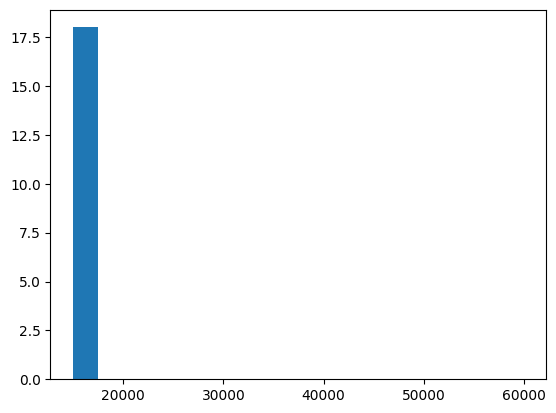

In [ ]:
bins = np.arange(15000, 62500, 2500)
low_outlier.salary_in_usd.hist(bins=bins)
plt.grid(False)
plt.show()

In [ ]:
count = 935

### Work year

In [ ]:
low_outlier.work_year.unique()

array([2021, 2023, 2022, 2024, 2020])

In [ ]:
low_outlier.work_year.value_counts()

work_year
2023    7
2021    4
2022    4
2020    2
2024    1
Name: count, dtype: int64

In [ ]:
low_outlier.work_year.value_counts()/count*100

work_year
2023    0.748663
2021    0.427807
2022    0.427807
2020    0.213904
2024    0.106952
Name: count, dtype: float64

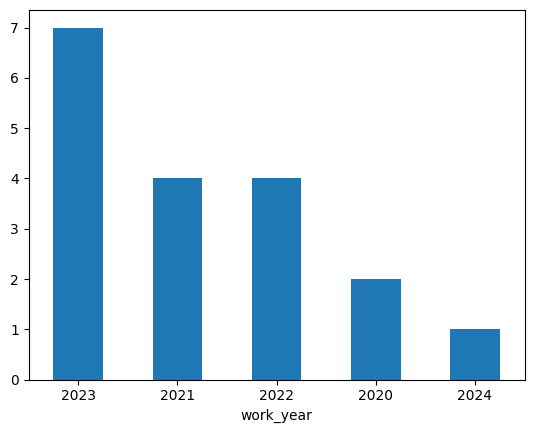

In [ ]:
low_outlier.work_year.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

### Experience level

In [ ]:
low_outlier.experience_level.unique()

array(['EN', 'MI', 'SE', 'EX'], dtype=object)

In [ ]:
low_outlier.experience_level.value_counts()

experience_level
EN    8
MI    8
SE    1
EX    1
Name: count, dtype: int64

In [ ]:
low_outlier.experience_level.value_counts()/count*100

experience_level
EN    0.855615
MI    0.855615
SE    0.106952
EX    0.106952
Name: count, dtype: float64

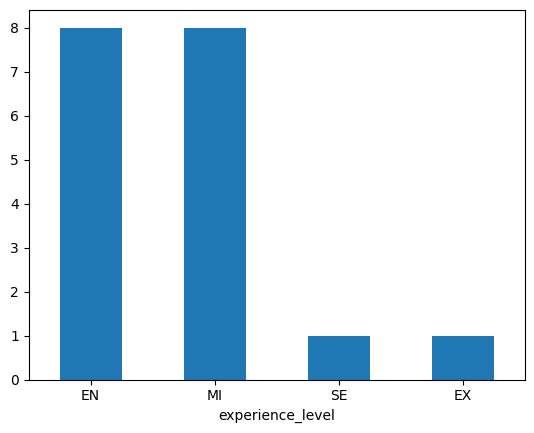

In [ ]:
low_outlier.experience_level.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

### Employment type

In [ ]:
low_outlier.employment_type.unique()

array(['FT', 'PT'], dtype=object)

In [ ]:
low_outlier.employment_type.value_counts()

employment_type
FT    16
PT     2
Name: count, dtype: int64

In [ ]:
low_outlier.employment_type.value_counts()/count*100

employment_type
FT    1.711230
PT    0.213904
Name: count, dtype: float64

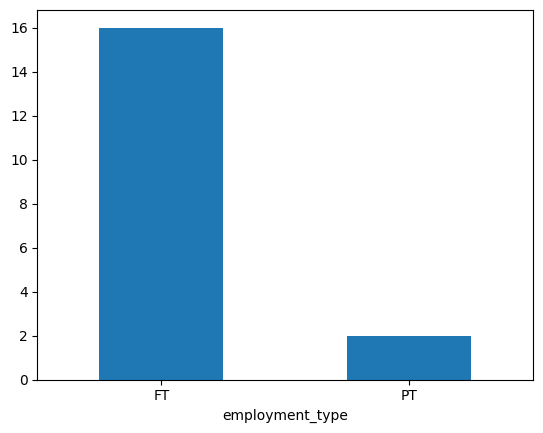

In [ ]:
low_outlier.employment_type.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

### Job Title

In [ ]:
low_outlier.job_title.unique()

array(['Big Data Engineer', 'Business Data Analyst',
       'Business Intelligence Developer', 'Computer Vision Engineer',
       'Data Analyst', 'Data Engineer', 'Data Science', 'Data Scientist',
       'Machine Learning Developer', 'ML Engineer',
       'Product Data Analyst', 'Research Engineer', 'Staff Data Analyst'],
      dtype=object)

In [ ]:
low_outlier.job_title.unique().size

13

In [ ]:
job_title = pd.DataFrame(low_outlier.job_title.value_counts().copy())

In [ ]:
top_job_title = job_title.head(20)

In [ ]:
top_job_title

count
job_title                             
Data Analyst                         4
Data Scientist                       3
Big Data Engineer                    1
Business Data Analyst                1
Business Intelligence Developer      1
Computer Vision Engineer             1
Data Engineer                        1
Data Science                         1
Machine Learning Developer           1
ML Engineer                          1
Product Data Analyst                 1
Research Engineer                    1
Staff Data Analyst                   1

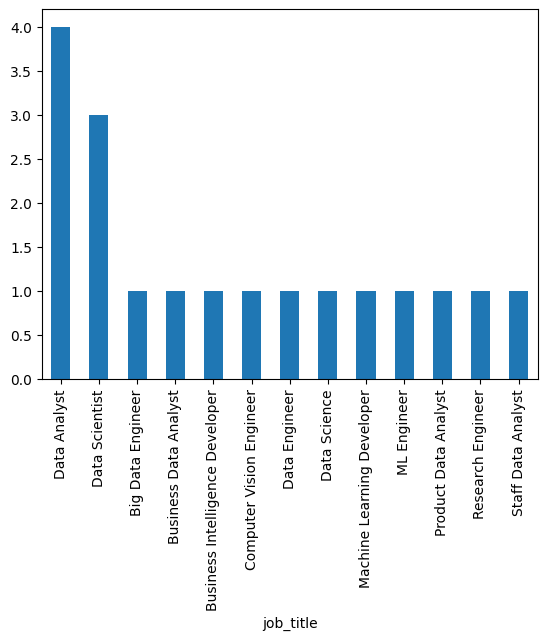

In [ ]:
top_job_title.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Recoded Job title

In [ ]:
low_outlier.job_title_recode.unique()

array(['Engineer', 'Analyst', 'Developer', 'Scientist'], dtype=object)

In [ ]:
low_outlier.job_title_recode.value_counts()

job_title_recode
Analyst      7
Engineer     5
Scientist    4
Developer    2
Name: count, dtype: int64

In [ ]:
low_outlier.job_title_recode.value_counts()/count*100

job_title_recode
Analyst      0.748663
Engineer     0.534759
Scientist    0.427807
Developer    0.213904
Name: count, dtype: float64

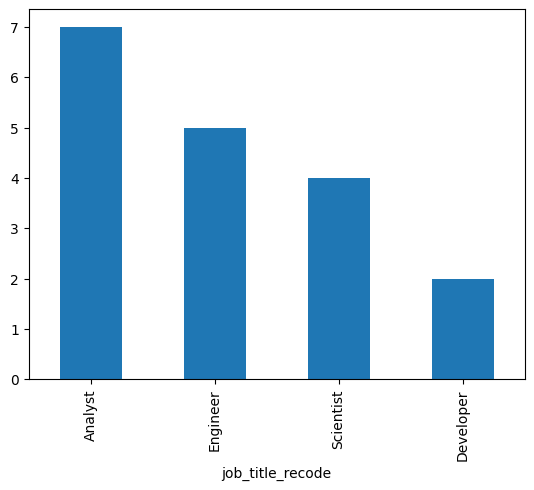

In [ ]:
low_outlier.job_title_recode.value_counts().plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Salary currency

In [ ]:
low_outlier.salary_currency.unique()

array(['INR', 'USD', 'PHP', 'EUR'], dtype=object)

In [ ]:
low_outlier.salary_currency.value_counts()

salary_currency
INR    8
USD    6
EUR    3
PHP    1
Name: count, dtype: int64

In [ ]:
low_outlier.salary_currency.value_counts()/count*100

salary_currency
INR    0.855615
USD    0.641711
EUR    0.320856
PHP    0.106952
Name: count, dtype: float64

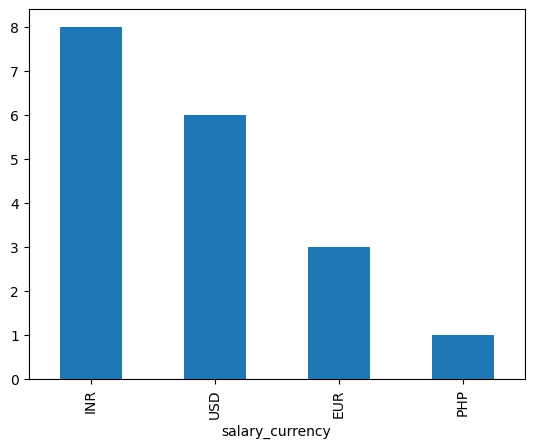

In [ ]:
low_outlier.salary_currency.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Employee residence

In [ ]:
low_outlier.employee_residence.unique()

array(['IN', 'AM', 'GH', 'PH', 'ID', 'DE', 'EC', 'TH', 'RU', 'NG'],
      dtype=object)

In [ ]:
low_outlier.employee_residence.unique().size

10

In [ ]:
employee_residence = pd.DataFrame(low_outlier.employee_residence.value_counts().copy())

In [ ]:
top_employee_residence = employee_residence.head(20)

In [ ]:
top_employee_residence

count
employee_residence       
IN                      8
DE                      2
AM                      1
GH                      1
PH                      1
ID                      1
EC                      1
TH                      1
RU                      1
NG                      1

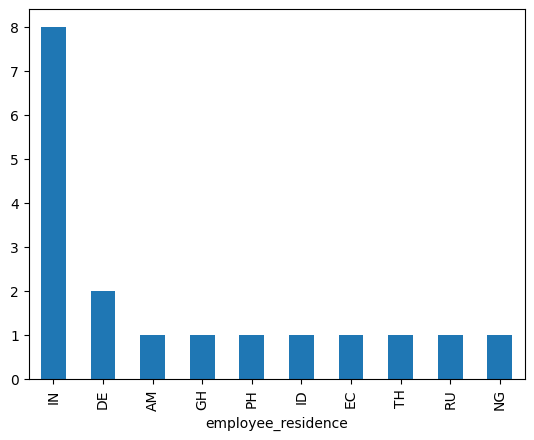

In [ ]:
top_employee_residence.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Remote ratio

In [ ]:
low_outlier.remote_ratio.unique()

array([100,  50,   0])

In [ ]:
low_outlier.remote_ratio.value_counts()

remote_ratio
100    13
50      3
0       2
Name: count, dtype: int64

In [ ]:
low_outlier.remote_ratio.value_counts()/count*100

remote_ratio
100    1.390374
50     0.320856
0      0.213904
Name: count, dtype: float64

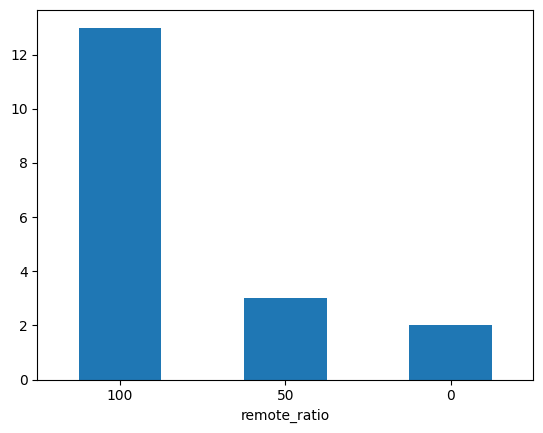

In [ ]:
low_outlier.remote_ratio.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

### Company location

In [ ]:
low_outlier.company_location.unique()

array(['IN', 'RU', 'GH', 'PH', 'ID', 'DE', 'EC', 'TH', 'CA'], dtype=object)

In [ ]:
low_outlier.company_location.unique().size

9

In [ ]:
company_location = pd.DataFrame(low_outlier.company_location.value_counts().copy())

In [ ]:
top_company_location = company_location.head(20)

In [ ]:
top_company_location

count
company_location       
IN                    8
RU                    2
DE                    2
GH                    1
PH                    1
ID                    1
EC                    1
TH                    1
CA                    1

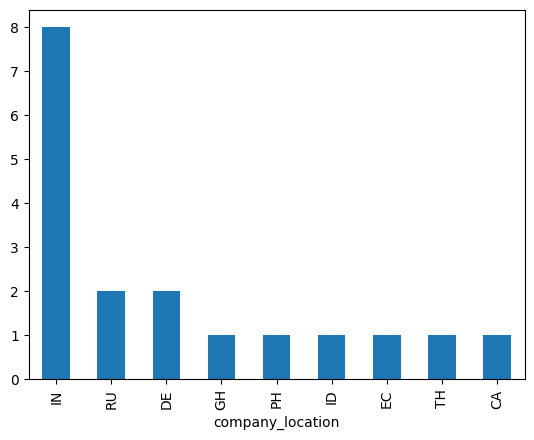

In [ ]:
top_company_location.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

### Company size

In [ ]:
low_outlier.company_size.unique()

array(['L', 'M', 'S'], dtype=object)

In [ ]:
low_outlier.company_size.value_counts()

company_size
L    10
M     5
S     3
Name: count, dtype: int64

In [ ]:
low_outlier.company_size.value_counts()/count*100

company_size
L    1.069519
M    0.534759
S    0.320856
Name: count, dtype: float64

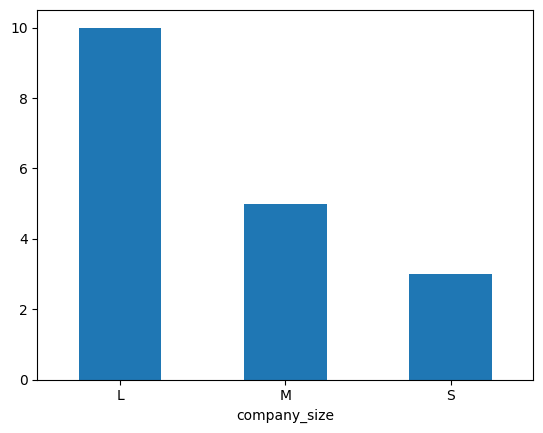

In [ ]:
low_outlier.company_size.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

# Exclude the Outliers

In [ ]:
df_clean = df[(df.salary_in_usd <= higher) & (df.salary_in_usd >= lower)].copy()

In [ ]:
df_clean.head()

work_year experience_level employment_type             job_title  \
0       2024               MI              FT  Admin & Data Analyst   
1       2024               MI              FT  Admin & Data Analyst   
2       2022               SE              FT  Admin & Data Analyst   
3       2023               EN              FT  Admin & Data Analyst   
4       2022               SE              FT          AI Architect   

  job_title_recode  salary salary_currency  salary_in_usd employee_residence  \
0          Analyst   95000             USD          95000                 US   
1          Analyst   38000             EUR          42222                 ES   
2          Analyst   60000             USD          60000                 IN   
3          Analyst   50000             USD          50000                 DE   
4        Architect  180000             USD         180000                 HR   

   remote_ratio company_location company_size  
0             0               US            M  
1           100               ES            L  
2           100               IN            M  
3             0               DE            M  
4           100               US            M

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15698 entries, 0 to 16533
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           15698 non-null  int64 
 1   experience_level    15698 non-null  object
 2   employment_type     15698 non-null  object
 3   job_title           15698 non-null  object
 4   job_title_recode    15698 non-null  object
 5   salary              15698 non-null  int64 
 6   salary_currency     15698 non-null  object
 7   salary_in_usd       15698 non-null  int64 
 8   employee_residence  15698 non-null  object
 9   remote_ratio        15698 non-null  int64 
 10  company_location    15698 non-null  object
 11  company_size        15698 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.6+ MB


## Salary in USD

In [ ]:
df_clean.salary_in_usd.describe()

count     15698.000000
mean     140783.174927
std       54019.359059
min       17511.000000
25%      100000.000000
50%      139400.000000
75%      180000.000000
max      265200.000000
Name: salary_in_usd, dtype: float64

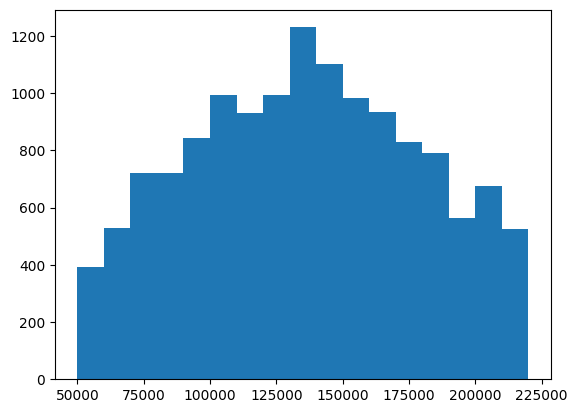

In [ ]:
bins = np.arange(50000, 230000, 10000)
df_clean.salary_in_usd.hist(bins=bins)
plt.grid(False)
plt.show()

In [ ]:
count = 13542

## Work year

In [ ]:
df_clean.work_year.unique()

array([2024, 2022, 2023, 2021, 2020])

In [ ]:
df_clean.work_year.value_counts()

work_year
2023    8054
2024    5737
2022    1628
2021     210
2020      69
Name: count, dtype: int64

In [ ]:
df_clean.work_year.value_counts()/count*100

work_year
2023    59.474228
2024    42.364496
2022    12.021858
2021     1.550731
2020     0.509526
Name: count, dtype: float64

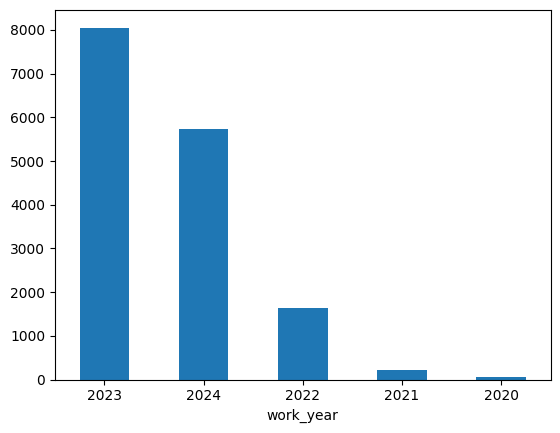

In [ ]:
df_clean.work_year.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

## Experience level

In [ ]:
df_clean.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [ ]:
df_clean.experience_level.value_counts()

experience_level
SE    10016
MI     3942
EN     1309
EX      431
Name: count, dtype: int64

In [ ]:
df_clean.experience_level.value_counts()/count*100

experience_level
SE    73.962487
MI    29.109437
EN     9.666224
EX     3.182691
Name: count, dtype: float64

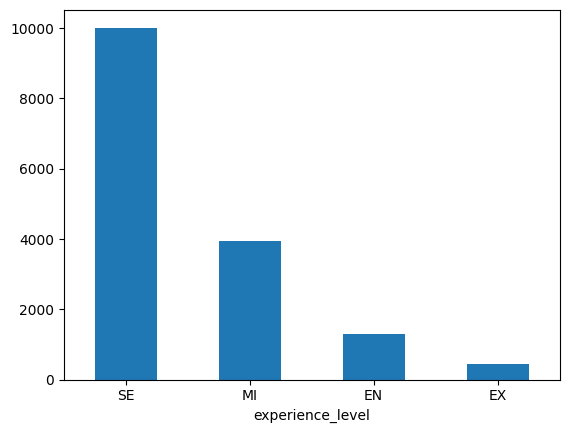

In [ ]:
df_clean.experience_level.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

## Employment type

In [ ]:
df_clean.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [ ]:
df_clean.employment_type.value_counts()

employment_type
FT    15624
PT       35
CT       25
FL       14
Name: count, dtype: int64

In [ ]:
df_clean.employment_type.value_counts()/count*100

employment_type
FT    115.374391
PT      0.258455
CT      0.184611
FL      0.103382
Name: count, dtype: float64

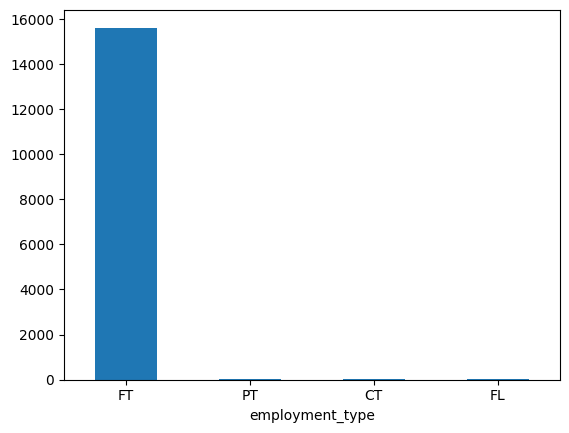

In [ ]:
df_clean.employment_type.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

## Job Title

In [ ]:
df_clean.job_title.unique()

array(['Admin & Data Analyst', 'AI Architect', 'AI Developer',
       'AI Engineer', 'AI Product Manager', 'AI Programmer',
       'AI Research Engineer', 'AI Research Scientist', 'AI Scientist',
       'AI Software Engineer', 'Analytics Engineer',
       'Applied Data Scientist', 'Applied Machine Learning Engineer',
       'Applied Machine Learning Scientist', 'Applied Research Scientist',
       'Applied Scientist', 'Autonomous Vehicle Technician',
       'AWS Data Architect', 'Azure Data Engineer', 'Bear Robotics',
       'BI Analyst', 'BI Data Analyst', 'BI Data Engineer',
       'BI Developer', 'Big Data Architect', 'Big Data Developer',
       'Big Data Engineer', 'Business Data Analyst',
       'Business Intelligence', 'Business Intelligence Analyst',
       'Business Intelligence Data Analyst',
       'Business Intelligence Developer',
       'Business Intelligence Engineer', 'Business Intelligence Lead',
       'Business Intelligence Manager',
       'Business Intelligence Spe

In [ ]:
df_clean.job_title.unique().size

153

In [ ]:
job_title = pd.DataFrame(df_clean.job_title.value_counts().copy())

In [ ]:
top_job_title = job_title.head(20)

In [ ]:
top_job_title

count
job_title                            
Data Engineer                    3362
Data Scientist                   3173
Data Analyst                     2427
Machine Learning Engineer        1508
Research Scientist                456
Applied Scientist                 419
Data Architect                    411
Analytics Engineer                411
Research Engineer                 252
Business Intelligence Engineer    248
Data Science                      240
Data Manager                      212
Business Intelligence Analyst     191
ML Engineer                       166
Machine Learning Scientist        126
Research Analyst                  120
AI Engineer                       110
Data Science Manager              102
Business Intelligence              97
BI Developer                       90

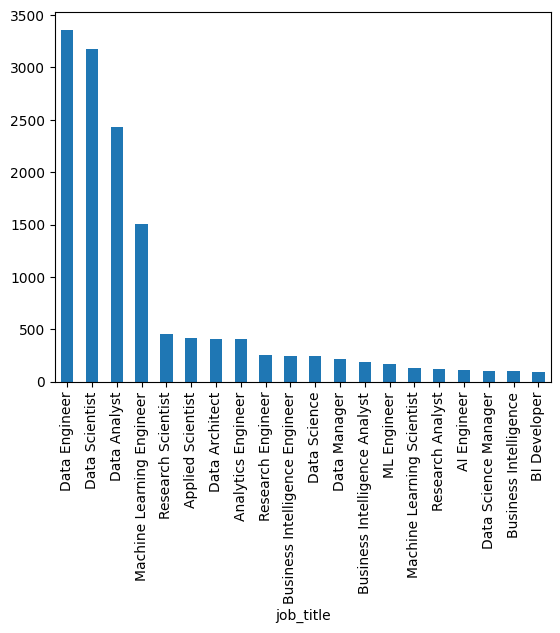

In [ ]:
top_job_title.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Recoded Job title

In [ ]:
df_clean.job_title_recode.unique()

array(['Analyst', 'Architect', 'Developer', 'Engineer', 'Product Manager',
       'Scientist', 'Technician', 'Manager', 'Specialist', 'Biologist',
       'Associate', 'Consultant', 'Modeler', 'Practitioner', 'Researcher',
       'Professional'], dtype=object)

In [ ]:
df_clean.job_title_recode.value_counts()

job_title_recode
Engineer           6393
Scientist          4518
Analyst            3038
Manager             629
Architect           434
Developer           244
Specialist          186
Consultant           93
Modeler              58
Product Manager      46
Researcher           22
Practitioner         16
Professional          8
Associate             7
Biologist             4
Technician            2
Name: count, dtype: int64

In [ ]:
df_clean.job_title_recode.value_counts()/count*100

job_title_recode
Engineer           47.208684
Scientist          33.362871
Analyst            22.433909
Manager             4.644809
Architect           3.204844
Developer           1.801802
Specialist          1.373505
Consultant          0.686752
Modeler             0.428297
Product Manager     0.339684
Researcher          0.162458
Practitioner        0.118151
Professional        0.059075
Associate           0.051691
Biologist           0.029538
Technician          0.014769
Name: count, dtype: float64

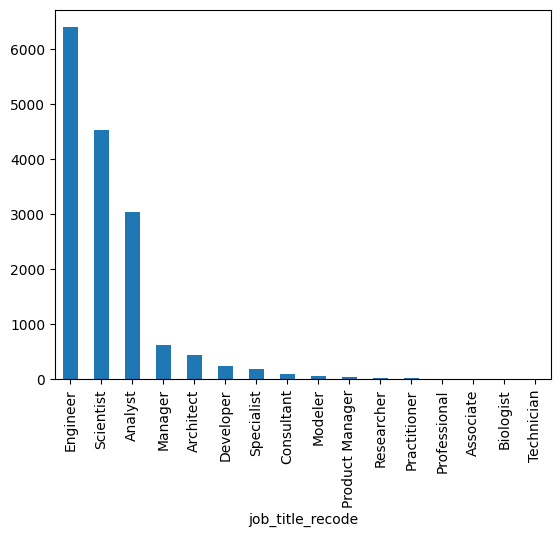

In [ ]:
df_clean.job_title_recode.value_counts().plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Salary currency

In [ ]:
df_clean.salary_currency.unique()

array(['USD', 'EUR', 'SGD', 'ILS', 'GBP', 'INR', 'CAD', 'AUD', 'DKK',
       'BRL', 'TRY', 'HUF', 'PLN', 'NZD', 'CHF', 'MXN', 'JPY', 'THB',
       'NOK', 'HKD', 'CLP', 'ZAR'], dtype=object)

In [ ]:
df_clean.salary_currency.value_counts()

salary_currency
USD    14480
GBP      610
EUR      445
CAD       55
INR       47
AUD       12
PLN        7
CHF        7
SGD        6
BRL        5
JPY        4
DKK        4
HUF        3
TRY        3
THB        2
NOK        2
NZD        1
MXN        1
ILS        1
HKD        1
CLP        1
ZAR        1
Name: count, dtype: int64

In [ ]:
df_clean.salary_currency.value_counts()/count*100

salary_currency
USD    106.926599
GBP      4.504505
EUR      3.286073
CAD      0.406144
INR      0.347068
AUD      0.088613
PLN      0.051691
CHF      0.051691
SGD      0.044307
BRL      0.036922
JPY      0.029538
DKK      0.029538
HUF      0.022153
TRY      0.022153
THB      0.014769
NOK      0.014769
NZD      0.007384
MXN      0.007384
ILS      0.007384
HKD      0.007384
CLP      0.007384
ZAR      0.007384
Name: count, dtype: float64

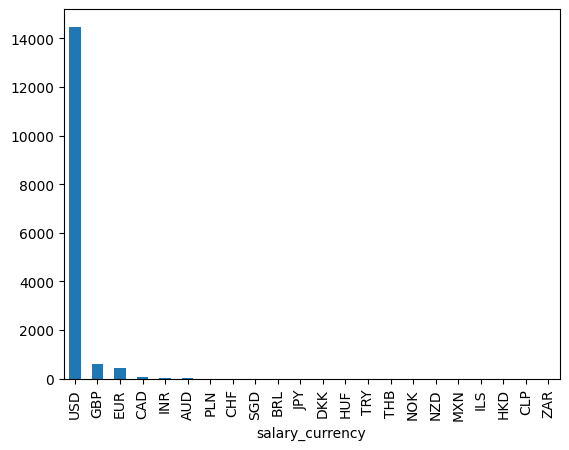

In [ ]:
df_clean.salary_currency.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Employee residence

In [ ]:
df_clean.employee_residence.unique()

array(['US', 'ES', 'IN', 'DE', 'HR', 'BE', 'FR', 'UA', 'IT', 'FI', 'SE',
       'BA', 'IL', 'GB', 'AE', 'OM', 'CA', 'CZ', 'PT', 'RO', 'KR', 'PK',
       'TN', 'SA', 'TR', 'AU', 'GH', 'CO', 'DK', 'EG', 'LT', 'HU', 'NL',
       'NG', 'BR', 'AR', 'KE', 'AT', 'BO', 'VN', 'PL', 'AS', 'MU', 'PH',
       'MX', 'MD', 'LU', 'ZA', 'LV', 'SG', 'RU', 'GE', 'GR', 'IE', 'SI',
       'EE', 'CF', 'UZ', 'KW', 'CN', 'CR', 'BG', 'NZ', 'MT', 'CH', 'PE',
       'PR', 'JP', 'HK', 'LB', 'TH', 'AD', 'NO', 'CY', 'DO', 'DZ', 'RS',
       'CL', 'MY', 'IQ', 'UG', 'AM', 'IR', 'HN', 'JE'], dtype=object)

In [ ]:
df_clean.employee_residence.unique().size

85

In [ ]:
employee_residence = pd.DataFrame(df_clean.employee_residence.value_counts().copy())

In [ ]:
top_employee_residence = employee_residence.head(20)

In [ ]:
top_employee_residence

count
employee_residence       
US                  13694
GB                    675
CA                    431
ES                    137
DE                     93
IN                     70
FR                     68
AU                     50
NL                     32
PT                     30
BR                     24
IT                     21
LT                     20
ZA                     19
GR                     17
CO                     16
LV                     16
PL                     15
EG                     14
AR                     13

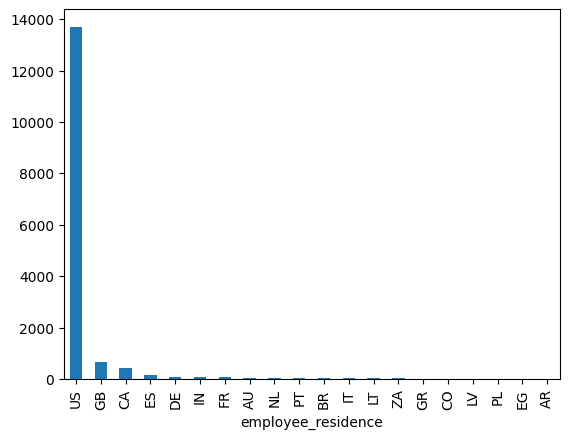

In [ ]:
top_employee_residence.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Remote ratio

In [ ]:
df_clean.remote_ratio.unique()

array([  0, 100,  50])

In [ ]:
df_clean.remote_ratio.value_counts()

remote_ratio
0      10485
100     4972
50       241
Name: count, dtype: int64

In [ ]:
df_clean.remote_ratio.value_counts()/count*100

remote_ratio
0      77.425786
100    36.715404
50      1.779649
Name: count, dtype: float64

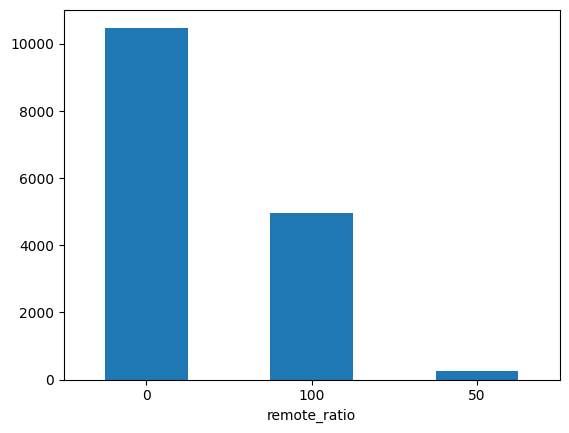

In [ ]:
df_clean.remote_ratio.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

## Company location

In [ ]:
df_clean.company_location.unique()

array(['US', 'ES', 'IN', 'DE', 'FR', 'UA', 'IT', 'FI', 'SE', 'BA', 'IL',
       'GB', 'AE', 'OM', 'CA', 'PT', 'RO', 'KR', 'AU', 'HU', 'CH', 'SA',
       'TR', 'GH', 'CO', 'DK', 'AS', 'EG', 'LT', 'NL', 'NG', 'BR', 'KE',
       'PK', 'AT', 'CZ', 'PL', 'BS', 'MU', 'PH', 'JP', 'MX', 'MD', 'GI',
       'LU', 'ZA', 'LV', 'SG', 'IE', 'SI', 'EE', 'CF', 'HR', 'AR', 'GR',
       'NZ', 'MT', 'PR', 'LB', 'TH', 'RU', 'AD', 'NO', 'HK', 'BE', 'ID',
       'MY', 'DZ', 'CL', 'IQ', 'VN', 'AM', 'IR', 'HN', 'CN'], dtype=object)

In [ ]:
df_clean.company_location.unique().size

75

In [ ]:
company_location = pd.DataFrame(df_clean.company_location.value_counts().copy())

In [ ]:
top_company_location = company_location.head(20)

In [ ]:
top_company_location

count
company_location       
US                13744
GB                  683
CA                  432
ES                  133
DE                  100
FR                   65
IN                   55
AU                   53
NL                   32
PT                   28
BR                   22
LT                   20
ZA                   19
LV                   16
CO                   16
IT                   14
MX                   14
PL                   14
GR                   14
EG                   13

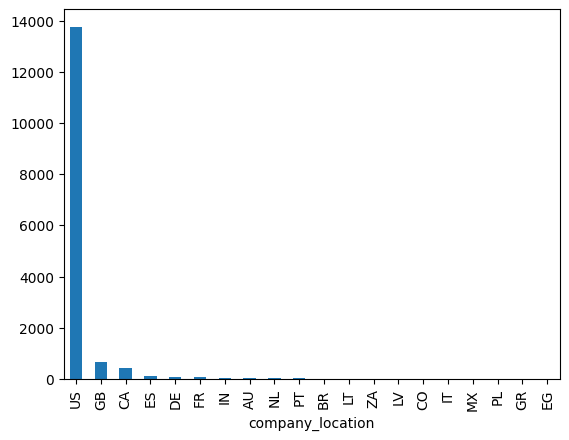

In [ ]:
top_company_location.plot.bar(legend=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

## Company size

In [ ]:
df_clean.company_size.unique()

array(['M', 'L', 'S'], dtype=object)

In [ ]:
df_clean.company_size.value_counts()

company_size
M    14517
L      998
S      183
Name: count, dtype: int64

In [ ]:
df_clean.company_size.value_counts()/count*100

company_size
M    107.199823
L      7.369665
S      1.351351
Name: count, dtype: float64

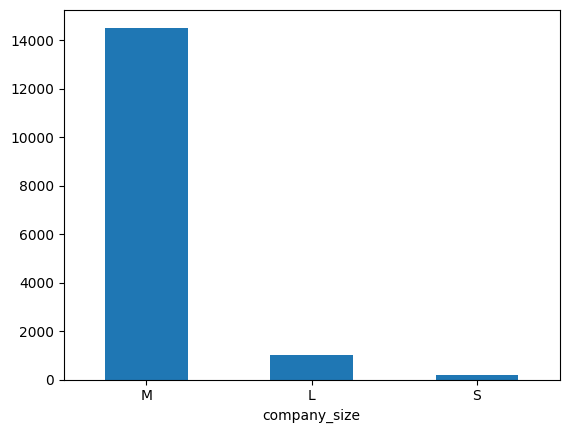

In [ ]:
df_clean.company_size.value_counts().plot.bar()
plt.grid(False)
plt.xticks(rotation=0)
plt.show()

# Hypothesis testing

## Work year

### Exclude category outliers

In [ ]:
df_hypo = df_clean.copy()[['work_year', 'salary_in_usd']]

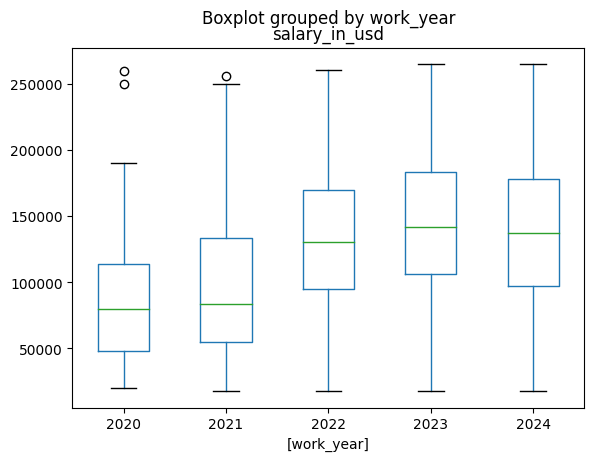

In [ ]:
df_hypo.boxplot(by='work_year', grid = False)
plt.show()

In [ ]:
salary_2020 = np.array(df_hypo[df_hypo.work_year == 2020].copy()[['salary_in_usd']])
salary_2021 = np.array(df_hypo[df_hypo.work_year == 2021].copy()[['salary_in_usd']])
salary_2022 = np.array(df_hypo[df_hypo.work_year == 2022].copy()[['salary_in_usd']])
salary_2023 = np.array(df_hypo[df_hypo.work_year == 2023].copy()[['salary_in_usd']])
salary_2024 = np.array(df_hypo[df_hypo.work_year == 2024].copy()[['salary_in_usd']])

In [ ]:
salary_2020.size

69

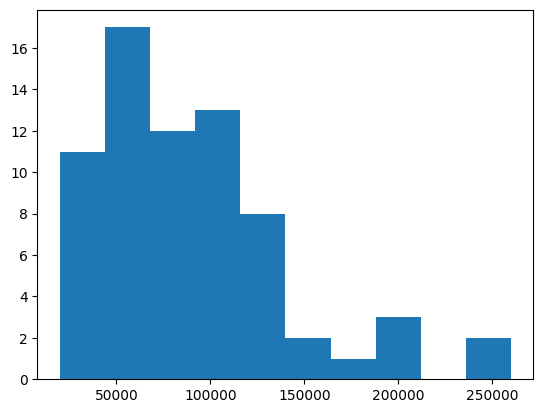

In [ ]:
plt.hist(salary_2020)
plt.show()

In [ ]:
median_2020 = np.median(salary_2020)
median_2020

79833.0

In [ ]:
mad_2020 = stats.median_abs_deviation(salary_2020)[0]
mad_2020

33039.0

In [ ]:
high_2020 = median_2020 + z_alpha*mad_2020
high_2020

178950.0

In [ ]:
low_2020 = median_2020 - z_alpha*mad_2020
low_2020

-19284.0

In [ ]:
salary_2021.size

210

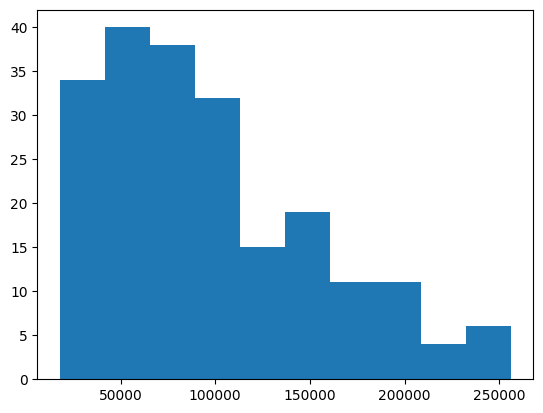

In [ ]:
plt.hist(salary_2021)
plt.show()

In [ ]:
median_2021 = np.median(salary_2021)
median_2021

83872.0

In [ ]:
mad_2021 = stats.median_abs_deviation(salary_2021)[0]
mad_2021

33872.0

In [ ]:
high_2021 = median_2021 + z_alpha*mad_2021
high_2021

185488.0

In [ ]:
low_2021 = median_2021 - z_alpha*mad_2021
low_2021

-17744.0

In [ ]:
salary_2022.size

1628

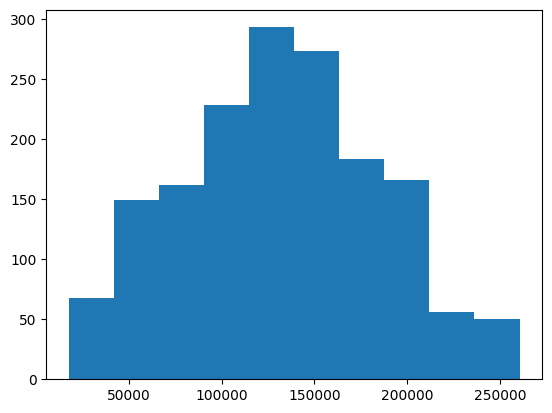

In [ ]:
plt.hist(salary_2022)
plt.show()

In [ ]:
median_2022 = np.median(salary_2022)
median_2022

130750.0

In [ ]:
mad_2022 = stats.median_abs_deviation(salary_2022)[0]
mad_2022

38250.0

In [ ]:
high_2022 = median_2022 + z_alpha*mad_2022
high_2022

245500.0

In [ ]:
low_2022 = median_2022 - z_alpha*mad_2022
low_2022

16000.0

In [ ]:
salary_2023.size

8054

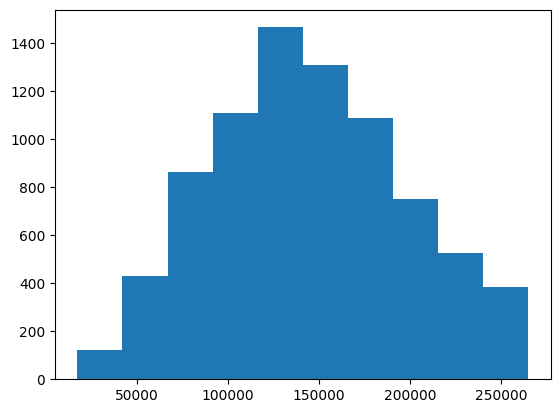

In [ ]:
plt.hist(salary_2023)
plt.show()

In [ ]:
median_2023 = np.median(salary_2023)
median_2023

142100.0

In [ ]:
mad_2023 = stats.median_abs_deviation(salary_2023)[0]
mad_2023

37900.0

In [ ]:
high_2023 = median_2023 + z_alpha*mad_2023
high_2023

255800.0

In [ ]:
low_2023 = median_2023 - z_alpha*mad_2023
low_2023

28400.0

In [ ]:
salary_2024.size

5737

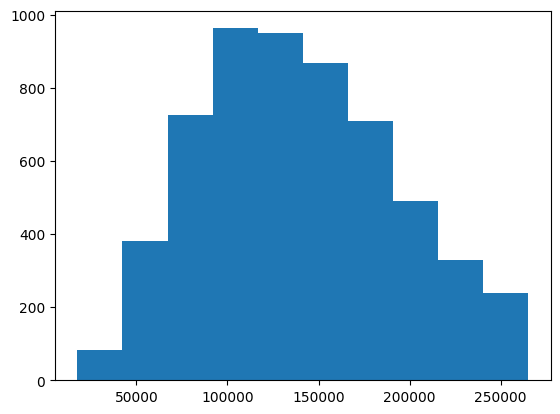

In [ ]:
plt.hist(salary_2024)
plt.show()

In [ ]:
median_2024 = np.median(salary_2024)
median_2024

137100.0

In [ ]:
mad_2024 = stats.median_abs_deviation(salary_2024)[0]
mad_2024

40100.0

In [ ]:
high_2024 = median_2024 + z_alpha*mad_2024
high_2024

257400.0

In [ ]:
low_2024 = median_2024 - z_alpha*mad_2024
low_2024

16800.0

In [ ]:
df_hypo = df_hypo[((df_hypo.work_year == 2020) & (df_hypo.salary_in_usd <= high_2020) & (df_hypo.salary_in_usd >= low_2020)) |
                  ((df_hypo.work_year == 2021) & (df_hypo.salary_in_usd <= high_2021) & (df_hypo.salary_in_usd >= low_2021)) |
                  ((df_hypo.work_year == 2022) & (df_hypo.salary_in_usd <= high_2022) & (df_hypo.salary_in_usd >= low_2022)) |
                  ((df_hypo.work_year == 2023) & (df_hypo.salary_in_usd <= high_2023) & (df_hypo.salary_in_usd >= low_2023)) |
                  ((df_hypo.work_year == 2024) & (df_hypo.salary_in_usd <= high_2024) & (df_hypo.salary_in_usd >= low_2024))]

In [ ]:
df_clean = df_clean[((df_clean.work_year == 2020) & (df_clean.salary_in_usd <= high_2020) & (df_clean.salary_in_usd >= low_2020)) |
                    ((df_clean.work_year == 2021) & (df_clean.salary_in_usd <= high_2021) & (df_clean.salary_in_usd >= low_2021)) |
                    ((df_clean.work_year == 2022) & (df_clean.salary_in_usd <= high_2022) & (df_clean.salary_in_usd >= low_2022)) |
                    ((df_clean.work_year == 2023) & (df_clean.salary_in_usd <= high_2023) & (df_clean.salary_in_usd >= low_2023)) |
                    ((df_clean.work_year == 2024) & (df_clean.salary_in_usd <= high_2024) & (df_clean.salary_in_usd >= low_2024))]

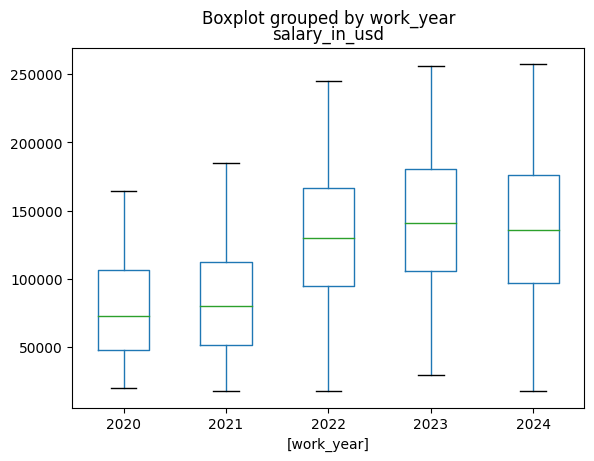

In [ ]:
df_hypo.boxplot(by='work_year', grid = False)
plt.show()

### Oversampling

In [ ]:
# Create the oversampler
ros = RandomOverSampler(random_state=42)

# Fit the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(np.reshape(df_hypo.salary_in_usd, (-1,1)), np.array(df_hypo.work_year))

In [ ]:
X_resampled = np.reshape(X_resampled, -1)

In [ ]:
X_resampled.size

39560

In [ ]:
y_resampled.size

39560

In [ ]:
df_hypo = pd.DataFrame({'work_year': y_resampled, 'salary_in_usd': X_resampled})

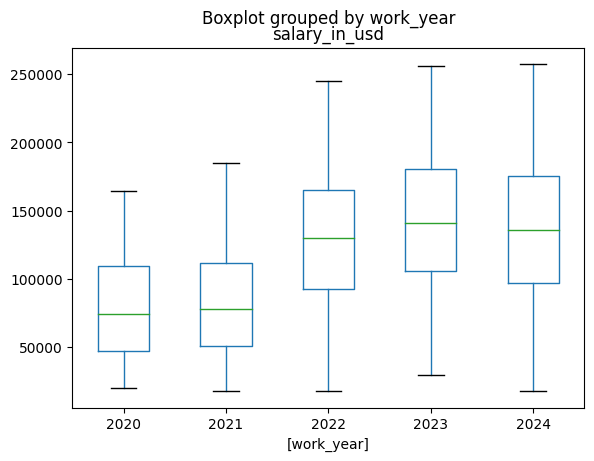

In [ ]:
df_hypo.boxplot(by='work_year', grid = False)
plt.show()

In [ ]:
salary_2020 = np.array(df_hypo[df_hypo.work_year == 2020].copy()[['salary_in_usd']])
salary_2021 = np.array(df_hypo[df_hypo.work_year == 2021].copy()[['salary_in_usd']])
salary_2022 = np.array(df_hypo[df_hypo.work_year == 2022].copy()[['salary_in_usd']])
salary_2023 = np.array(df_hypo[df_hypo.work_year == 2023].copy()[['salary_in_usd']])
salary_2024 = np.array(df_hypo[df_hypo.work_year == 2024].copy()[['salary_in_usd']])

In [ ]:
salary_2020.size

7912

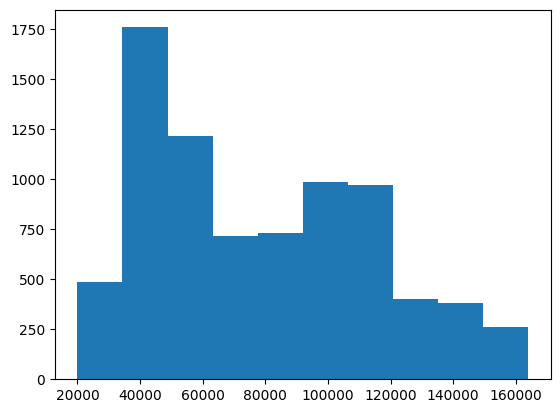

In [ ]:
plt.hist(salary_2020)
plt.show()

In [ ]:
salary_2021.size

7912

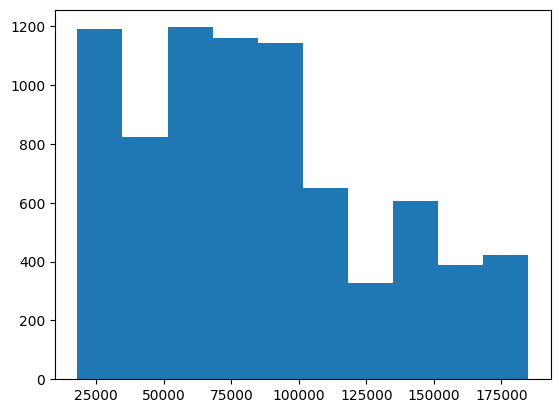

In [ ]:
plt.hist(salary_2021)
plt.show()

In [ ]:
salary_2022.size

7912

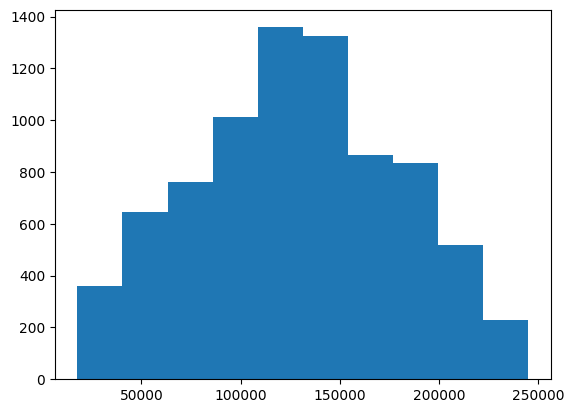

In [ ]:
plt.hist(salary_2022)
plt.show()

In [ ]:
salary_2023.size

7912

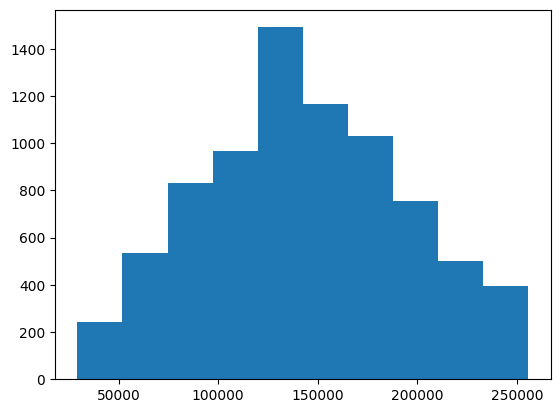

In [ ]:
plt.hist(salary_2023)
plt.show()

In [ ]:
salary_2024.size

7912

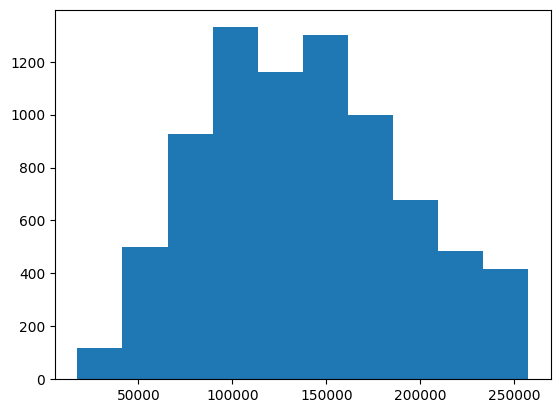

In [ ]:
plt.hist(salary_2024)
plt.show()

### Hypothesis testing

In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2021 data engineers have salary no higher than 2020 data engineers."
alternate_hypothesis = "2021 data engineers have salary higher than 2020 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2021, salary_2020)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2021 is lower than 2020 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2021 is higher than 2020 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2021 and 2020 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [7.81883416]
P-value: [6.01918668e-15]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2021 is higher than 2020 data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2022 data engineers have salary no higher than 2021 data engineers."
alternate_hypothesis = "2022 data engineers have salary higher than 2021 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2022, salary_2021)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2022 is lower than 2021 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2022 is higher than 2021 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2022 and 2021 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [57.9344081]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2022 is higher than 2021 data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2023 data engineers have salary no higher than 2022 data engineers."
alternate_hypothesis = "2023 data engineers have salary higher than 2022 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2023, salary_2022)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2023 is lower than 2022 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2023 is higher than 2022 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2023 and 2022 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [18.24657712]
P-value: [6.78983106e-73]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2023 is higher than 2022 data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2024 data engineers have salary no higher than 2023 data engineers."
alternate_hypothesis = "2024 data engineers have salary higher than 2023 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2024, salary_2023)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is lower than 2023 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is higher than 2023 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2024 and 2023 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-7.26334815]
P-value: [4.13542679e-13]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2024 is lower than 2023 data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2024 data engineers have salary no higher than 2022 data engineers."
alternate_hypothesis = "2024 data engineers have salary higher than 2022 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2024, salary_2022)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is lower than 2022 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is higher than 2022 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2024 and 2022 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [11.07000557]
P-value: [2.82701518e-28]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2024 is higher than 2022 data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "2024 data engineers have salary no higher than 2021 data engineers."
alternate_hypothesis = "2024 data engineers have salary higher than 2021 data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_2024, salary_2021)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is lower than 2021 data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for 2024 is higher than 2021 data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for 2024 and 2021 data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [68.36618072]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for 2024 is higher than 2021 data engineers.


## Experience level

### Exclude category outliers

In [ ]:
df_hypo = df_clean.copy()[['experience_level', 'salary_in_usd']]

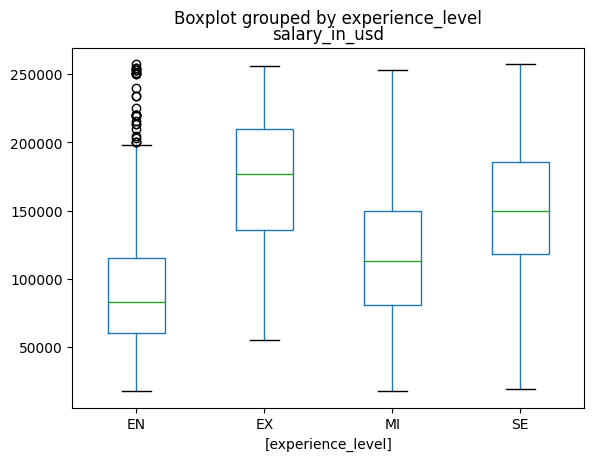

In [ ]:
df_hypo.boxplot(by='experience_level', grid = False)
plt.show()

In [ ]:
salary_EN = np.array(df_hypo[df_hypo.experience_level == 'EN'].copy()[['salary_in_usd']])
salary_MI = np.array(df_hypo[df_hypo.experience_level == 'MI'].copy()[['salary_in_usd']])
salary_SE = np.array(df_hypo[df_hypo.experience_level == 'SE'].copy()[['salary_in_usd']])
salary_EX = np.array(df_hypo[df_hypo.experience_level == 'EX'].copy()[['salary_in_usd']])

In [ ]:
salary_EN.size

1288

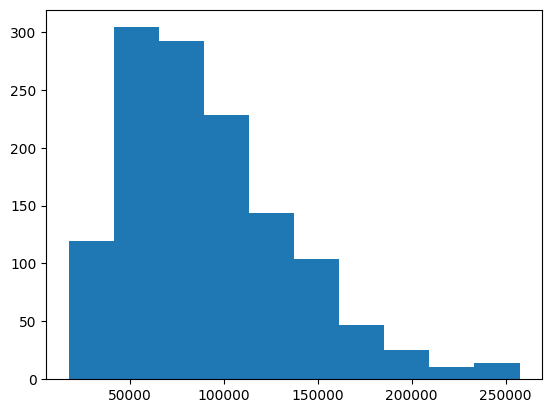

In [ ]:
plt.hist(salary_EN)
plt.show()

In [ ]:
median_EN = np.median(salary_EN)
median_EN

83300.0

In [ ]:
mad_EN = stats.median_abs_deviation(salary_EN)[0]
mad_EN

27150.0

In [ ]:
high_EN = median_EN + z_alpha*mad_EN
high_EN

164750.0

In [ ]:
low_EN = median_EN - z_alpha*mad_EN
low_EN

1850.0

In [ ]:
salary_MI.size

3911

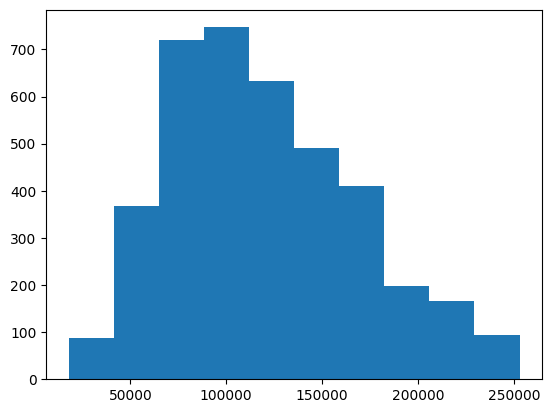

In [ ]:
plt.hist(salary_MI)
plt.show()

In [ ]:
median_MI = np.median(salary_MI)
median_MI

113000.0

In [ ]:
mad_MI = stats.median_abs_deviation(salary_MI)[0]
mad_MI

36000.0

In [ ]:
high_MI = median_MI + z_alpha*mad_MI
high_MI

221000.0

In [ ]:
low_MI = median_MI - z_alpha*mad_MI
low_MI

5000.0

In [ ]:
salary_SE.size

9828

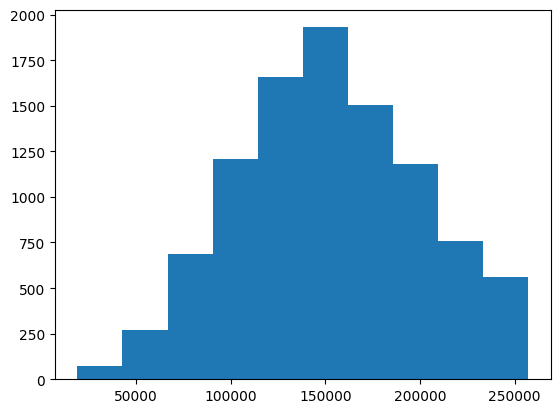

In [ ]:
plt.hist(salary_SE)
plt.show()

In [ ]:
median_SE = np.median(salary_SE)
median_SE

150000.0

In [ ]:
mad_SE = stats.median_abs_deviation(salary_SE)[0]
mad_SE

35000.0

In [ ]:
high_SE = median_SE + z_alpha*mad_SE
high_SE

255000.0

In [ ]:
low_SE = median_SE - z_alpha*mad_SE
low_SE

45000.0

In [ ]:
salary_EX.size

415

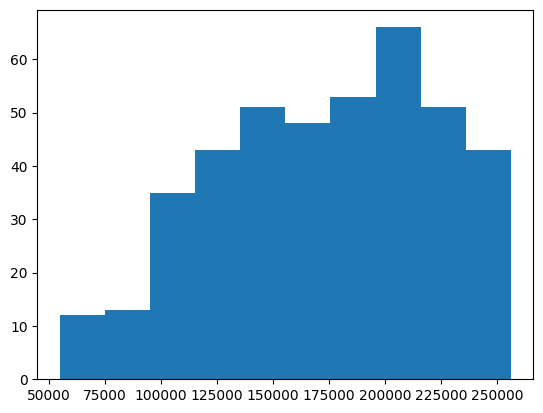

In [ ]:
plt.hist(salary_EX)
plt.show()

In [ ]:
median_EX = np.median(salary_EX)
median_EX

176900.0

In [ ]:
mad_EX = stats.median_abs_deviation(salary_EX)[0]
mad_EX

36900.0

In [ ]:
high_EX = median_EX + z_alpha*mad_EX
high_EX

287600.0

In [ ]:
low_EX = median_EX - z_alpha*mad_EX
low_EX

66200.0

In [ ]:
df_hypo = df_hypo[((df_hypo.experience_level == 'EN') & (df_hypo.salary_in_usd <= high_EN) & (df_hypo.salary_in_usd >= low_EN)) |
                  ((df_hypo.experience_level == 'MI') & (df_hypo.salary_in_usd <= high_MI) & (df_hypo.salary_in_usd >= low_MI)) |
                  ((df_hypo.experience_level == 'SE') & (df_hypo.salary_in_usd <= high_SE) & (df_hypo.salary_in_usd >= low_SE)) |
                  ((df_hypo.experience_level == 'EX') & (df_hypo.salary_in_usd <= high_EX) & (df_hypo.salary_in_usd >= low_EX))]

In [ ]:
df_clean = df_clean[((df_clean.experience_level == 'EN') & (df_clean.salary_in_usd <= high_EN) & (df_clean.salary_in_usd >= low_EN)) |
                    ((df_clean.experience_level == 'MI') & (df_clean.salary_in_usd <= high_MI) & (df_clean.salary_in_usd >= low_MI)) |
                    ((df_clean.experience_level == 'SE') & (df_clean.salary_in_usd <= high_SE) & (df_clean.salary_in_usd >= low_SE)) |
                    ((df_clean.experience_level == 'EX') & (df_clean.salary_in_usd <= high_EX) & (df_clean.salary_in_usd >= low_EX))]

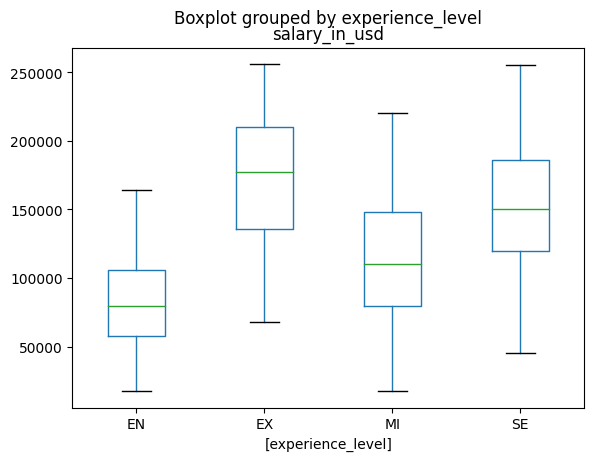

In [ ]:
df_hypo.boxplot(by='experience_level', grid = False)
plt.show()

### Oversampling

In [ ]:
# Create the oversampler
ros = RandomOverSampler(random_state=42)

# Fit the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(np.reshape(df_hypo.salary_in_usd, (-1,1)), np.array(df_hypo.experience_level))

In [ ]:
X_resampled = np.reshape(X_resampled, -1)

In [ ]:
X_resampled.size

38928

In [ ]:
y_resampled.size

38928

In [ ]:
df_hypo = pd.DataFrame({'experience_level': y_resampled, 'salary_in_usd': X_resampled})

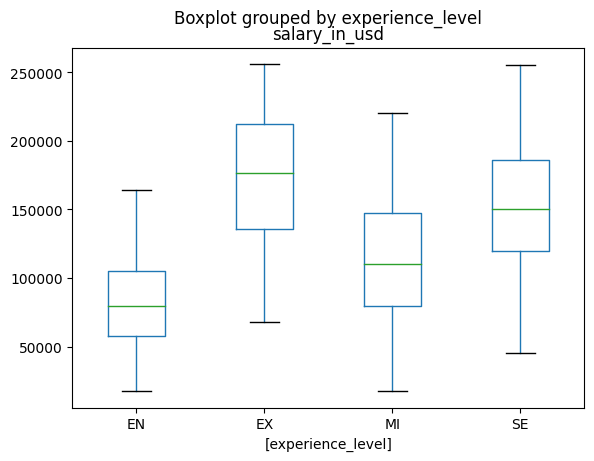

In [ ]:
df_hypo.boxplot(by='experience_level', grid = False)
plt.show()

In [ ]:
salary_EN = np.array(df_hypo[df_hypo.experience_level == 'EN'].copy()[['salary_in_usd']])
salary_MI = np.array(df_hypo[df_hypo.experience_level == 'MI'].copy()[['salary_in_usd']])
salary_SE = np.array(df_hypo[df_hypo.experience_level == 'SE'].copy()[['salary_in_usd']])
salary_EX = np.array(df_hypo[df_hypo.experience_level == 'EX'].copy()[['salary_in_usd']])

In [ ]:
salary_EN.size

9732

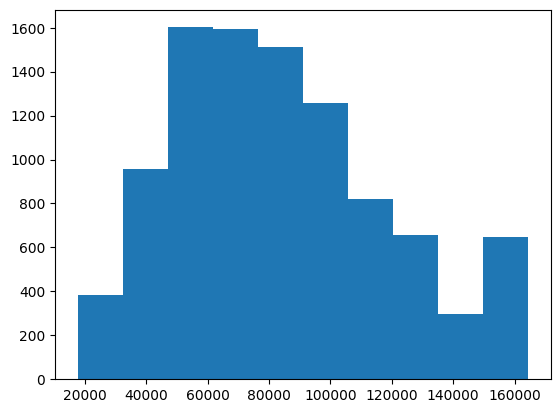

In [ ]:
plt.hist(salary_EN)
plt.show()

In [ ]:
salary_MI.size

9732

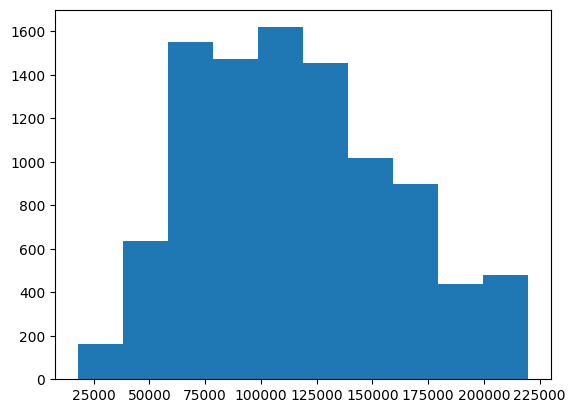

In [ ]:
plt.hist(salary_MI)
plt.show()

In [ ]:
salary_SE.size

9732

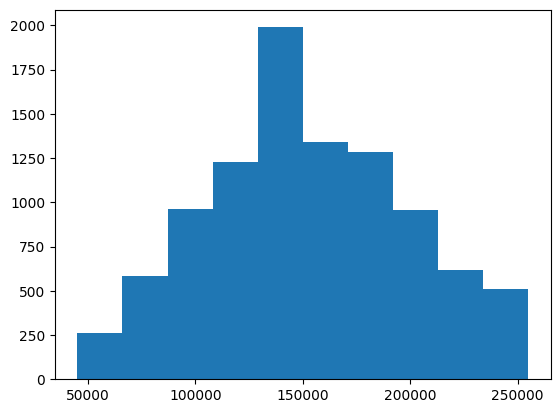

In [ ]:
plt.hist(salary_SE)
plt.show()

In [ ]:
salary_EX.size

9732

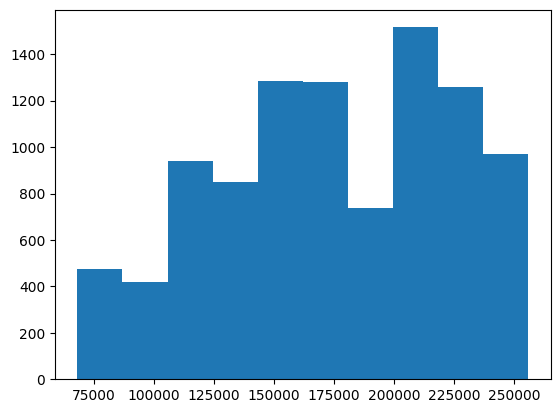

In [ ]:
plt.hist(salary_EX)
plt.show()

### Hypothesis testing

In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Middle level data engineers have salary no higher than entry level data engineers."
alternate_hypothesis = "Middle level data engineers have salary higher than entry level data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_MI, salary_EN)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for middle level is lower than entry level data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for middle level is higher than entry level data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for middle level and entry level data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [54.05839358]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for middle level is higher than entry level data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Senior level data engineers have salary no higher than middle level data engineers."
alternate_hypothesis = "Senior level data engineers have salary higher than middle level data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_SE, salary_MI)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for senior level is lower than middle level data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for senior level is higher than middle level data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for senior level and middle level data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [57.34145173]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for senior level is higher than middle level data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Expert level data engineers have salary no higher than senior level data engineers."
alternate_hypothesis = "Expert level data engineers have salary higher than senior level data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_EX, salary_SE)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for expert level is lower than senior level data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for expert level is higher than senior level data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for expert level and senior level data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [29.80217035]
P-value: [7.63459044e-187]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for expert level is higher than senior level data engineers.


## Employment type

### Exclude category outliers

In [ ]:
df_hypo = df_clean.copy()[['employment_type', 'salary_in_usd']]

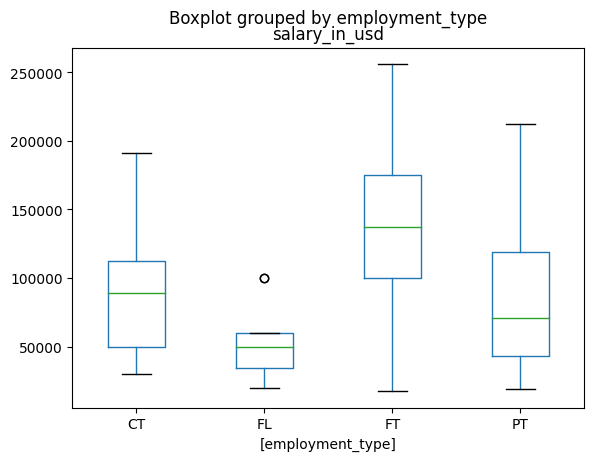

In [ ]:
df_hypo.boxplot(by='employment_type', grid = False)
plt.show()

In [ ]:
salary_FT = np.array(df_hypo[df_hypo.employment_type == 'FT'].copy()[['salary_in_usd']])
salary_CT = np.array(df_hypo[df_hypo.employment_type == 'CT'].copy()[['salary_in_usd']])
salary_PT = np.array(df_hypo[df_hypo.employment_type == 'PT'].copy()[['salary_in_usd']])
salary_FL = np.array(df_hypo[df_hypo.employment_type == 'FL'].copy()[['salary_in_usd']])
salary_not_FT = np.array(df_hypo[df_hypo.employment_type != 'FT'].copy()[['salary_in_usd']])

In [ ]:
salary_FT.size

15039

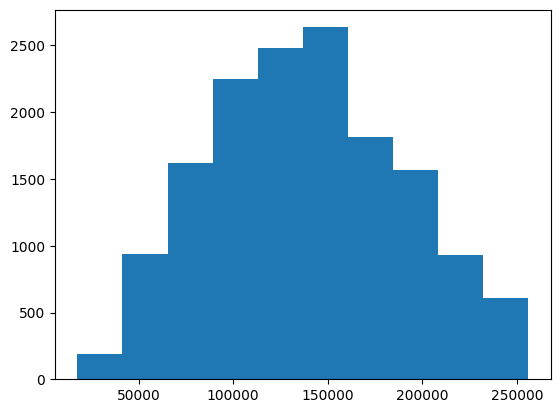

In [ ]:
plt.hist(salary_FT)
plt.show()

In [ ]:
median_FT = np.median(salary_FT)
median_FT

137500.0

In [ ]:
mad_FT = stats.median_abs_deviation(salary_FT)[0]
mad_FT

37500.0

In [ ]:
high_FT = median_FT + z_alpha*mad_FT
high_FT

250000.0

In [ ]:
low_FT = median_FT - z_alpha*mad_FT
low_FT

25000.0

In [ ]:
salary_CT.size

24

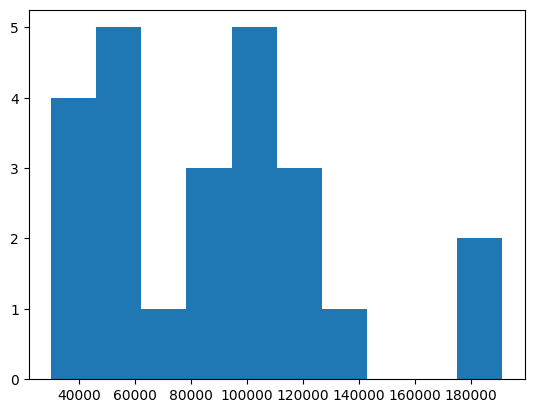

In [ ]:
plt.hist(salary_CT)
plt.show()

In [ ]:
salary_PT.size

32

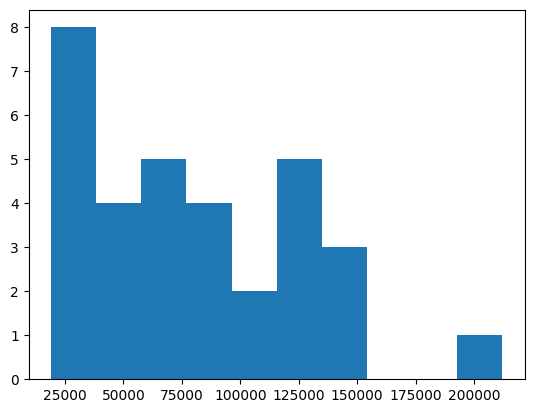

In [ ]:
plt.hist(salary_PT)
plt.show()

In [ ]:
salary_FL.size

12

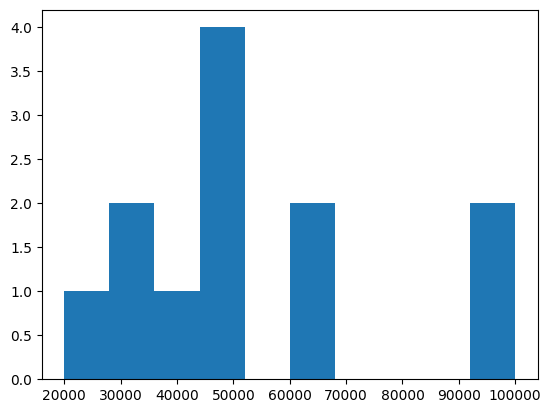

In [ ]:
plt.hist(salary_FL)
plt.show()

In [ ]:
salary_not_FT.size

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


68

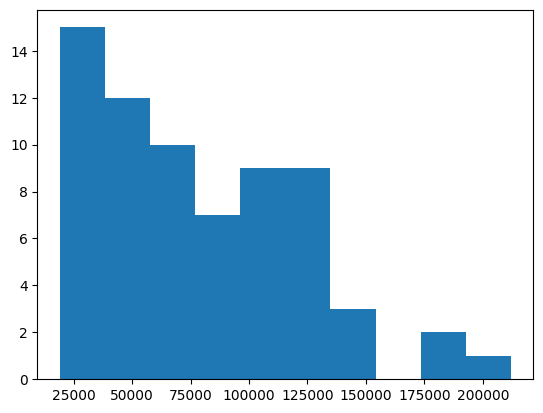

In [ ]:
plt.hist(salary_not_FT)
plt.show()

In [ ]:
median_not_FT = np.median(salary_not_FT)
median_not_FT

63247.5

In [ ]:
mad_not_FT = stats.median_abs_deviation(salary_not_FT)[0]
mad_not_FT

32751.5

In [ ]:
high_not_FT = median_not_FT + z_alpha*mad_not_FT
high_not_FT

161502.0

In [ ]:
low_not_FT = median_not_FT - z_alpha*mad_not_FT
low_not_FT

-35007.0

In [ ]:
df_hypo = df_hypo[((df_hypo.employment_type == 'FT') & (df_hypo.salary_in_usd <= high_FT) & (df_hypo.salary_in_usd >= low_FT)) |
                  ((df_hypo.employment_type != 'FT') & (df_hypo.salary_in_usd <= high_not_FT) & (df_hypo.salary_in_usd >= low_not_FT))]

In [ ]:
df_clean = df_clean[((df_clean.employment_type == 'FT') & (df_clean.salary_in_usd <= high_FT) & (df_clean.salary_in_usd >= low_FT)) |
                    ((df_clean.employment_type != 'FT') & (df_clean.salary_in_usd <= high_not_FT) & (df_clean.salary_in_usd >= low_not_FT))]

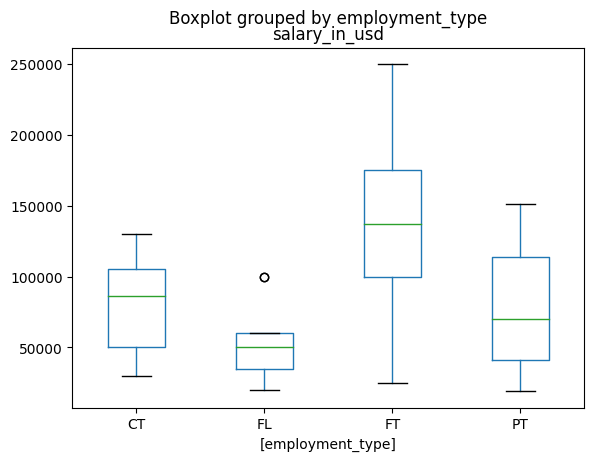

In [ ]:
df_hypo.boxplot(by='employment_type', grid = False)
plt.show()

### Oversampling

In [ ]:
# Create the oversampler
ros = RandomOverSampler(random_state=42)

# Fit the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(np.reshape(df_hypo.salary_in_usd, (-1,1)), np.array(df_hypo.employment_type))

In [ ]:
X_resampled = np.reshape(X_resampled, -1)

In [ ]:
X_resampled.size

59660

In [ ]:
y_resampled.size

59660

In [ ]:
df_hypo = pd.DataFrame({'employment_type': y_resampled, 'salary_in_usd': X_resampled})

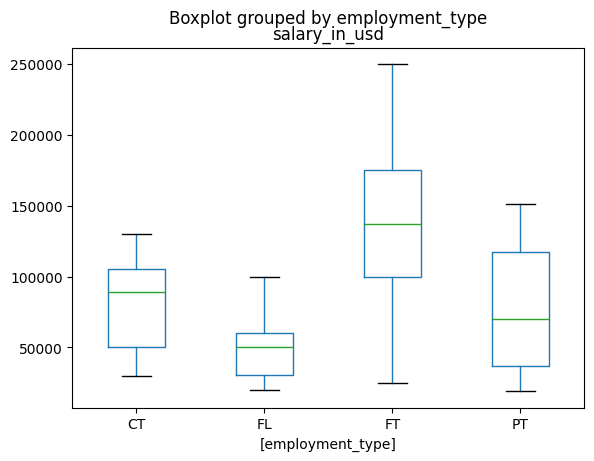

In [ ]:
df_hypo.boxplot(by='employment_type', grid = False)
plt.show()

In [ ]:
salary_FT = np.array(df_hypo[df_hypo.employment_type == 'FT'].copy()[['salary_in_usd']])
salary_CT = np.array(df_hypo[df_hypo.employment_type == 'CT'].copy()[['salary_in_usd']])
salary_PT = np.array(df_hypo[df_hypo.employment_type == 'PT'].copy()[['salary_in_usd']])
salary_FL = np.array(df_hypo[df_hypo.employment_type == 'FL'].copy()[['salary_in_usd']])

In [ ]:
salary_FT.size

14915

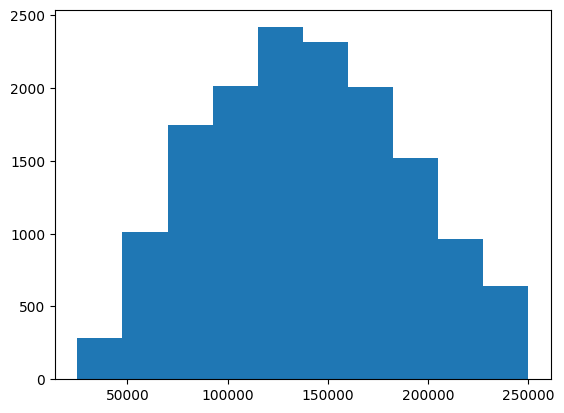

In [ ]:
plt.hist(salary_FT)
plt.show()

In [ ]:
salary_CT.size

14915

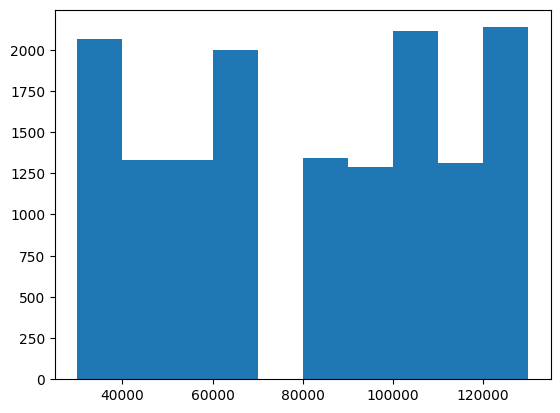

In [ ]:
plt.hist(salary_CT)
plt.show()

In [ ]:
salary_PT.size

14915

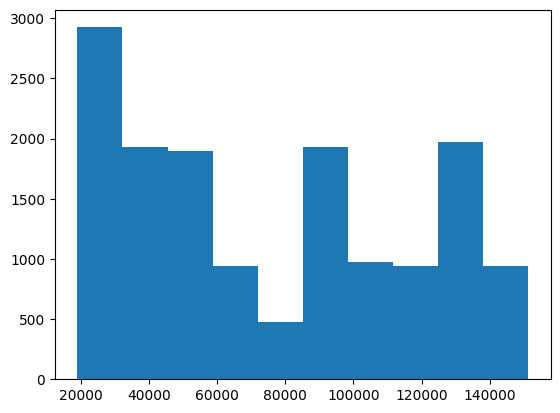

In [ ]:
plt.hist(salary_PT)
plt.show()

In [ ]:
salary_FL.size

14915

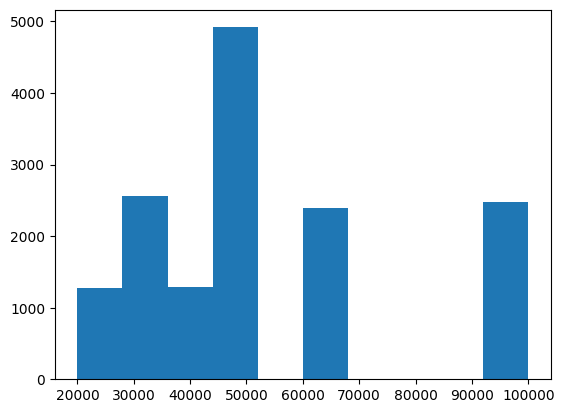

In [ ]:
plt.hist(salary_FL)
plt.show()

### Hypothesis testing

In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Fulltime data engineers have salary no higher than contract data engineers."
alternate_hypothesis = "Fulltime data engineers have salary higher than contract data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_FT, salary_CT)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for fulltime is lower than contract data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for fulltime is higher than contract data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for fulltime and contract data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [119.84224637]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for fulltime is higher than contract data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Contract data engineers have salary no higher than parttime data engineers."
alternate_hypothesis = "Contract data engineers have salary higher than parttime data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_CT, salary_PT)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for contract is lower than parttime data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for contract is higher than parttime data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for contract and parttime data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [5.74884543]
P-value: [9.16128697e-09]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for contract is higher than parttime data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Parttime data engineers have salary no higher than freelance data engineers."
alternate_hypothesis = "Parttime data engineers have salary higher than freelance data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_PT, salary_FL)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for parttime is lower than freelance data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for parttime is higher than freelance data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for parttime and freelance data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [63.07859195]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for parttime is higher than freelance data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Contract data engineers have salary no higher than freelance data engineers."
alternate_hypothesis = "Contract data engineers have salary higher than freelance data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_CT, salary_FL)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for contract is lower than freelance data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for contract is higher than freelance data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for contract and freelance data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [82.3295898]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for contract is higher than freelance data engineers.


## Job title

### Exclude category outliers

In [ ]:
df_hypo = df_clean.copy()[['job_title_recode', 'salary_in_usd']]

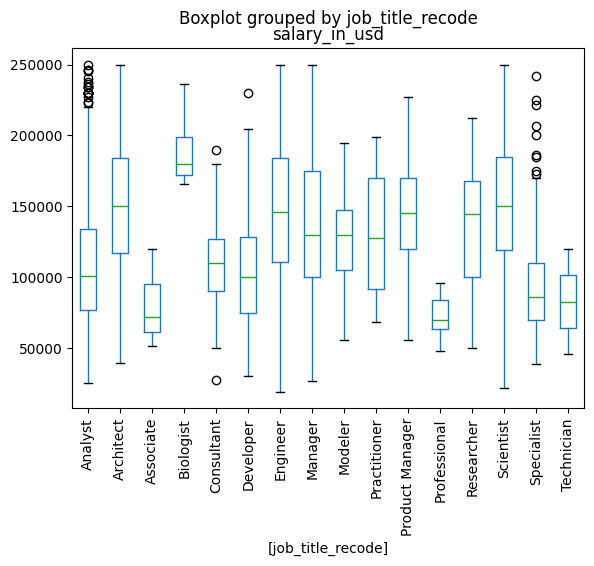

In [ ]:
df_hypo.boxplot(by='job_title_recode', grid = False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
salary_Analyst = np.array(df_hypo[df_hypo.job_title_recode == 'Analyst'].copy()[['salary_in_usd']])
salary_Engineer = np.array(df_hypo[df_hypo.job_title_recode == 'Engineer'].copy()[['salary_in_usd']])
salary_Scientist = np.array(df_hypo[df_hypo.job_title_recode == 'Scientist'].copy()[['salary_in_usd']])
salary_Other = np.array(df_hypo[(df_hypo.job_title_recode != 'Analyst') & (df_hypo.job_title_recode != 'Engineer') & (df_hypo.job_title_recode != 'Scientist')].copy()[['salary_in_usd']])

In [ ]:
salary_Analyst.size

2974

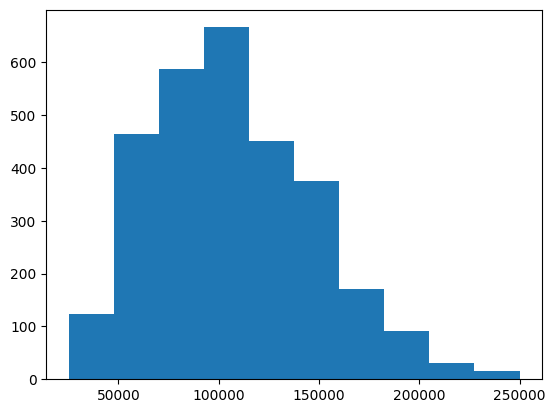

In [ ]:
plt.hist(salary_Analyst)
plt.show()

In [ ]:
median_Analyst = np.median(salary_Analyst)
median_Analyst

100500.0

In [ ]:
mad_Analyst = stats.median_abs_deviation(salary_Analyst)[0]
mad_Analyst

26802.5

In [ ]:
high_Analyst = median_Analyst + z_alpha*mad_Analyst
high_Analyst

180907.5

In [ ]:
low_Analyst = median_Analyst - z_alpha*mad_Analyst
low_Analyst

20092.5

In [ ]:
salary_Engineer.size

6089

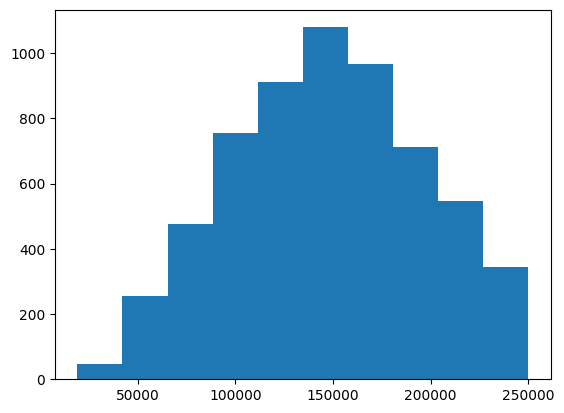

In [ ]:
plt.hist(salary_Engineer)
plt.show()

In [ ]:
median_Engineer = np.median(salary_Engineer)
median_Engineer

146000.0

In [ ]:
mad_Engineer = stats.median_abs_deviation(salary_Engineer)[0]
mad_Engineer

36000.0

In [ ]:
high_Engineer = median_Engineer + z_alpha*mad_Engineer
high_Engineer

254000.0

In [ ]:
low_Engineer = median_Engineer - z_alpha*mad_Engineer
low_Engineer

38000.0

In [ ]:
salary_Scientist.size

4239

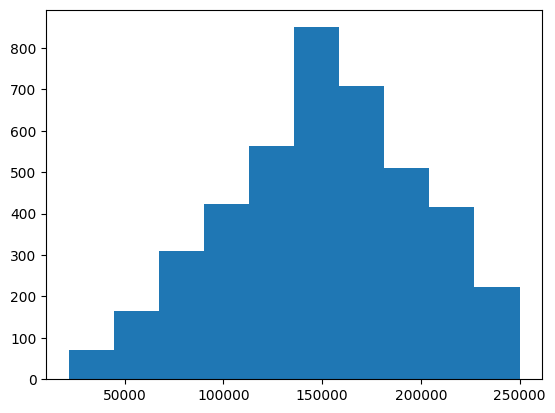

In [ ]:
plt.hist(salary_Scientist)
plt.show()

In [ ]:
median_Scientist = np.median(salary_Scientist)
median_Scientist

150000.0

In [ ]:
mad_Scientist = stats.median_abs_deviation(salary_Scientist)[0]
mad_Scientist

34200.0

In [ ]:
high_Scientist = median_Scientist + z_alpha*mad_Scientist
high_Scientist

252600.0

In [ ]:
low_Scientist = median_Scientist - z_alpha*mad_Scientist
low_Scientist

47400.0

In [ ]:
salary_Other.size

1678

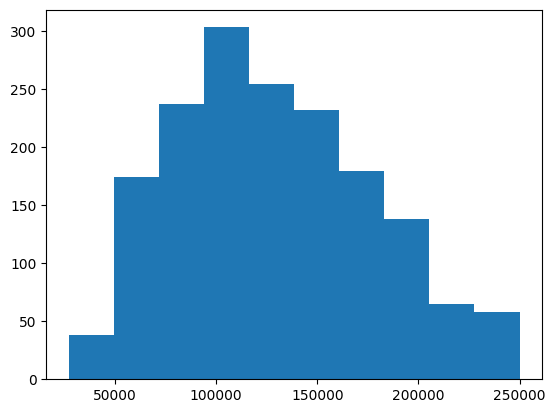

In [ ]:
plt.hist(salary_Other)
plt.show()

In [ ]:
median_Other = np.median(salary_Other)
median_Other

123000.0

In [ ]:
mad_Other = stats.median_abs_deviation(salary_Other)[0]
mad_Other

36310.0

In [ ]:
high_Other = median_Other + z_alpha*mad_Other
high_Other

231930.0

In [ ]:
low_Other = median_Other - z_alpha*mad_Other
low_Other

14070.0

In [ ]:
df_hypo = df_hypo[((df_hypo.job_title_recode == 'Analyst') & (df_hypo.salary_in_usd <= high_Analyst) & (df_hypo.salary_in_usd >= low_Analyst)) |
                  ((df_hypo.job_title_recode == 'Engineer') & (df_hypo.salary_in_usd <= high_Engineer) & (df_hypo.salary_in_usd >= low_Engineer)) |
                  ((df_hypo.job_title_recode == 'Scientist') & (df_hypo.salary_in_usd <= high_Scientist) & (df_hypo.salary_in_usd >= low_Scientist)) |
                  ((df_hypo.job_title_recode != 'FT') & (df_hypo.job_title_recode != 'Engineer') & (df_hypo.job_title_recode != 'Scientist') & (df_hypo.salary_in_usd <= high_Other) & (df_hypo.salary_in_usd >= low_Other))]

In [ ]:
df_clean = df_clean[((df_clean.job_title_recode == 'Analyst') & (df_clean.salary_in_usd <= high_Analyst) & (df_clean.salary_in_usd >= low_Analyst)) |
                    ((df_clean.job_title_recode == 'Engineer') & (df_clean.salary_in_usd <= high_Engineer) & (df_clean.salary_in_usd >= low_Engineer)) |
                    ((df_clean.job_title_recode == 'Scientist') & (df_clean.salary_in_usd <= high_Scientist) & (df_clean.salary_in_usd >= low_Scientist)) |
                    ((df_clean.job_title_recode != 'FT') & (df_clean.job_title_recode != 'Engineer') & (df_clean.job_title_recode != 'Scientist') & (df_clean.salary_in_usd <= high_Other) & (df_clean.salary_in_usd >= low_Other))]

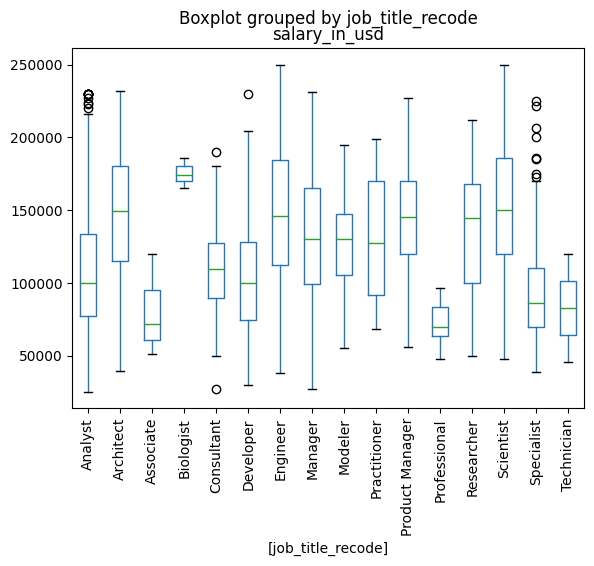

In [ ]:
df_hypo.boxplot(by='job_title_recode', grid = False)
plt.xticks(rotation=90)
plt.show()

### Oversampling

In [ ]:
# Create the oversampler
ros = RandomOverSampler(random_state=42)

# Fit the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(np.reshape(df_hypo.salary_in_usd, (-1,1)), np.array(df_hypo.job_title_recode))

In [ ]:
X_resampled = np.reshape(X_resampled, -1)

In [ ]:
X_resampled.size

96896

In [ ]:
y_resampled.size

96896

In [ ]:
df_hypo = pd.DataFrame({'job_title_recode': y_resampled, 'salary_in_usd': X_resampled})

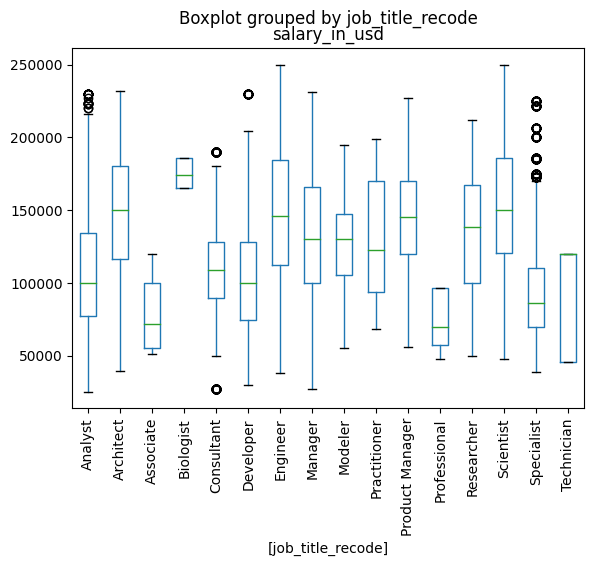

In [ ]:
df_hypo.boxplot(by='job_title_recode', grid = False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
salary_Analyst = np.array(df_hypo[df_hypo.job_title_recode == 'Analyst'].copy()[['salary_in_usd']])
salary_Engineer = np.array(df_hypo[df_hypo.job_title_recode == 'Engineer'].copy()[['salary_in_usd']])
salary_Scientist = np.array(df_hypo[df_hypo.job_title_recode == 'Scientist'].copy()[['salary_in_usd']])
salary_Other = np.array(df_hypo[(df_hypo.job_title_recode != 'Analyst') & (df_hypo.job_title_recode != 'Engineer') & (df_hypo.job_title_recode != 'Scientist')].copy()[['salary_in_usd']])

In [ ]:
salary_Analyst.size

6056

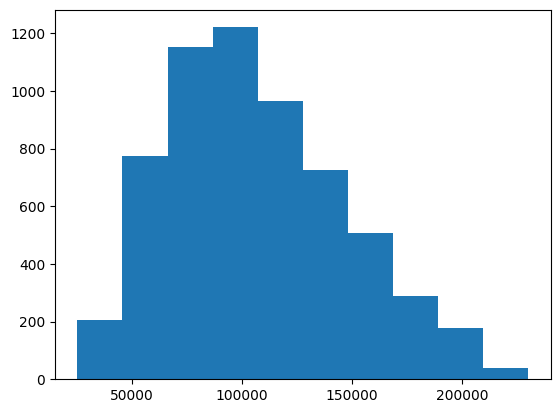

In [ ]:
plt.hist(salary_Analyst)
plt.show()

In [ ]:
salary_Engineer.size

6056

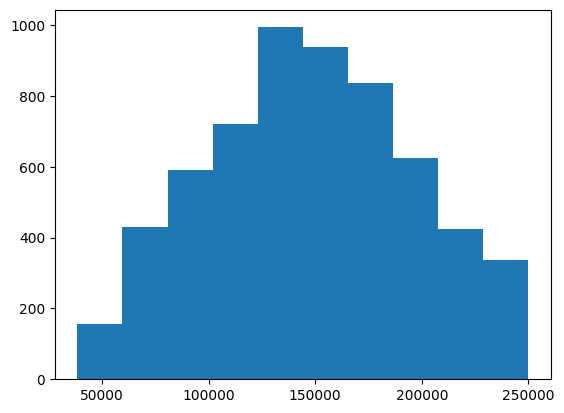

In [ ]:
plt.hist(salary_Engineer)
plt.show()

In [ ]:
salary_Scientist.size

6056

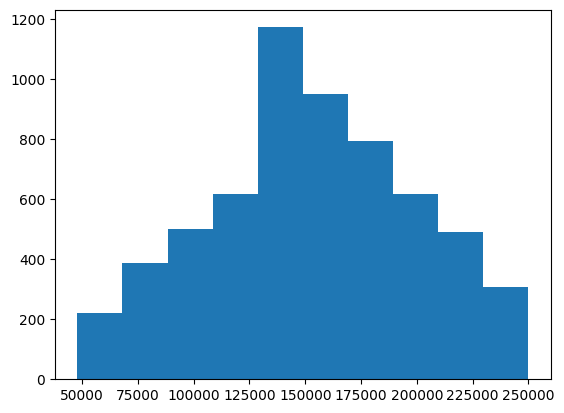

In [ ]:
plt.hist(salary_Scientist)
plt.show()

### Hypothesis testing

In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Analysts have salary no higher than engineers."
alternate_hypothesis = "Analyst have salary higher than engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_Analyst, salary_Engineer)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for analysts is lower than engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for analysts is higher than engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for analysts and engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-50.80185175]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for analysts is lower than engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Scientists have salary no higher than engineers."
alternate_hypothesis = "Scientists have salary higher than engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_Scientist, salary_Engineer)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for scientists is lower than engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for scientists is higher than engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for scientists and engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [4.93371481]
P-value: [8.28363369e-07]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for scientists is higher than engineers.


## Salary currency

### Exclude category outliers

In [ ]:
df_hypo = df_clean.copy()[['salary_currency', 'salary_in_usd']]

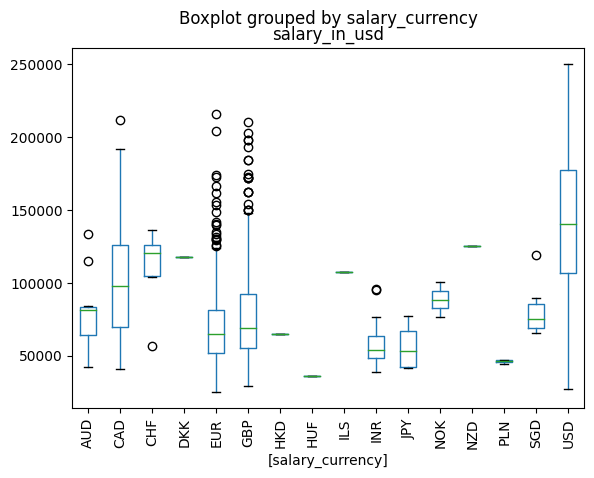

In [ ]:
df_hypo.boxplot(by='salary_currency', grid = False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
salary_USD = np.array(df_hypo[df_hypo.salary_currency == 'USD'].copy()[['salary_in_usd']])
salary_Other = np.array(df_hypo[df_hypo.salary_currency != 'USD'].copy()[['salary_in_usd']])

In [ ]:
salary_USD.size

13781

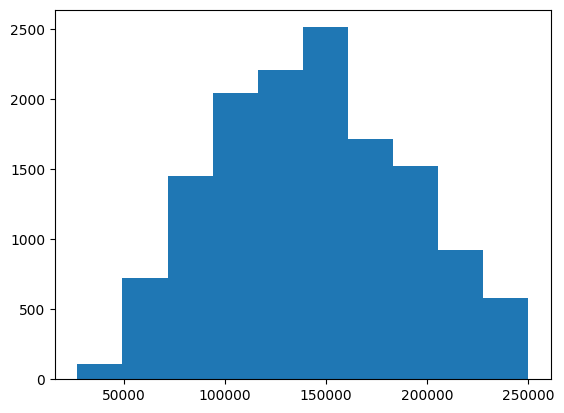

In [ ]:
plt.hist(salary_USD)
plt.show()

In [ ]:
median_USD = np.median(salary_USD)
median_USD

140000.0

In [ ]:
mad_USD = stats.median_abs_deviation(salary_USD)[0]
mad_USD

35000.0

In [ ]:
high_USD = median_USD + z_alpha*mad_USD
high_USD

245000.0

In [ ]:
low_USD = median_USD - z_alpha*mad_USD
low_USD

35000.0

In [ ]:
salary_Other.size

1022

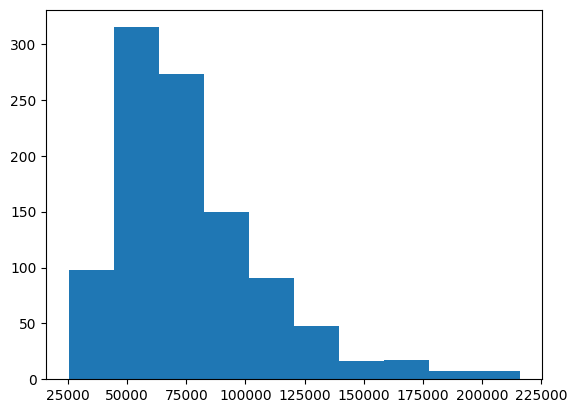

In [ ]:
plt.hist(salary_Other)
plt.show()

In [ ]:
median_Other = np.median(salary_Other)
median_Other

68750.0

In [ ]:
mad_Other = stats.median_abs_deviation(salary_Other)[0]
mad_Other

17443.0

In [ ]:
high_Other = median_Other + z_alpha*mad_Other
high_Other

121079.0

In [ ]:
low_Other = median_Other - z_alpha*mad_Other
low_Other

16421.0

In [ ]:
df_hypo = df_hypo[((df_hypo.salary_currency == 'USD') & (df_hypo.salary_in_usd <= high_USD) & (df_hypo.salary_in_usd >= low_USD)) |
                  ((df_hypo.salary_currency != 'USD') & (df_hypo.salary_in_usd <= high_Other) & (df_hypo.salary_in_usd >= low_Other))]

In [ ]:
df_clean = df_clean[((df_clean.salary_currency == 'USD') & (df_clean.salary_in_usd <= high_USD) & (df_clean.salary_in_usd >= low_USD)) |
                    ((df_clean.salary_currency != 'USD') & (df_clean.salary_in_usd <= high_Other) & (df_clean.salary_in_usd >= low_Other))]

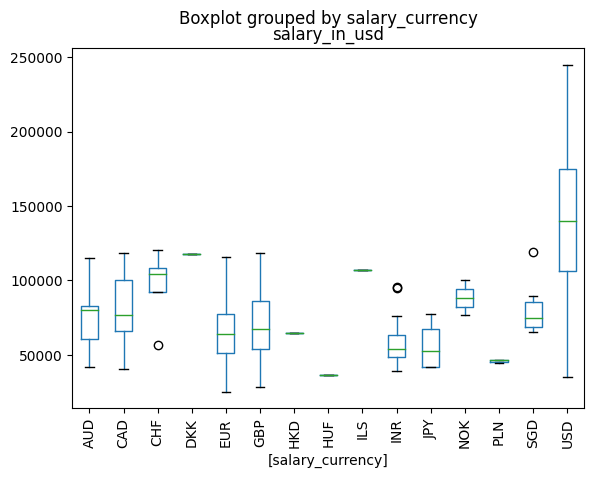

In [ ]:
df_hypo.boxplot(by='salary_currency', grid = False)
plt.xticks(rotation=90)
plt.show()

## Employee residence

### Exclude category outliers

In [ ]:
df_hypo = df_clean.copy()[['employee_residence', 'salary_in_usd']]

In [ ]:
salary_US = np.array(df_hypo[df_hypo.employee_residence == 'US'].copy()[['salary_in_usd']])
salary_Other = np.array(df_hypo[df_hypo.employee_residence != 'US'].copy()[['salary_in_usd']])

In [ ]:
salary_US.size

12903

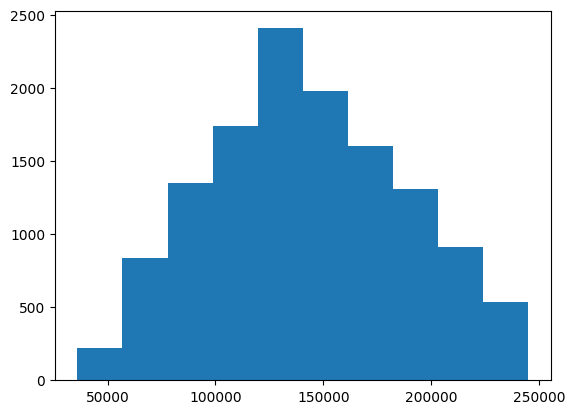

In [ ]:
plt.hist(salary_US)
plt.show()

In [ ]:
median_US = np.median(salary_US)
median_US

140000.0

In [ ]:
mad_US = stats.median_abs_deviation(salary_US)[0]
mad_US

34300.0

In [ ]:
high_US = median_US + z_alpha*mad_US
high_US

242900.0

In [ ]:
low_US = median_US - z_alpha*mad_US
low_US

37100.0

In [ ]:
salary_Other.size

1638

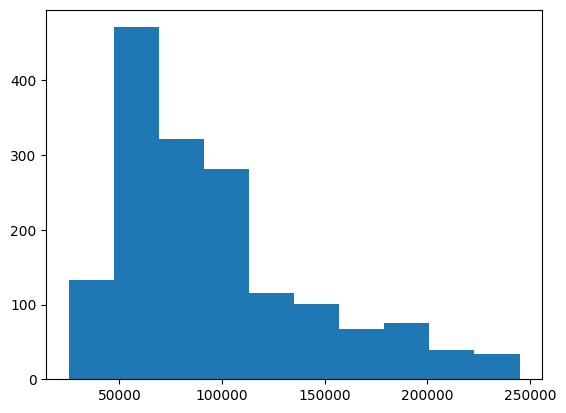

In [ ]:
plt.hist(salary_Other)
plt.show()

In [ ]:
median_Other = np.median(salary_Other)
median_Other

81819.0

In [ ]:
mad_Other = stats.median_abs_deviation(salary_Other)[0]
mad_Other

26451.0

In [ ]:
high_Other = median_Other + z_alpha*mad_Other
high_Other

161172.0

In [ ]:
low_Other = median_Other - z_alpha*mad_Other
low_Other

2466.0

In [ ]:
df_hypo = df_hypo[((df_hypo.employee_residence == 'US') & (df_hypo.salary_in_usd <= high_US) & (df_hypo.salary_in_usd >= low_US)) |
                  ((df_hypo.employee_residence != 'US') & (df_hypo.salary_in_usd <= high_Other) & (df_hypo.salary_in_usd >= low_Other))]

In [ ]:
df_clean = df_clean[((df_clean.employee_residence == 'US') & (df_clean.salary_in_usd <= high_US) & (df_clean.salary_in_usd >= low_US)) |
                    ((df_clean.employee_residence != 'US') & (df_clean.salary_in_usd <= high_Other) & (df_clean.salary_in_usd >= low_Other))]

## Remote ratio

### Exclude category outliers

In [ ]:
df_hypo = df_clean.copy()[['remote_ratio', 'salary_in_usd']]

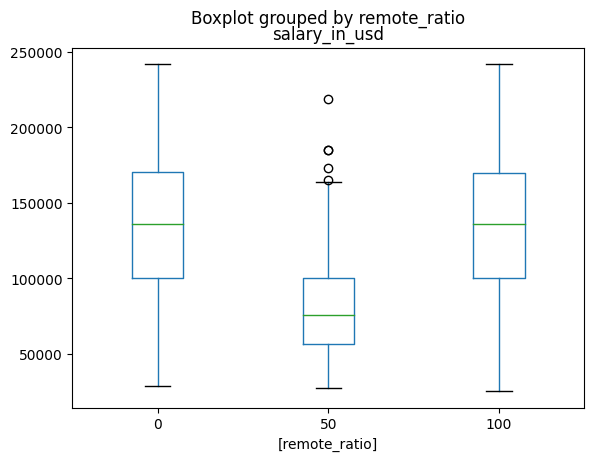

In [ ]:
df_hypo.boxplot(by='remote_ratio', grid = False)
plt.show()

In [ ]:
salary_0 = np.array(df_hypo[df_hypo.remote_ratio == 0].copy()[['salary_in_usd']])
salary_50 = np.array(df_hypo[df_hypo.remote_ratio == 50].copy()[['salary_in_usd']])
salary_100 = np.array(df_hypo[df_hypo.remote_ratio == 100].copy()[['salary_in_usd']])

In [ ]:
salary_0.size

9536

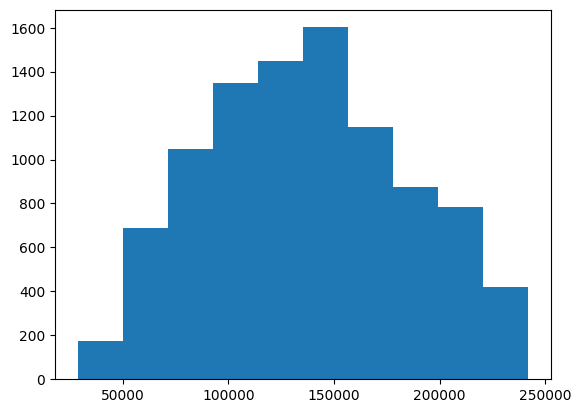

In [ ]:
plt.hist(salary_0)
plt.show()

In [ ]:
median_0 = np.median(salary_0)
median_0

136000.0

In [ ]:
mad_0 = stats.median_abs_deviation(salary_0)[0]
mad_0

36000.0

In [ ]:
high_0 = median_0 + z_alpha*mad_0
high_0

244000.0

In [ ]:
low_0 = median_0 - z_alpha*mad_0
low_0

28000.0

In [ ]:
salary_50.size

172

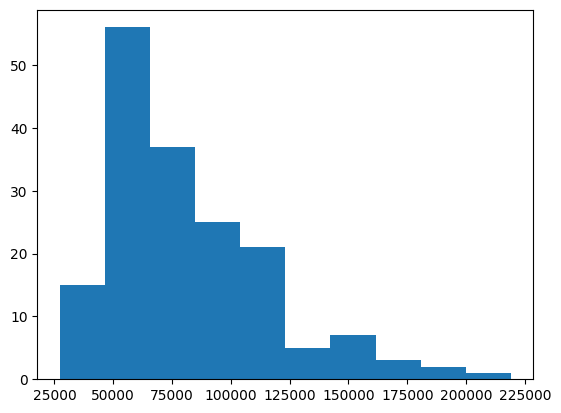

In [ ]:
plt.hist(salary_50)
plt.show()

In [ ]:
median_50 = np.median(salary_50)
median_50

75788.5

In [ ]:
mad_50 = stats.median_abs_deviation(salary_50)[0]
mad_50

21169.5

In [ ]:
high_50 = median_50 + z_alpha*mad_50
high_50

139297.0

In [ ]:
low_50 = median_50 - z_alpha*mad_50
low_50

12280.0

In [ ]:
salary_100.size

4586

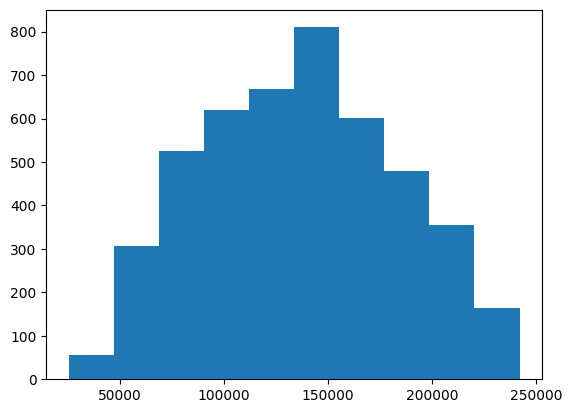

In [ ]:
plt.hist(salary_100)
plt.show()

In [ ]:
median_100 = np.median(salary_100)
median_100

136000.0

In [ ]:
mad_100 = stats.median_abs_deviation(salary_100)[0]
mad_100

36000.0

In [ ]:
high_100 = median_100 + z_alpha*mad_100
high_100

244000.0

In [ ]:
low_100 = median_100 - z_alpha*mad_100
low_100

28000.0

In [ ]:
df_hypo = df_hypo[((df_hypo.remote_ratio == 0) & (df_hypo.salary_in_usd <= high_0) & (df_hypo.salary_in_usd >= low_0)) |
                  ((df_hypo.remote_ratio == 50) & (df_hypo.salary_in_usd <= high_50) & (df_hypo.salary_in_usd >= low_50)) |
                  ((df_hypo.remote_ratio == 100) & (df_hypo.salary_in_usd <= high_100) & (df_hypo.salary_in_usd >= low_100))]

In [ ]:
df_clean = df_clean[((df_clean.remote_ratio == 0) & (df_clean.salary_in_usd <= high_0) & (df_clean.salary_in_usd >= low_0)) |
                    ((df_clean.remote_ratio == 50) & (df_clean.salary_in_usd <= high_50) & (df_clean.salary_in_usd >= low_50)) |
                    ((df_clean.remote_ratio == 100) & (df_clean.salary_in_usd <= high_100) & (df_clean.salary_in_usd >= low_100))]

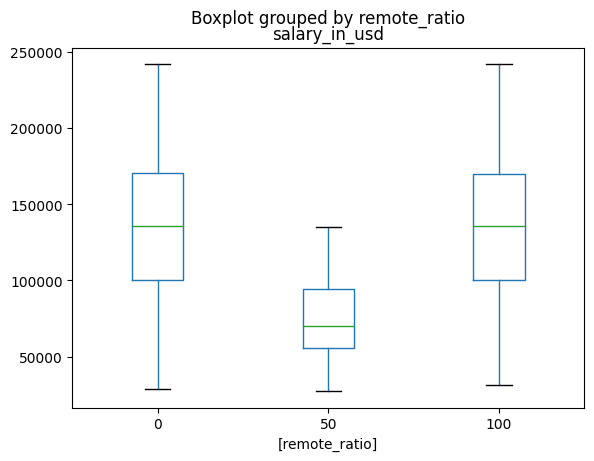

In [ ]:
df_hypo.boxplot(by='remote_ratio', grid = False)
plt.show()

### Oversampling

In [ ]:
# Create the oversampler
ros = RandomOverSampler(random_state=42)

# Fit the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(np.reshape(df_hypo.salary_in_usd, (-1,1)), np.array(df_hypo.remote_ratio))

In [ ]:
X_resampled = np.reshape(X_resampled, -1)

In [ ]:
X_resampled.size

28608

In [ ]:
y_resampled.size

28608

In [ ]:
df_hypo = pd.DataFrame({'remote_ratio': y_resampled, 'salary_in_usd': X_resampled})

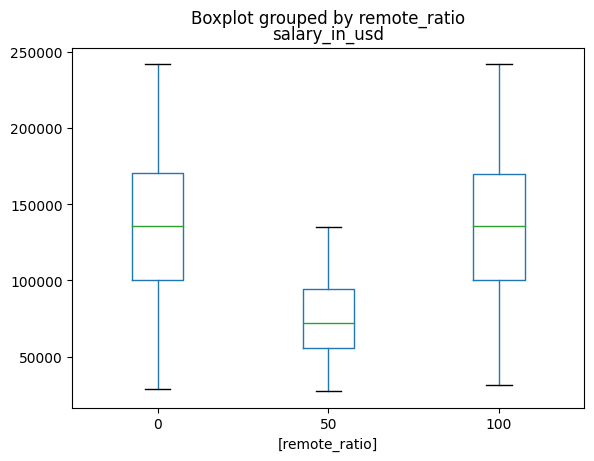

In [ ]:
df_hypo.boxplot(by='remote_ratio', grid = False)
plt.show()

In [ ]:
salary_0 = np.array(df_hypo[df_hypo.remote_ratio == 0].copy()[['salary_in_usd']])
salary_50 = np.array(df_hypo[df_hypo.remote_ratio == 50].copy()[['salary_in_usd']])
salary_100 = np.array(df_hypo[df_hypo.remote_ratio == 100].copy()[['salary_in_usd']])

In [ ]:
salary_0.size

9536

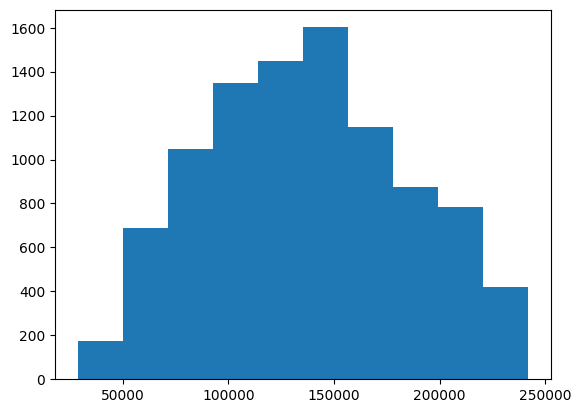

In [ ]:
plt.hist(salary_0)
plt.show()

In [ ]:
salary_50.size

9536

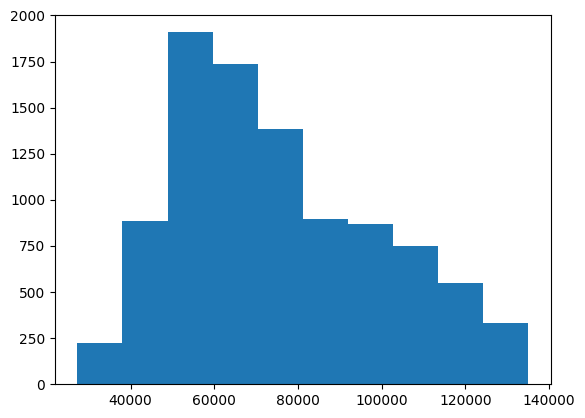

In [ ]:
plt.hist(salary_50)
plt.show()

In [ ]:
salary_100.size

9536

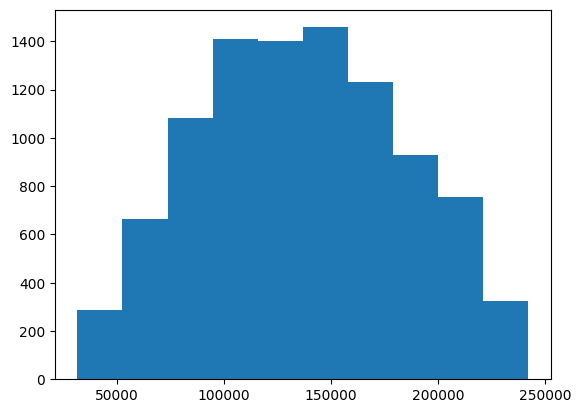

In [ ]:
plt.hist(salary_100)
plt.show()

### Hypothesis testing

In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "On-site data engineers have salary no higher than hybrid data engineers."
alternate_hypothesis = "On-site data engineers have salary higher than hybrid data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_0, salary_50)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for onsite is lower than hybrid data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for onsite is higher than hybrid data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for on-site and hybrid data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [110.95747329]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for onsite is higher than hybrid data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Remote data engineers have salary no higher than hybrid data engineers."
alternate_hypothesis = "Remote data engineers have salary higher than hybrid data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_100, salary_50)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for remote is lower than hybrid data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for remote is higher than hybrid data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for remote and hybrid data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [111.40971688]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for remote is higher than hybrid data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Onsite data engineers have salary no higher than remote data engineers."
alternate_hypothesis = "Onsite data engineers have salary higher than remote data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_100, salary_0)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for remote is lower than onsite data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for remote is higher than onsite data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for remote and onsite data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-0.49812668]
P-value: [0.61840624]
Decision: Fail to reject the null hypothesis at alpha = 0.05.
Conclusion: There is insufficient evidence to claim a significant difference in average salary for remote and onsite data engineers.


## Company location

### Exclude category outliers

In [ ]:
df_hypo = df_clean.copy()[['company_location', 'salary_in_usd']]

In [ ]:
salary_US = np.array(df_hypo[df_hypo.company_location == 'US'].copy()[['salary_in_usd']])
salary_Other = np.array(df_hypo[df_hypo.company_location != 'US'].copy()[['salary_in_usd']])

In [ ]:
salary_US.size

12874

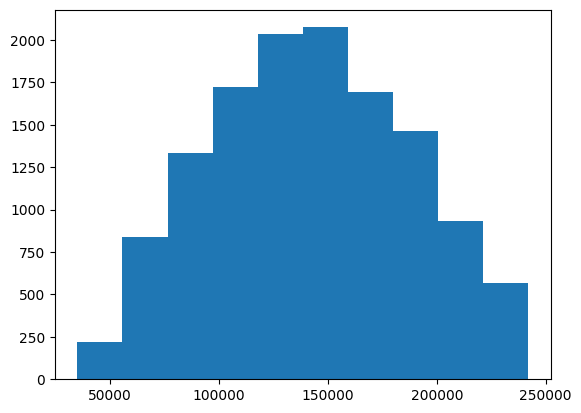

In [ ]:
plt.hist(salary_US)
plt.show()

In [ ]:
median_US = np.median(salary_US)
median_US

140000.0

In [ ]:
mad_US = stats.median_abs_deviation(salary_US)[0]
mad_US

34300.0

In [ ]:
high_US = median_US + z_alpha*mad_US
high_US

242900.0

In [ ]:
low_US = median_US - z_alpha*mad_US
low_US

37100.0

In [ ]:
salary_Other.size

1406

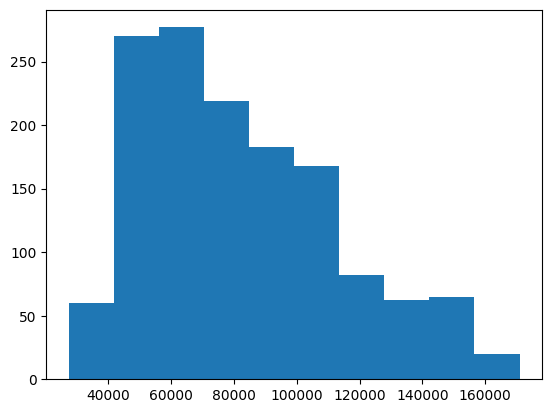

In [ ]:
plt.hist(salary_Other)
plt.show()

In [ ]:
median_Other = np.median(salary_Other)
median_Other

76296.5

In [ ]:
mad_Other = stats.median_abs_deviation(salary_Other)[0]
mad_Other

21911.5

In [ ]:
high_Other = median_Other + z_alpha*mad_Other
high_Other

142031.0

In [ ]:
low_Other = median_Other - z_alpha*mad_Other
low_Other

10562.0

In [ ]:
df_hypo = df_hypo[((df_hypo.company_location == 'US') & (df_hypo.salary_in_usd <= high_US) & (df_hypo.salary_in_usd >= low_US)) |
                  ((df_hypo.company_location != 'US') & (df_hypo.salary_in_usd <= high_Other) & (df_hypo.salary_in_usd >= low_Other))]

In [ ]:
df_clean = df_clean[((df_clean.company_location == 'US') & (df_clean.salary_in_usd <= high_US) & (df_clean.salary_in_usd >= low_US)) |
                    ((df_clean.company_location != 'US') & (df_clean.salary_in_usd <= high_Other) & (df_clean.salary_in_usd >= low_Other))]

## Company size

### Exclude category outliers

In [ ]:
df_hypo = df_clean.copy()[['company_size', 'salary_in_usd']]

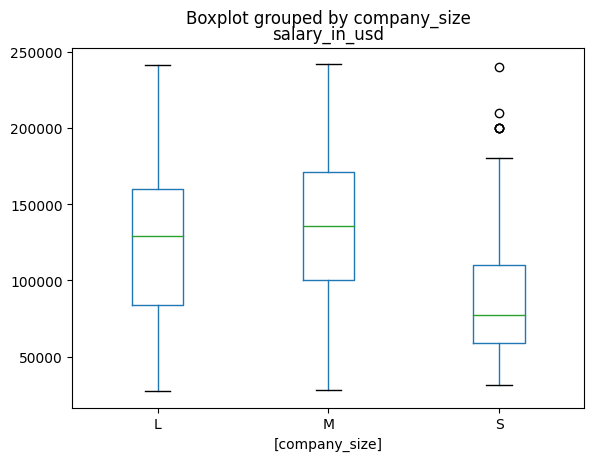

In [ ]:
df_hypo.boxplot(by='company_size', grid = False)
plt.show()

In [ ]:
salary_S = np.array(df_hypo[df_hypo.company_size == 'S'].copy()[['salary_in_usd']])
salary_M = np.array(df_hypo[df_hypo.company_size == 'M'].copy()[['salary_in_usd']])
salary_L = np.array(df_hypo[df_hypo.company_size == 'L'].copy()[['salary_in_usd']])

In [ ]:
salary_S.size

136

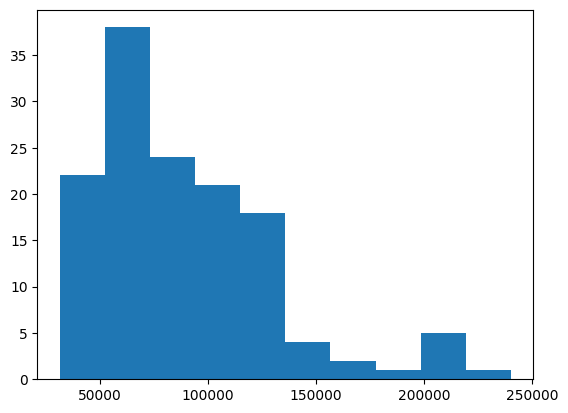

In [ ]:
plt.hist(salary_S)
plt.show()

In [ ]:
median_S = np.median(salary_S)
median_S

77570.5

In [ ]:
mad_S = stats.median_abs_deviation(salary_S)[0]
mad_S

23578.5

In [ ]:
high_S = median_S + z_alpha*mad_S
high_S

148306.0

In [ ]:
low_S = median_S - z_alpha*mad_S
low_S

6835.0

In [ ]:
salary_M.size

13283

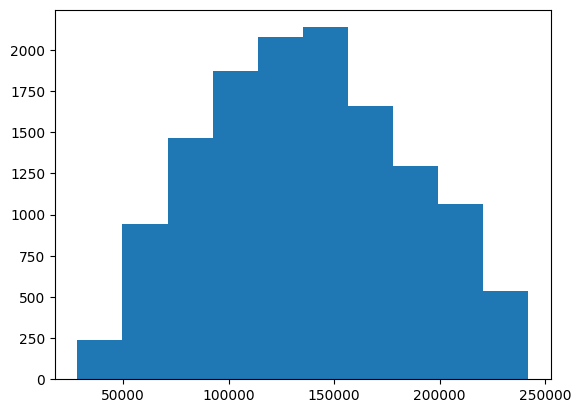

In [ ]:
plt.hist(salary_M)
plt.show()

In [ ]:
median_M = np.median(salary_M)
median_M

136000.0

In [ ]:
mad_M = stats.median_abs_deviation(salary_M)[0]
mad_M

36000.0

In [ ]:
high_M = median_M + z_alpha*mad_M
high_M

244000.0

In [ ]:
low_M = median_M - z_alpha*mad_M
low_M

28000.0

In [ ]:
salary_L.size

771

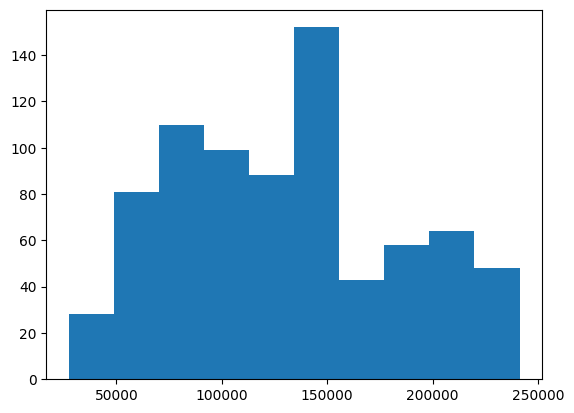

In [ ]:
plt.hist(salary_L)
plt.show()

In [ ]:
median_L = np.median(salary_L)
median_L

129000.0

In [ ]:
mad_L = stats.median_abs_deviation(salary_L)[0]
mad_L

39694.0

In [ ]:
high_L = median_L + z_alpha*mad_L
high_L

248082.0

In [ ]:
low_L = median_L - z_alpha*mad_L
low_L

9918.0

In [ ]:
df_hypo = df_hypo[((df_hypo.company_size == 'S') & (df_hypo.salary_in_usd <= high_S) & (df_hypo.salary_in_usd >= low_S)) |
                  ((df_hypo.company_size == 'M') & (df_hypo.salary_in_usd <= high_M) & (df_hypo.salary_in_usd >= low_M)) |
                  ((df_hypo.company_size == 'L') & (df_hypo.salary_in_usd <= high_L) & (df_hypo.salary_in_usd >= low_L))]

In [ ]:
df_clean = df_clean[((df_clean.company_size == 'S') & (df_clean.salary_in_usd <= high_S) & (df_clean.salary_in_usd >= low_S)) |
                    ((df_clean.company_size == 'M') & (df_clean.salary_in_usd <= high_M) & (df_clean.salary_in_usd >= low_M)) |
                    ((df_clean.company_size == 'L') & (df_clean.salary_in_usd <= high_L) & (df_clean.salary_in_usd >= low_L))]

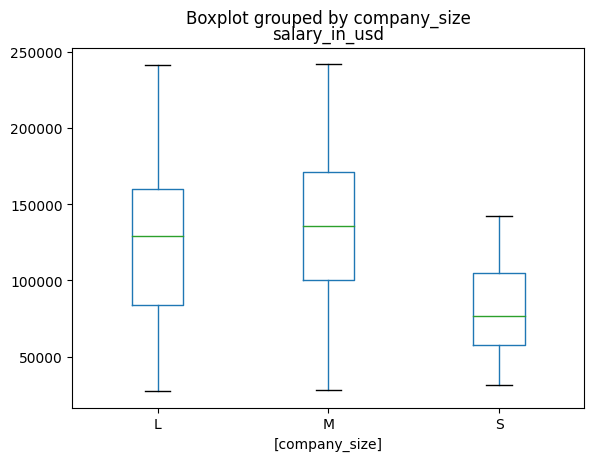

In [ ]:
df_hypo.boxplot(by='company_size', grid = False)
plt.show()

### Oversampling

In [ ]:
# Create the oversampler
ros = RandomOverSampler(random_state=42)

# Fit the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(np.reshape(df_hypo.salary_in_usd, (-1,1)), np.array(df_hypo.company_size))

In [ ]:
X_resampled = np.reshape(X_resampled, -1)

In [ ]:
X_resampled.size

39849

In [ ]:
y_resampled.size

39849

In [ ]:
df_hypo = pd.DataFrame({'company_size': y_resampled, 'salary_in_usd': X_resampled})

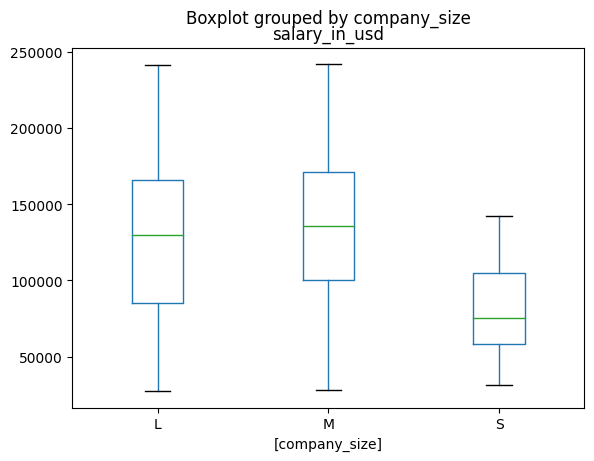

In [ ]:
df_hypo.boxplot(by='company_size', grid = False)
plt.show()

In [ ]:
salary_S = np.array(df_hypo[df_hypo.company_size == 'S'].copy()[['salary_in_usd']])
salary_M = np.array(df_hypo[df_hypo.company_size == 'M'].copy()[['salary_in_usd']])
salary_L = np.array(df_hypo[df_hypo.company_size == 'L'].copy()[['salary_in_usd']])

In [ ]:
salary_S.size

13283

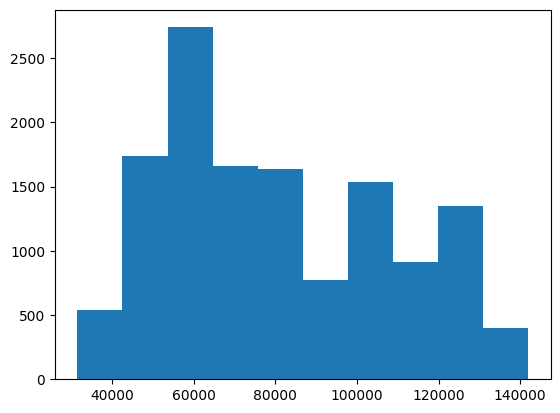

In [ ]:
plt.hist(salary_S)
plt.show()

In [ ]:
salary_M.size

13283

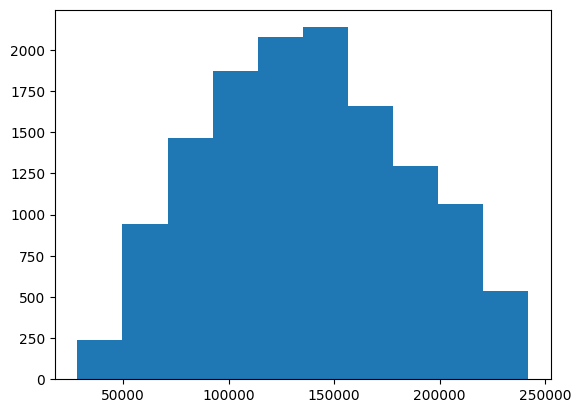

In [ ]:
plt.hist(salary_M)
plt.show()

In [ ]:
salary_L.size

13283

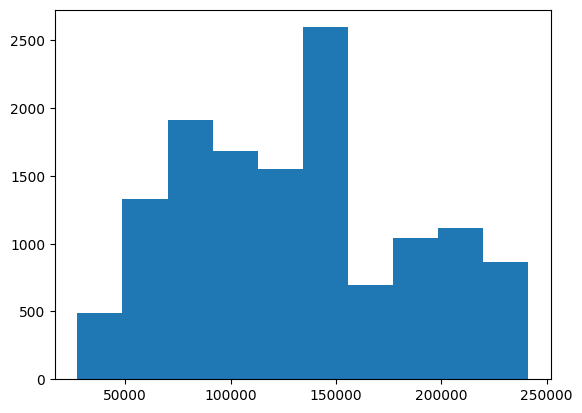

In [ ]:
plt.hist(salary_L)
plt.show()

### Hypothesis testing

In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Middle-sized company data engineers have salary no higher than small-sized company data engineers."
alternate_hypothesis = "Middle-sized company data engineers have salary higher than small-sized company data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_M, salary_S)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for middle-sized company is lower than small-sized company data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for middle-sized company is higher than small-sized company data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for middle and small-sized company data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [118.69497935]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for middle-sized company is higher than small-sized company data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Large-sized company data engineers have salary no higher than middle-sized company data engineers."
alternate_hypothesis = "Large-sized company data engineers have salary higher than middle-sized company data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_L, salary_M)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for large-sized company is lower than middle-sized company data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for large-sized company is higher than middle-sized company data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for large and middle-sized company data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [-12.15015699]
P-value: [8.65071351e-34]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for large-sized company is lower than middle-sized company data engineers.


In [ ]:
# Step 1: Null and Alternate Hypotheses
null_hypothesis = "Large-sized company data engineers have salary no higher than small-sized company data engineers."
alternate_hypothesis = "Large-sized company data engineers have salary higher than small-sized company data engineers."

# Step 2: Significance Level
alpha = 0.05

# Step 3: Paired T-test
t_statistic, p_value = stats.ttest_rel(salary_L, salary_S)

# Step 4: Decision
if p_value <= alpha:
	decision = "Reject"
else:
	decision = "Fail to reject"

# Conclusion
if decision == "Reject":
	if t_statistic<0:
		conclusion = "There is statistically significant evidence that the average salary for large-sized company is lower than small-sized company data engineers."
	else:
		conclusion = "There is statistically significant evidence that the average salary for large-sized company is higher than small-sized company data engineers."
else:
	conclusion = "There is insufficient evidence to claim a significant difference in average salary for large and small-sized company data engineers."

# Display results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print(f"Decision: {decision} the null hypothesis at alpha = {alpha}.")
print("Conclusion:", conclusion)

T-statistic: [96.02179104]
P-value: [0.]
Decision: Reject the null hypothesis at alpha = 0.05.
Conclusion: There is statistically significant evidence that the average salary for large-sized company is higher than small-sized company data engineers.


# Recode variables

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14181 entries, 0 to 16532
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14181 non-null  int64 
 1   experience_level    14181 non-null  object
 2   employment_type     14181 non-null  object
 3   job_title           14181 non-null  object
 4   job_title_recode    14181 non-null  object
 5   salary              14181 non-null  int64 
 6   salary_currency     14181 non-null  object
 7   salary_in_usd       14181 non-null  int64 
 8   employee_residence  14181 non-null  object
 9   remote_ratio        14181 non-null  int64 
 10  company_location    14181 non-null  object
 11  company_size        14181 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.4+ MB


##Work year

In [ ]:
work_year_dummy = pd.get_dummies(df_clean.work_year)

In [ ]:
work_year_dummy = work_year_dummy.set_axis(['work_year_2020', 'work_year_2021', 'work_year_2022', 'work_year_2023', 'work_year_2024'], axis=1)

In [ ]:
df_clean = pd.concat([df_clean, work_year_dummy], axis=1)

##Experience level

In [ ]:
df_clean.experience_level.value_counts()

experience_level
SE    9097
MI    3613
EN    1115
EX     356
Name: count, dtype: int64

In [ ]:
df_clean['experience_level_recode'] = np.where(df_clean.experience_level == 'EN', 0,
                                      np.where(df_clean.experience_level == 'MI', 1,
                                      np.where(df_clean.experience_level == 'SE', 2, 3)))

In [ ]:
df_clean.experience_level_recode.value_counts()

experience_level_recode
2    9097
1    3613
0    1115
3     356
Name: count, dtype: int64

##Employment type

In [ ]:
df_clean['employment_type_FT'] = np.where(df_clean.employment_type == 'FT', True, False)

In [ ]:
df_clean.employment_type_FT.value_counts()

employment_type_FT
True     14131
False       50
Name: count, dtype: int64

##Job title

###Analyst

In [ ]:
df_clean['job_title_Analyst'] = np.where(df_clean.job_title_recode == 'Analyst', True, False)

In [ ]:
df_clean.job_title_Analyst.value_counts()

job_title_Analyst
False    11254
True      2927
Name: count, dtype: int64

###Engineer

In [ ]:
df_clean['job_title_Engineer'] = np.where(df_clean.job_title_recode == 'Engineer', True, False)

In [ ]:
df_clean.job_title_Engineer.value_counts()

job_title_Engineer
False    8435
True     5746
Name: count, dtype: int64

###Scientist

In [ ]:
df_clean['job_title_Scientist'] = np.where(df_clean.job_title_recode == 'Scientist', True, False)

In [ ]:
df_clean.job_title_Scientist.value_counts()

job_title_Scientist
False    10249
True      3932
Name: count, dtype: int64

##Salary currency

In [ ]:
df_clean['salary_currency_USD'] = np.where(df_clean.salary_currency == 'USD', True, False)

In [ ]:
df_clean.salary_currency_USD.value_counts()

salary_currency_USD
True     13256
False      925
Name: count, dtype: int64

##Employee residence

In [ ]:
df_clean['employee_residence_US'] = np.where(df_clean.employee_residence == 'US', True, False)

In [ ]:
df_clean.employee_residence_US.value_counts()

employee_residence_US
True     12830
False     1351
Name: count, dtype: int64

##Remote ratio

In [ ]:
remote_ratio_dummy = pd.get_dummies(df_clean.remote_ratio)

In [ ]:
remote_ratio_dummy = remote_ratio_dummy.set_axis(['remote_ratio_0', 'remote_ratio_50', 'remote_ratio_100'], axis=1)

In [ ]:
df_clean = pd.concat([df_clean, remote_ratio_dummy], axis=1)

##Company location

In [ ]:
df_clean['company_location_US'] = np.where(df_clean.company_location == 'US', True, False)

In [ ]:
df_clean.company_location_US.value_counts()

company_location_US
True     12863
False     1318
Name: count, dtype: int64

##Company size

In [ ]:
company_size_dummy = pd.get_dummies(df_clean.company_size)

In [ ]:
company_size_dummy = company_size_dummy.set_axis(['company_size_L', 'company_size_M', 'company_size_S'], axis=1)

In [ ]:
df_clean = pd.concat([df_clean, company_size_dummy], axis=1)

##Drop original columns

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14181 entries, 0 to 16532
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   work_year                14181 non-null  int64 
 1   experience_level         14181 non-null  object
 2   employment_type          14181 non-null  object
 3   job_title                14181 non-null  object
 4   job_title_recode         14181 non-null  object
 5   salary                   14181 non-null  int64 
 6   salary_currency          14181 non-null  object
 7   salary_in_usd            14181 non-null  int64 
 8   employee_residence       14181 non-null  object
 9   remote_ratio             14181 non-null  int64 
 10  company_location         14181 non-null  object
 11  company_size             14181 non-null  object
 12  work_year_2020           14181 non-null  bool  
 13  work_year_2021           14181 non-null  bool  
 14  work_year_2022           14181 non-null  bo

In [ ]:
df_mod = df_clean.copy()

In [ ]:
df_mod.drop(columns=['work_year', 'experience_level', 'employment_type', 'job_title', 'job_title_recode', 'salary', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size'], inplace = True)

In [ ]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14181 entries, 0 to 16532
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   salary_in_usd            14181 non-null  int64
 1   work_year_2020           14181 non-null  bool 
 2   work_year_2021           14181 non-null  bool 
 3   work_year_2022           14181 non-null  bool 
 4   work_year_2023           14181 non-null  bool 
 5   work_year_2024           14181 non-null  bool 
 6   experience_level_recode  14181 non-null  int64
 7   employment_type_FT       14181 non-null  bool 
 8   job_title_Analyst        14181 non-null  bool 
 9   job_title_Engineer       14181 non-null  bool 
 10  job_title_Scientist      14181 non-null  bool 
 11  salary_currency_USD      14181 non-null  bool 
 12  employee_residence_US    14181 non-null  bool 
 13  remote_ratio_0           14181 non-null  bool 
 14  remote_ratio_50          14181 non-null  bool 
 15  remote_

In [ ]:
df_mod = df_mod.astype(int)

In [ ]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14181 entries, 0 to 16532
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   salary_in_usd            14181 non-null  int64
 1   work_year_2020           14181 non-null  int64
 2   work_year_2021           14181 non-null  int64
 3   work_year_2022           14181 non-null  int64
 4   work_year_2023           14181 non-null  int64
 5   work_year_2024           14181 non-null  int64
 6   experience_level_recode  14181 non-null  int64
 7   employment_type_FT       14181 non-null  int64
 8   job_title_Analyst        14181 non-null  int64
 9   job_title_Engineer       14181 non-null  int64
 10  job_title_Scientist      14181 non-null  int64
 11  salary_currency_USD      14181 non-null  int64
 12  employee_residence_US    14181 non-null  int64
 13  remote_ratio_0           14181 non-null  int64
 14  remote_ratio_50          14181 non-null  int64
 15  remote_

In [ ]:
import seaborn as sns

In [ ]:
df_mod.corr()

salary_in_usd  work_year_2020  work_year_2021  \
salary_in_usd                 1.000000       -0.062293       -0.091659   
work_year_2020               -0.062293        1.000000       -0.006006   
work_year_2021               -0.091659       -0.006006        1.000000   
work_year_2022               -0.029127       -0.020009       -0.034658   
work_year_2023                0.082012       -0.060787       -0.105290   
work_year_2024               -0.039848       -0.044820       -0.077632   
experience_level_recode       0.421970       -0.057740       -0.067579   
employment_type_FT            0.063477       -0.077593       -0.052861   
job_title_Analyst            -0.315269        0.002631       -0.007137   
job_title_Engineer            0.157245       -0.002091       -0.013031   
job_title_Scientist           0.170445       -0.001574        0.005490   
salary_currency_USD           0.367561       -0.101245       -0.154120   
employee_residence_US         0.394729       -0.107782       -0.159642   
remote_ratio_0                0.022443       -0.055586       -0.121181   
remote_ratio_50              -0.134673        0.142583        0.321945   
remote_ratio_100              0.007659        0.023999        0.049819   
company_location_US           0.390122       -0.092900       -0.147802   
company_size_L               -0.035903        0.118378        0.222019   
company_size_M                0.075929       -0.182059       -0.289004   
company_size_S               -0.109875        0.185738        0.212760   

                         work_year_2022  work_year_2023  work_year_2024  \
salary_in_usd                 -0.029127        0.082012       -0.039848   
work_year_2020                -0.020009       -0.060787       -0.044820   
work_year_2021                -0.034658       -0.105290       -0.077632   
work_year_2022                 1.000000       -0.350797       -0.258649   
work_year_2023                -0.350797        1.000000       -0.785756   
work_year_2024                -0.258649       -0.785756        1.000000   
experience_level_recode        0.035063        0.140452       -0.146620   
employment_type_FT            -0.018839        0.039982       -0.009031   
job_title_Analyst             -0.010867       -0.024072        0.033005   
job_title_Engineer             0.021303        0.039846       -0.051800   
job_title_Scientist            0.000499       -0.007100        0.006089   
salary_currency_USD           -0.076162        0.054978        0.035741   
employee_residence_US         -0.071076        0.053341        0.036176   
remote_ratio_0                -0.169077        0.005753        0.133058   
remote_ratio_50                0.049937       -0.051773       -0.062672   
remote_ratio_100               0.159344        0.005845       -0.120139   
company_location_US           -0.066619        0.051494        0.030982   
company_size_L                 0.083904       -0.019765       -0.093457   
company_size_M                -0.097935        0.033766        0.109591   
company_size_S                 0.051238       -0.039720       -0.058378   

                         experience_level_recode  employment_type_FT  \
salary_in_usd                           0.421970            0.063477   
work_year_2020                         -0.057740           -0.077593   
work_year_2021                         -0.067579           -0.052861   
work_year_2022                          0.035063           -0.018839   
work_year_2023                          0.140452            0.039982   
work_year_2024                         -0.146620           -0.009031   
experience_level_recode                 1.000000            0.079664   
employment_type_FT                      0.079664            1.000000   
job_title_Analyst                      -0.242333           -0.004938   
job_title_Engineer                      0.124348            0.015169   
job_title_Scientist                     0.065528           -0.013650   
salary_currency_USD           

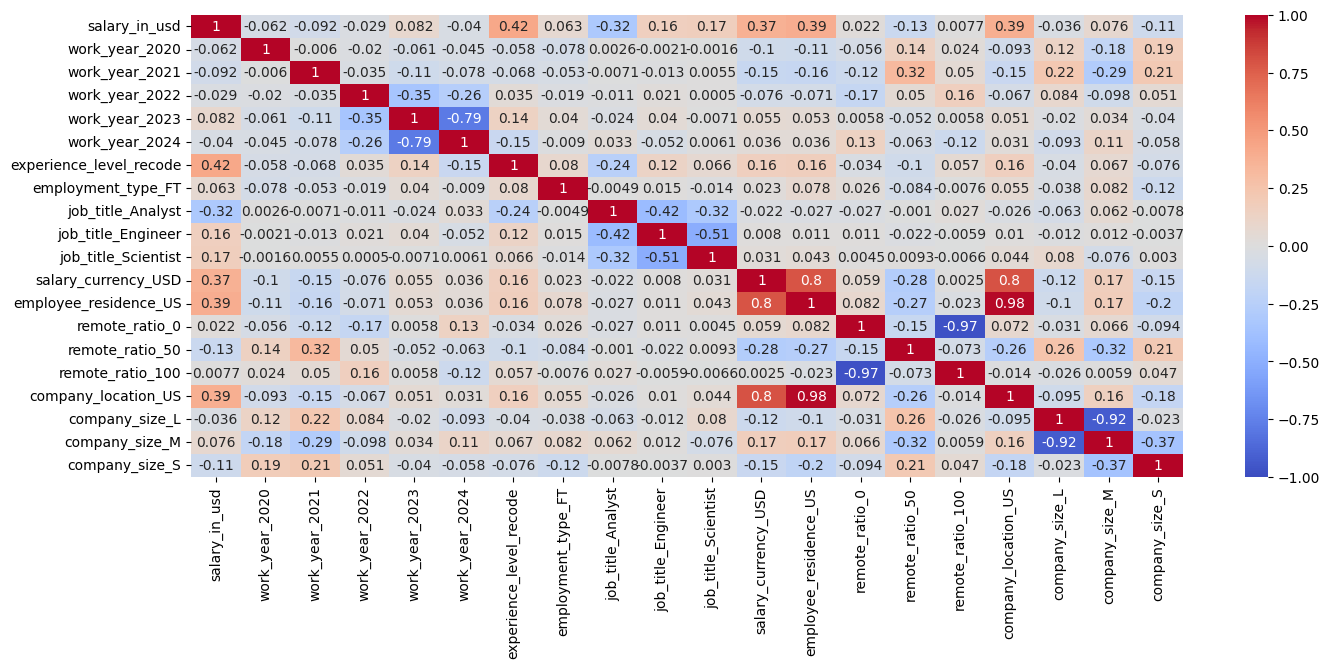

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_mod.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm')
plt.show()

## Drop redundant columns

In [ ]:
df_mod.drop(columns=['work_year_2024', 'remote_ratio_100', 'salary_currency_USD', 'employee_residence_US', 'company_size_L'], inplace = True)

In [ ]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14181 entries, 0 to 16532
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   salary_in_usd            14181 non-null  int64
 1   work_year_2020           14181 non-null  int64
 2   work_year_2021           14181 non-null  int64
 3   work_year_2022           14181 non-null  int64
 4   work_year_2023           14181 non-null  int64
 5   experience_level_recode  14181 non-null  int64
 6   employment_type_FT       14181 non-null  int64
 7   job_title_Analyst        14181 non-null  int64
 8   job_title_Engineer       14181 non-null  int64
 9   job_title_Scientist      14181 non-null  int64
 10  remote_ratio_0           14181 non-null  int64
 11  remote_ratio_50          14181 non-null  int64
 12  company_location_US      14181 non-null  int64
 13  company_size_M           14181 non-null  int64
 14  company_size_S           14181 non-null  int64
dtypes: int6

In [ ]:
df_mod.corr()

salary_in_usd  work_year_2020  work_year_2021  \
salary_in_usd                 1.000000       -0.062293       -0.091659   
work_year_2020               -0.062293        1.000000       -0.006006   
work_year_2021               -0.091659       -0.006006        1.000000   
work_year_2022               -0.029127       -0.020009       -0.034658   
work_year_2023                0.082012       -0.060787       -0.105290   
experience_level_recode       0.421970       -0.057740       -0.067579   
employment_type_FT            0.063477       -0.077593       -0.052861   
job_title_Analyst            -0.315269        0.002631       -0.007137   
job_title_Engineer            0.157245       -0.002091       -0.013031   
job_title_Scientist           0.170445       -0.001574        0.005490   
remote_ratio_0                0.022443       -0.055586       -0.121181   
remote_ratio_50              -0.134673        0.142583        0.321945   
company_location_US           0.390122       -0.092900       -0.147802   
company_size_M                0.075929       -0.182059       -0.289004   
company_size_S               -0.109875        0.185738        0.212760   

                         work_year_2022  work_year_2023  \
salary_in_usd                 -0.029127        0.082012   
work_year_2020                -0.020009       -0.060787   
work_year_2021                -0.034658       -0.105290   
work_year_2022                 1.000000       -0.350797   
work_year_2023                -0.350797        1.000000   
experience_level_recode        0.035063        0.140452   
employment_type_FT            -0.018839        0.039982   
job_title_Analyst             -0.010867       -0.024072   
job_title_Engineer             0.021303        0.039846   
job_title_Scientist            0.000499       -0.007100   
remote_ratio_0                -0.169077        0.005753   
remote_ratio_50                0.049937       -0.051773   
company_location_US           -0.066619        0.051494   
company_size_M                -0.097935        0.033766   
company_size_S                 0.051238       -0.039720   

                         experience_level_recode  employment_type_FT  \
salary_in_usd                           0.421970            0.063477   
work_year_2020                         -0.057740           -0.077593   
work_year_2021                         -0.067579           -0.052861   
work_year_2022                          0.035063           -0.018839   
work_year_2023                          0.140452            0.039982   
experience_level_recode                 1.000000            0.079664   
employment_type_FT                      0.079664            1.000000   
job_title_Analyst                      -0.242333           -0.004938   
job_title_Engineer                      0.124348            0.015169   
job_title_Scientist                     0.065528           -0.013650   
remote_ratio_0                         -0.034465            0.026387   
remote_ratio_50                        -0.099604           -0.084359   
company_location_US                     0.160627            0.054712   
company_size_M                          0.066668            0.082230   
company_size_S                         -0.076172           -0.120625   

                         job_title_Analyst  job_title_Engineer  \
salary_in_usd                    -0.315269            0.157245   
work_year_2020                    0.002631           -0.002091   
work_year_2021                   -0.007137           -0.013031   
work_year_2022                   -0.010867            0.021303   
work_year_2023                   -0.024072            0.039846   
experience_level_recode          -0.242333            0.124348   
employment_type_FT               -0.004938            0.015169   
job_title_Analyst                 1.000000           -0.420919   
job_title_Engineer               -0.420919            1.000000   
job_title_Scientist              -0.315881           -0.511218   
remote_ratio_0  

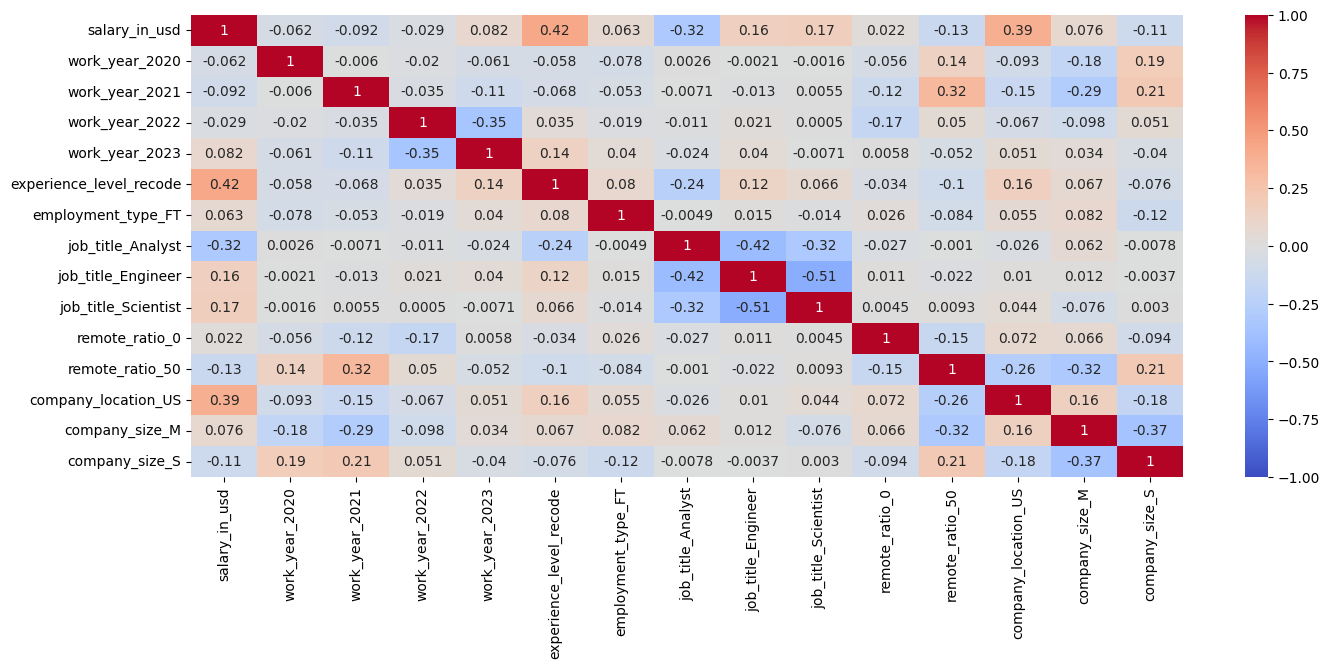

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_mod.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm')
plt.show()

#Build models

## Split train-val-test data

In [ ]:
X = df_mod.copy()

In [ ]:
X.drop(columns=['salary_in_usd'], inplace = True)

In [ ]:
X_ = np.array(X)

In [ ]:
X_.shape

(14181, 14)

In [ ]:
y = df_mod.salary_in_usd.copy()

In [ ]:
y = np.array(y)

In [ ]:
y.shape

(14181,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_t, X_test, y_t, y_test = train_test_split(X_, y, test_size=0.1, random_state=42)

In [ ]:
X_t.shape

(12762, 14)

In [ ]:
y_t.shape

(12762,)

In [ ]:
X_test.shape

(1419, 14)

In [ ]:
y_test.shape

(1419,)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.1111, random_state=42)

In [ ]:
X_train.shape

(11344, 14)

In [ ]:
y_train.shape

(11344,)

In [ ]:
X_val.shape

(1418, 14)

In [ ]:
y_val.shape

(1418,)

## Linear Regression

### Train

In [ ]:
from sklearn import linear_model

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_train, y_train)

0.35765043082575343

In [ ]:
model.score(X_val, y_val)

0.3245905046689096

In [ ]:
model.intercept_

25011.34997723352

In [ ]:
model.coef_

array([-6.00536554e+03, -6.68859743e+03, -3.24636366e+03,  7.26770537e+02,
        2.24137818e+04,  1.70571159e+04, -1.26932705e+04,  1.60496624e+04,
        2.01072613e+04,  1.94259783e+01, -1.63496816e+03,  5.20919193e+04,
        1.15895186e+03, -1.07007403e+04])

### Evaluation on train set

In [ ]:
y_pred = model.predict(X_train)

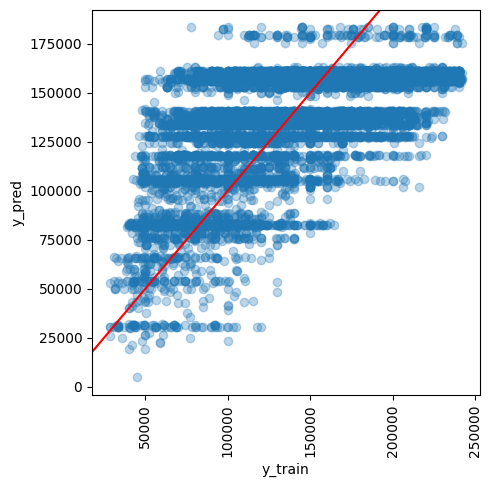

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_train, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_train')
plt.ylabel('y_pred')

plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
MAE = mean_absolute_error(y_train, y_pred)
MAE

31242.213789042515

In [ ]:
MSE = mean_squared_error(y_train, y_pred)
MSE

1462745417.9803867

In [ ]:
RMSE = MSE**(1/2)
RMSE

38245.854912400464

In [ ]:
R2 = r2_score(y_train, y_pred)
R2

0.35765043082575343

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adj_R2

0.3568566366719499

In [ ]:
train = ['train', MAE, MSE, RMSE, R2, Adj_R2]
train

['train',
 31242.213789042515,
 1462745417.9803867,
 38245.854912400464,
 0.35765043082575343,
 0.3568566366719499]

### Evaluation on validation set

In [ ]:
y_pred = model.predict(X_val)

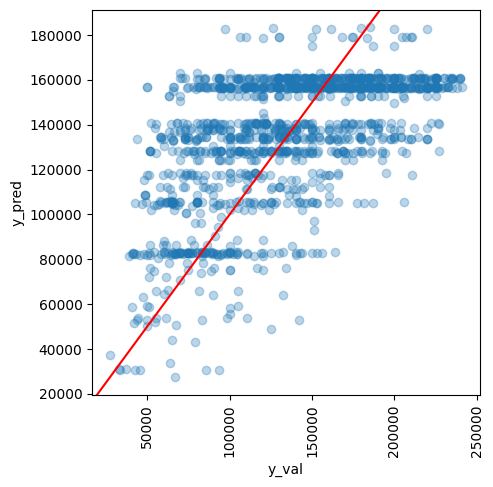

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_val, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_val')
plt.ylabel('y_pred')

plt.show()

In [ ]:
MAE = mean_absolute_error(y_true=y_val, y_pred=y_pred)
MAE

32547.334300512037

In [ ]:
MSE = mean_squared_error(y_true=y_val, y_pred=y_pred)
MSE

1573270700.5131435

In [ ]:
RMSE = MSE**(1/2)
RMSE

39664.47655665134

In [ ]:
R2 = r2_score(y_val, y_pred)
R2

0.3245905046689096

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)
Adj_R2

0.31785085182882744

In [ ]:
val = ['val', MAE, MSE, RMSE, R2, Adj_R2]
val

['val',
 32547.334300512037,
 1573270700.5131435,
 39664.47655665134,
 0.3245905046689096,
 0.31785085182882744]

### Evaluation on test set

In [ ]:
y_pred = model.predict(X_test)

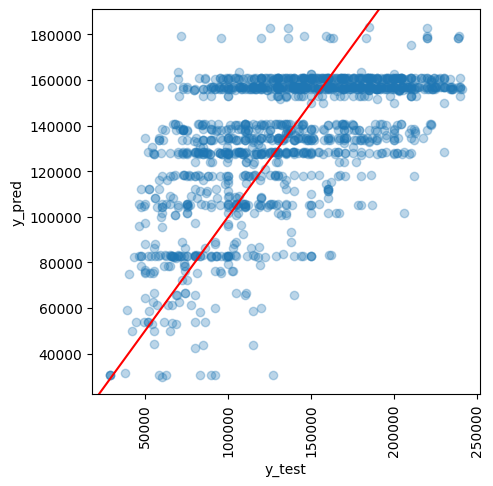

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_test, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.show()

In [ ]:
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)
MAE

31605.058086007855

In [ ]:
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
MSE

1489459333.7746615

In [ ]:
RMSE = MSE**(1/2)
RMSE

38593.5141412992

In [ ]:
R2 = r2_score(y_test, y_pred)
R2

0.3340744769831351

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.32743419399008944

In [ ]:
test = ['test', MAE, MSE, RMSE, R2, Adj_R2]
test

['test',
 31605.058086007855,
 1489459333.7746615,
 38593.5141412992,
 0.3340744769831351,
 0.32743419399008944]

In [ ]:
result = pd.DataFrame([train, val, test], columns=['set', 'MAE', 'MSE', 'RMSE', 'R2', 'Adj_R2'])
result.set_index('set', inplace=True)
result

MAE           MSE          RMSE        R2    Adj_R2
set                                                                
train  31242.213789  1.462745e+09  38245.854912  0.357650  0.356857
val    32547.334301  1.573271e+09  39664.476557  0.324591  0.317851
test   31605.058086  1.489459e+09  38593.514141  0.334074  0.327434

## Decision Tree

### Train

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
from sklearn.tree import plot_tree
from sklearn import tree

In [ ]:
text_representation = tree.export_text(model, feature_names=list(X.columns))
print(text_representation)

|--- experience_level_recode <= 1.50
|   |--- company_location_US <= 0.50
|   |   |--- job_title_Analyst <= 0.50
|   |   |   |--- experience_level_recode <= 0.50
|   |   |   |   |--- employment_type_FT <= 0.50
|   |   |   |   |   |--- company_size_S <= 0.50
|   |   |   |   |   |   |--- work_year_2022 <= 0.50
|   |   |   |   |   |   |   |--- value: [88888.00]
|   |   |   |   |   |   |--- work_year_2022 >  0.50
|   |   |   |   |   |   |   |--- job_title_Scientist <= 0.50
|   |   |   |   |   |   |   |   |--- value: [100000.00]
|   |   |   |   |   |   |   |--- job_title_Scientist >  0.50
|   |   |   |   |   |   |   |   |--- remote_ratio_50 <= 0.50
|   |   |   |   |   |   |   |   |   |--- value: [110000.00]
|   |   |   |   |   |   |   |   |--- remote_ratio_50 >  0.50
|   |   |   |   |   |   |   |   |   |--- value: [100000.00]
|   |   |   |   |   |--- company_size_S >  0.50
|   |   |   |   |   |   |--- value: [117647.00]
|   |   |   |   |--- employment_type_FT >  0.50
|   |   |   |   |   |--

### Evaluation on train set

In [ ]:
y_pred = model.predict(X_train)

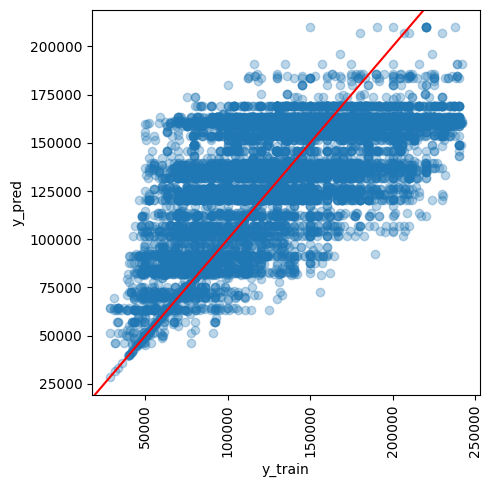

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_train, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_train')
plt.ylabel('y_pred')

plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
MAE = mean_absolute_error(y_train, y_pred)
MAE

29963.177945743537

In [ ]:
MSE = mean_squared_error(y_train, y_pred)
MSE

1380857536.084739

In [ ]:
RMSE = MSE**(1/2)
RMSE

37159.89149721429

In [ ]:
R2 = r2_score(y_train, y_pred)
R2

0.39361064988348016

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adj_R2

0.3928612941679156

In [ ]:
train = ['train', MAE, MSE, RMSE, R2, Adj_R2]
train

['train',
 29963.177945743537,
 1380857536.084739,
 37159.89149721429,
 0.39361064988348016,
 0.3928612941679156]

### Evaluation on validation set

In [ ]:
y_pred = model.predict(X_val)

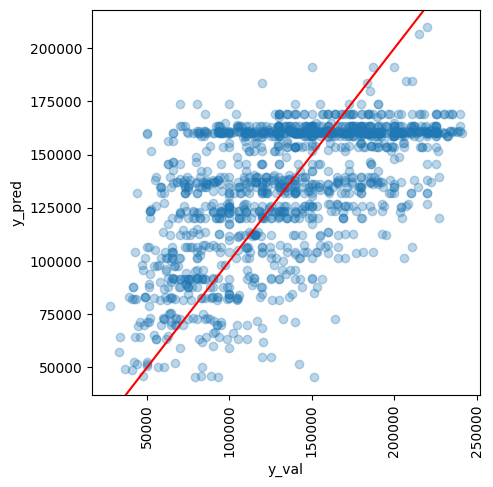

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_val, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_val')
plt.ylabel('y_pred')

plt.show()

In [ ]:
MAE = mean_absolute_error(y_true=y_val, y_pred=y_pred)
MAE

32253.804124652426

In [ ]:
MSE = mean_squared_error(y_true=y_val, y_pred=y_pred)
MSE

1558060169.3639214

In [ ]:
RMSE = MSE**(1/2)
RMSE

39472.27089190488

In [ ]:
R2 = r2_score(y_val, y_pred)
R2

0.3311204280723412

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)
Adj_R2

0.32444593483856554

In [ ]:
val = ['val', MAE, MSE, RMSE, R2, Adj_R2]
val

['val',
 32253.804124652426,
 1558060169.3639214,
 39472.27089190488,
 0.3311204280723412,
 0.32444593483856554]

### Evaluation on test set

In [ ]:
y_pred = model.predict(X_test)

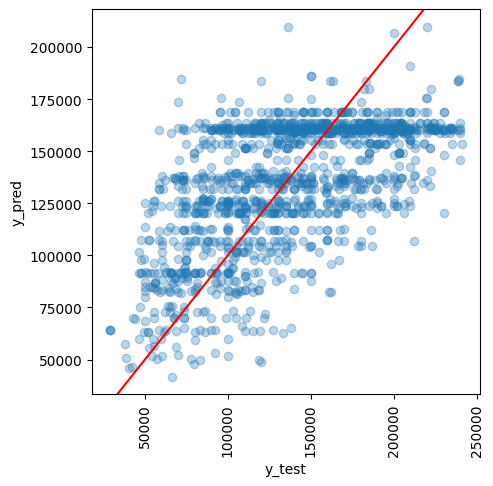

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_test, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.show()

In [ ]:
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)
MAE

31613.28599509369

In [ ]:
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
MSE

1473861915.759895

In [ ]:
RMSE = MSE**(1/2)
RMSE

38390.90928540108

In [ ]:
R2 = r2_score(y_test, y_pred)
R2

0.3410479595842838

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.3344772127425316

In [ ]:
test = ['test', MAE, MSE, RMSE, R2, Adj_R2]
test

['test',
 31613.28599509369,
 1473861915.759895,
 38390.90928540108,
 0.3410479595842838,
 0.3344772127425316]

In [ ]:
result = pd.DataFrame([train, val, test], columns=['set', 'MAE', 'MSE', 'RMSE', 'R2', 'Adj_R2'])
result.set_index('set', inplace=True)
result

MAE           MSE          RMSE        R2    Adj_R2
set                                                                
train  29963.177946  1.380858e+09  37159.891497  0.393611  0.392861
val    32253.804125  1.558060e+09  39472.270892  0.331120  0.324446
test   31613.285995  1.473862e+09  38390.909285  0.341048  0.334477

### Prune

#### Cost complexity parameter

In [ ]:
path = model.cost_complexity_pruning_path(X_train, y_train)

In [ ]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

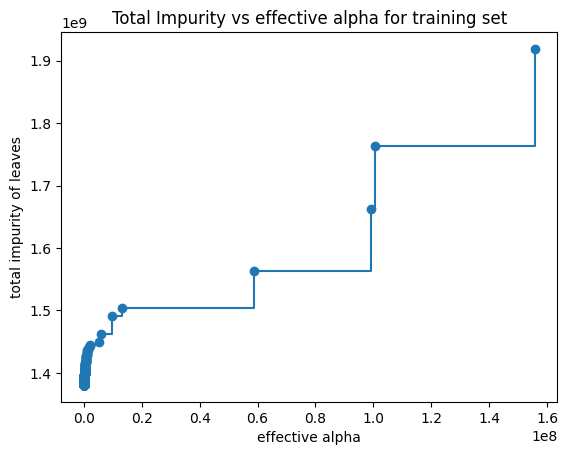

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 358446710.5168128


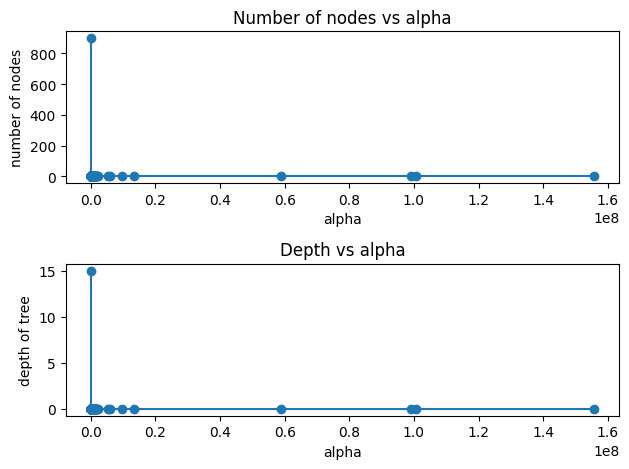

In [ ]:
clfs_ = clfs[:-1]
ccp_alphas_ = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs_]
depth = [clf.tree_.max_depth for clf in clfs_]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas_, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas_, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

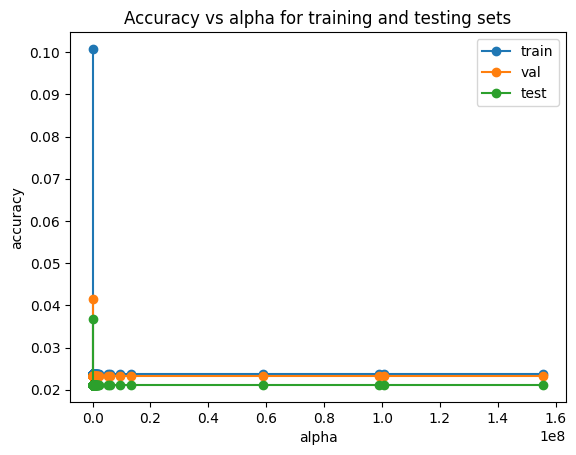

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs_]
val_scores = [clf.score(X_val, y_val) for clf in clfs_]
test_scores = [clf.score(X_test, y_test) for clf in clfs_]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas_, val_scores, marker="o", label="val", drawstyle="steps-post")
ax.plot(ccp_alphas_, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#### Train

In [ ]:
model = DecisionTreeRegressor(ccp_alpha = 500000)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=500000)

In [ ]:
text_representation = tree.export_text(model, feature_names=list(X.columns))
print(text_representation)

|--- experience_level_recode <= 1.50
|   |--- company_location_US <= 0.50
|   |   |--- job_title_Analyst <= 0.50
|   |   |   |--- experience_level_recode <= 0.50
|   |   |   |   |--- employment_type_FT <= 0.50
|   |   |   |   |   |--- value: [103307.00]
|   |   |   |   |--- employment_type_FT >  0.50
|   |   |   |   |   |--- value: [63946.52]
|   |   |   |--- experience_level_recode >  0.50
|   |   |   |   |--- value: [75092.04]
|   |   |--- job_title_Analyst >  0.50
|   |   |   |--- value: [59988.99]
|   |--- company_location_US >  0.50
|   |   |--- job_title_Analyst <= 0.50
|   |   |   |--- experience_level_recode <= 0.50
|   |   |   |   |--- remote_ratio_0 <= 0.50
|   |   |   |   |   |--- value: [93774.98]
|   |   |   |   |--- remote_ratio_0 >  0.50
|   |   |   |   |   |--- value: [106394.69]
|   |   |   |--- experience_level_recode >  0.50
|   |   |   |   |--- job_title_Scientist <= 0.50
|   |   |   |   |   |--- job_title_Engineer <= 0.50
|   |   |   |   |   |   |--- work_year_2021

#### Evaluation on train set

In [ ]:
y_pred = model.predict(X_train)

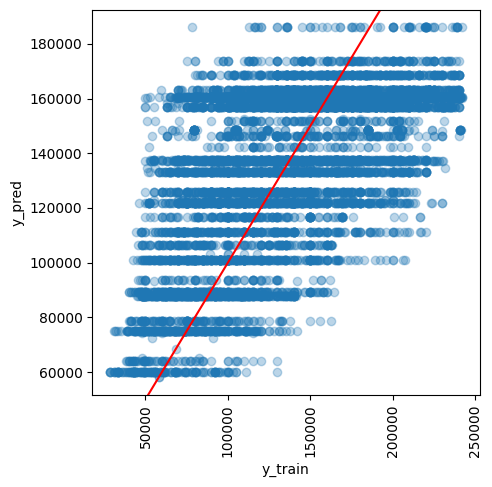

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_train, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_train')
plt.ylabel('y_pred')

plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
MAE = mean_absolute_error(y_train, y_pred)
MAE

30726.784172381685

In [ ]:
MSE = mean_squared_error(y_train, y_pred)
MSE

1415220612.1219542

In [ ]:
RMSE = MSE**(1/2)
RMSE

37619.4180194478

In [ ]:
R2 = r2_score(y_train, y_pred)
R2

0.37852045933037404

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adj_R2

0.37775245566108506

In [ ]:
train = ['train', MAE, MSE, RMSE, R2, Adj_R2]
train

['train',
 30726.784172381685,
 1415220612.1219542,
 37619.4180194478,
 0.37852045933037404,
 0.37775245566108506]

#### Evaluation on validation set

In [ ]:
y_pred = model.predict(X_val)

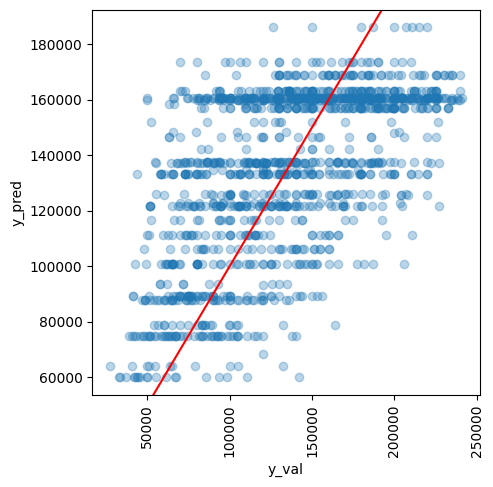

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_val, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_val')
plt.ylabel('y_pred')

plt.show()

In [ ]:
MAE = mean_absolute_error(y_true=y_val, y_pred=y_pred)
MAE

32089.481050446666

In [ ]:
MSE = mean_squared_error(y_true=y_val, y_pred=y_pred)
MSE

1535364767.8003526

In [ ]:
RMSE = MSE**(1/2)
RMSE

39183.7309071042

In [ ]:
R2 = r2_score(y_val, y_pred)
R2

0.3408636271997303

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)
Adj_R2

0.33428635762082526

In [ ]:
val = ['val', MAE, MSE, RMSE, R2, Adj_R2]
val

['val',
 32089.481050446666,
 1535364767.8003526,
 39183.7309071042,
 0.3408636271997303,
 0.33428635762082526]

#### Evaluation on test set

In [ ]:
y_pred = model.predict(X_test)

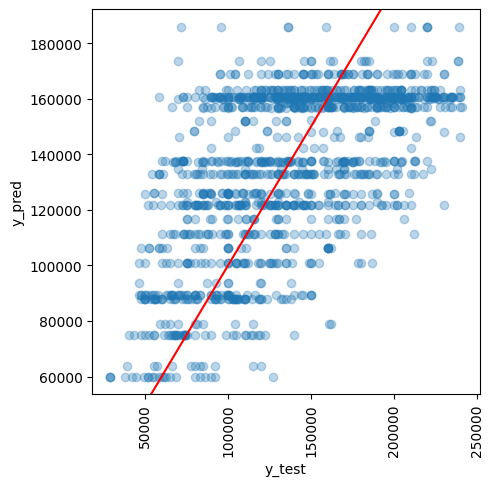

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(y_test, y_pred, alpha=0.3)
plt.axline([99000,99000],[180000,180000], color='red')

plt.xticks(rotation=90)
plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.show()

In [ ]:
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)
MAE

31469.024756038583

In [ ]:
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
MSE

1466408784.970606

In [ ]:
RMSE = MSE**(1/2)
RMSE

38293.71730415586

In [ ]:
R2 = r2_score(y_test, y_pred)
R2

0.344380195588601

In [ ]:
Adj_R2 = 1 - (1-R2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.3378426761713933

In [ ]:
test = ['test', MAE, MSE, RMSE, R2, Adj_R2]
test

['test',
 31469.024756038583,
 1466408784.970606,
 38293.71730415586,
 0.344380195588601,
 0.3378426761713933]

In [ ]:
result = pd.DataFrame([train, val, test], columns=['set', 'MAE', 'MSE', 'RMSE', 'R2', 'Adj_R2'])
result.set_index('set', inplace=True)
result

MAE           MSE          RMSE        R2    Adj_R2
set                                                                
train  30726.784172  1.415221e+09  37619.418019  0.378520  0.377752
val    32089.481050  1.535365e+09  39183.730907  0.340864  0.334286
test   31469.024756  1.466409e+09  38293.717304  0.344380  0.337843

### Reverse Decision Tree

In [ ]:
df_rev = df_clean.copy()

In [ ]:
df_rev.drop(['work_year_2020', 'work_year_2021', 'work_year_2022', 'work_year_2023',
             'work_year_2024', 'experience_level_recode', 'employment_type_FT',
             'job_title_Analyst', 'job_title_Engineer', 'job_title_Scientist',
             'salary_currency_USD', 'employee_residence_US', 'remote_ratio_0',
             'remote_ratio_50', 'remote_ratio_100', 'company_location_US',
             'company_size_L', 'company_size_M', 'company_size_S', 'job_title', 'salary'],
            axis=1, inplace=True)

In [ ]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14181 entries, 0 to 16532
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14181 non-null  int64 
 1   experience_level    14181 non-null  object
 2   employment_type     14181 non-null  object
 3   job_title_recode    14181 non-null  object
 4   salary_currency     14181 non-null  object
 5   salary_in_usd       14181 non-null  int64 
 6   employee_residence  14181 non-null  object
 7   remote_ratio        14181 non-null  int64 
 8   company_location    14181 non-null  object
 9   company_size        14181 non-null  object
dtypes: int64(3), object(7)
memory usage: 1.2+ MB


#### Work year

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x = df_rev[['salary_in_usd']]
y = df_rev.work_year

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(x, y)

DecisionTreeClassifier()

In [ ]:
text_representation = tree.export_text(model, feature_names=['salary_in_usd'])
print(text_representation)

|--- salary_in_usd <= 118420.00
|   |--- salary_in_usd <= 116995.00
|   |   |--- salary_in_usd <= 101350.00
|   |   |   |--- salary_in_usd <= 95525.00
|   |   |   |   |--- salary_in_usd <= 63933.50
|   |   |   |   |   |--- salary_in_usd <= 62900.00
|   |   |   |   |   |   |--- salary_in_usd <= 62050.00
|   |   |   |   |   |   |   |--- salary_in_usd <= 33593.00
|   |   |   |   |   |   |   |   |--- salary_in_usd <= 33276.50
|   |   |   |   |   |   |   |   |   |--- salary_in_usd <= 32575.50
|   |   |   |   |   |   |   |   |   |   |--- salary_in_usd <= 28517.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2022
|   |   |   |   |   |   |   |   |   |   |--- salary_in_usd >  28517.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- salary_in_usd >  32575.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2023
|   |   |   |   |   |   |   |   |--- salary_in_usd >  33276.50
|   |   |   |   |   |   |   |   |   |---

In [ ]:
path = model.cost_complexity_pruning_path(x, y)

In [ ]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

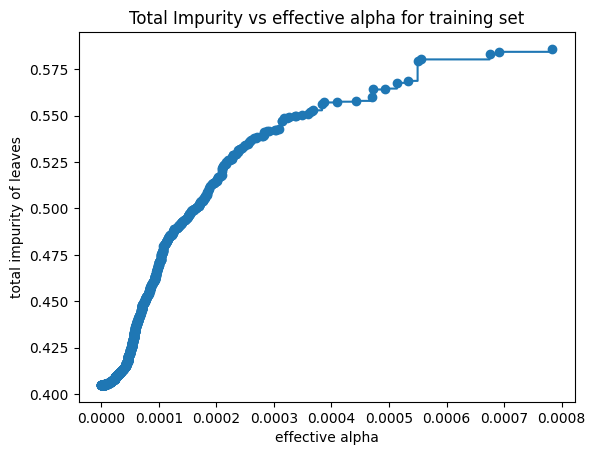

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x, y)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0025949026923329788


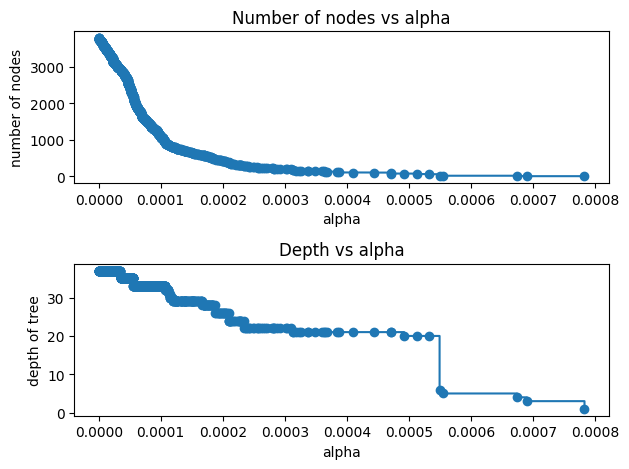

In [ ]:
clfs_ = clfs[:-1]
ccp_alphas_ = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs_]
depth = [clf.tree_.max_depth for clf in clfs_]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas_, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas_, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

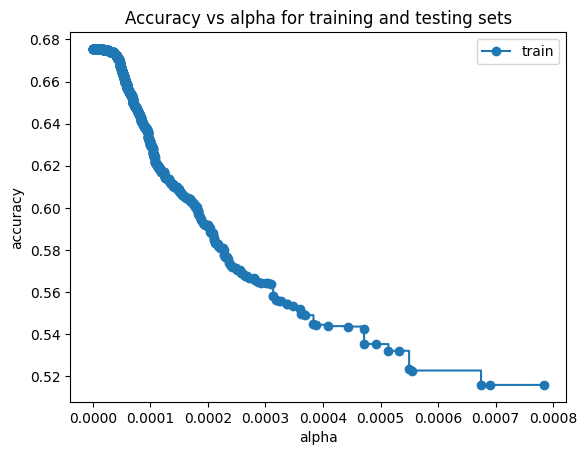

In [ ]:
train_scores = [clf.score(x, y) for clf in clfs_]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
model = DecisionTreeClassifier(ccp_alpha=0.00055)

In [ ]:
model.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.00055)

In [ ]:
text_representation = tree.export_text(model, feature_names=['salary_in_usd'])
print(text_representation)

|--- salary_in_usd <= 118420.00
|   |--- salary_in_usd <= 116995.00
|   |   |--- salary_in_usd <= 101350.00
|   |   |   |--- salary_in_usd <= 95525.00
|   |   |   |   |--- salary_in_usd <= 63933.50
|   |   |   |   |   |--- salary_in_usd <= 62900.00
|   |   |   |   |   |   |--- class: 2023
|   |   |   |   |   |--- salary_in_usd >  62900.00
|   |   |   |   |   |   |--- class: 2022
|   |   |   |   |--- salary_in_usd >  63933.50
|   |   |   |   |   |--- class: 2023
|   |   |   |--- salary_in_usd >  95525.00
|   |   |   |   |--- salary_in_usd <= 97706.00
|   |   |   |   |   |--- class: 2024
|   |   |   |   |--- salary_in_usd >  97706.00
|   |   |   |   |   |--- class: 2024
|   |   |--- salary_in_usd >  101350.00
|   |   |   |--- class: 2023
|   |--- salary_in_usd >  116995.00
|   |   |--- class: 2024
|--- salary_in_usd >  118420.00
|   |--- salary_in_usd <= 221715.00
|   |   |--- salary_in_usd <= 205960.00
|   |   |   |--- salary_in_usd <= 204400.00
|   |   |   |   |--- class: 2023
|   |   

#### Experience level

In [ ]:
x = df_rev[['salary_in_usd']]
y = df_rev.experience_level

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(x, y)

DecisionTreeClassifier()

In [ ]:
text_representation = tree.export_text(model, feature_names=['salary_in_usd'])
print(text_representation)

|--- salary_in_usd <= 100003.00
|   |--- salary_in_usd <= 77382.00
|   |   |--- salary_in_usd <= 47992.50
|   |   |   |--- salary_in_usd <= 47777.50
|   |   |   |   |--- salary_in_usd <= 41916.50
|   |   |   |   |   |--- salary_in_usd <= 39807.50
|   |   |   |   |   |   |--- salary_in_usd <= 38640.00
|   |   |   |   |   |   |   |--- salary_in_usd <= 29824.00
|   |   |   |   |   |   |   |   |--- salary_in_usd <= 28708.00
|   |   |   |   |   |   |   |   |   |--- salary_in_usd <= 28517.00
|   |   |   |   |   |   |   |   |   |   |--- class: EN
|   |   |   |   |   |   |   |   |   |--- salary_in_usd >  28517.00
|   |   |   |   |   |   |   |   |   |   |--- class: MI
|   |   |   |   |   |   |   |   |--- salary_in_usd >  28708.00
|   |   |   |   |   |   |   |   |   |--- class: EN
|   |   |   |   |   |   |   |--- salary_in_usd >  29824.00
|   |   |   |   |   |   |   |   |--- salary_in_usd <= 32575.50
|   |   |   |   |   |   |   |   |   |--- salary_in_usd <= 31353.50
|   |   |   |   |   |   |   |

In [ ]:
path = model.cost_complexity_pruning_path(x, y)

In [ ]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

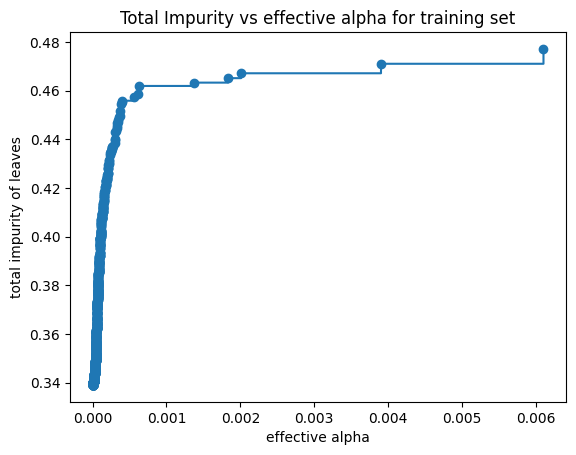

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x, y)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0396598915170539


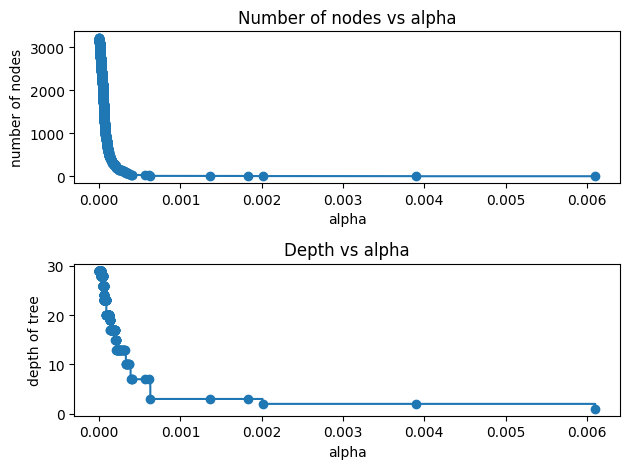

In [ ]:
clfs_ = clfs[:-1]
ccp_alphas_ = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs_]
depth = [clf.tree_.max_depth for clf in clfs_]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas_, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas_, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

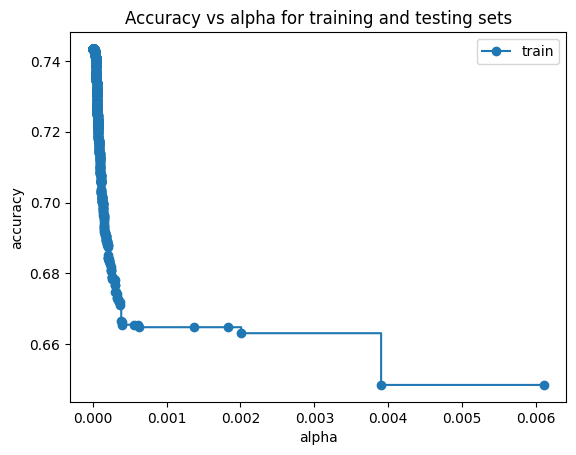

In [ ]:
train_scores = [clf.score(x, y) for clf in clfs_]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
model = DecisionTreeClassifier(ccp_alpha=0.0005)

In [ ]:
model.fit(x, y)

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


DecisionTreeClassifier(ccp_alpha=0.0005)

In [ ]:
text_representation = tree.export_text(model, feature_names=['salary_in_usd'])
print(text_representation)

|--- salary_in_usd <= 100003.00
|   |--- salary_in_usd <= 77382.00
|   |   |--- salary_in_usd <= 47992.50
|   |   |   |--- class: EN
|   |   |--- salary_in_usd >  47992.50
|   |   |   |--- salary_in_usd <= 66822.50
|   |   |   |   |--- class: MI
|   |   |   |--- salary_in_usd >  66822.50
|   |   |   |   |--- salary_in_usd <= 73890.00
|   |   |   |   |   |--- salary_in_usd <= 72650.00
|   |   |   |   |   |   |--- class: MI
|   |   |   |   |   |--- salary_in_usd >  72650.00
|   |   |   |   |   |   |--- class: MI
|   |   |   |   |--- salary_in_usd >  73890.00
|   |   |   |   |   |--- class: MI
|   |--- salary_in_usd >  77382.00
|   |   |--- salary_in_usd <= 93261.00
|   |   |   |--- class: SE
|   |   |--- salary_in_usd >  93261.00
|   |   |   |--- salary_in_usd <= 94225.00
|   |   |   |   |--- class: SE
|   |   |   |--- salary_in_usd >  94225.00
|   |   |   |   |--- class: SE
|--- salary_in_usd >  100003.00
|   |--- salary_in_usd <= 168050.00
|   |   |--- salary_in_usd <= 125550.00
|   | 

In [ ]:
model = DecisionTreeClassifier(max_depth=5)

In [ ]:
model.fit(x, y)

DecisionTreeClassifier(max_depth=5)

In [ ]:
text_representation = tree.export_text(model, feature_names=['salary_in_usd'])
print(text_representation)

|--- salary_in_usd <= 100003.00
|   |--- salary_in_usd <= 77382.00
|   |   |--- salary_in_usd <= 47992.50
|   |   |   |--- salary_in_usd <= 47777.50
|   |   |   |   |--- salary_in_usd <= 41916.50
|   |   |   |   |   |--- class: EN
|   |   |   |   |--- salary_in_usd >  41916.50
|   |   |   |   |   |--- class: MI
|   |   |   |--- salary_in_usd >  47777.50
|   |   |   |   |--- salary_in_usd <= 47819.50
|   |   |   |   |   |--- class: SE
|   |   |   |   |--- salary_in_usd >  47819.50
|   |   |   |   |   |--- class: EN
|   |   |--- salary_in_usd >  47992.50
|   |   |   |--- salary_in_usd <= 66822.50
|   |   |   |   |--- salary_in_usd <= 55264.00
|   |   |   |   |   |--- class: MI
|   |   |   |   |--- salary_in_usd >  55264.00
|   |   |   |   |   |--- class: MI
|   |   |   |--- salary_in_usd >  66822.50
|   |   |   |   |--- salary_in_usd <= 73890.00
|   |   |   |   |   |--- class: MI
|   |   |   |   |--- salary_in_usd >  73890.00
|   |   |   |   |   |--- class: MI
|   |--- salary_in_usd >  7